# 1.0 Importing the data and matching the CAPs with the two files

In [2]:
# The process starts with loading survey data from Qualtrics, and clean it; as also not all responses were completed, and then, trying to merge the data
# about public transport supply in the area of origins based on individuals (CAP)

In [3]:
import pandas as pd

# File paths
survey_file_path = "D:\\15_Polimi\\Polimi_onedrive\\OneDrive - Politecnico di Milano\\PhD\\people\\Survery\\MMH_26-11-2024.xlsx"
cap_file_path = "D:\\15_Polimi\\Polimi_onedrive\\OneDrive - Politecnico di Milano\\PhD\\people\\Survery\\CAPs\\CAP_complete\\CAP_COMPLETE-updated.csv"
output_file_path = "D:\\15_Polimi\\Polimi_onedrive\\OneDrive - Politecnico di Milano\\PhD\\people\\Survery\\CAPs\\CAP_complete\\CAP_COMPLETE_MERGED.csv"

# Load the survey data (Excel file)
excel_data = pd.ExcelFile(survey_file_path)
df = excel_data.parse(sheet_name=0, header=[0, 1])
data = df.iloc[2:, :]  # Actual data starts from the third row
filtered_data = data[data[("Finished", "Finished")] == True]

# Flatten the multi-level columns of `filtered_data`
filtered_data.columns = filtered_data.columns.get_level_values(1)
filtered_data.reset_index(drop=True, inplace=True)

# Rename the CAP column in `filtered_data`
filtered_data.rename(columns={
    'What is the postal code (CAP) of the place you live during the week? Consider the place where you spend more time.': 'CAP'
}, inplace=True)

# Load the second dataset (CSV file)
cap_data = pd.read_csv(cap_file_path)

# Perform the merge on the 'CAP' column
merged_data = pd.merge(
    filtered_data, 
    cap_data[['CAP', 'distance', 'sum', 'unique', 'CAP_Location']],  # Select only relevant columns from cap_data
    on='CAP', 
    how='inner'  # Use 'inner' to keep only matching rows
)


C:\Users\mafgo\AppData\Local\Temp\ipykernel_12872\1094788098.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns={


In [4]:
cols = filtered_data.columns
print(cols)

Index(['Start Date', 'End Date', 'Response Type', 'IP Address', 'Progress',
       'Duration (in seconds)', 'Finished', 'Recorded Date', 'Response ID',
       'Recipient Last Name', 'Recipient First Name', 'Recipient Email',
       'External Data Reference', 'Location Latitude', 'Location Longitude',
       'Distribution Channel', 'User Language', 'How old are you? - years',
       'How do you identify yourself? - Selected Choice',
       'How do you identify yourself? - Prefer to self-define - Text',
       'What is the highest educational level you have achieved? - Selected Choice',
       'What is the highest educational level you have achieved? - Others (Please Specify) - Text',
       'What is your employee status? - Selected Choice',
       'What is your employee status? - Other - Text', 'CAP',
       'Considering the time you spend traveling in your working week, what activity do you spend the most time traveling for?  You can select multiple answers.',
       'What are the main

In [5]:
filtered_data

Start Date            End Date Response Type       IP Address  \
0   2024-01-28 16:22:06 2024-01-28 16:28:16    IP Address   151.38.182.107   
1   2024-01-28 16:23:40 2024-01-28 16:30:45    IP Address  109.118.122.155   
2   2024-01-28 19:35:28 2024-01-28 19:42:03    IP Address     80.183.95.11   
3   2024-01-29 01:47:23 2024-01-29 01:51:03    IP Address   131.175.147.82   
4   2024-01-29 08:32:34 2024-01-29 10:13:55    IP Address    93.47.220.230   
..                  ...                 ...           ...              ...   
324 2024-11-11 10:29:39 2024-11-11 11:05:40    IP Address    2.196.148.101   
325 2024-11-11 10:55:29 2024-11-11 11:09:43    IP Address   131.175.126.14   
326 2024-11-11 11:05:24 2024-11-11 11:20:51    IP Address   131.175.126.14   
327 2024-11-11 10:55:16 2024-11-11 11:22:51    IP Address   151.18.220.132   
328 2024-11-15 19:19:21 2024-11-15 19:31:31    IP Address   176.200.65.221   

     Progress  Duration (in seconds)  Finished           Recorded Date  \
0         100                    370      True 2024-01-28 16:28:17.287   
1         100                    425      True 2024-01-28 16:30:46.572   
2         100                    395      True 2024-01-28 19:42:04.856   
3         100                    219      True 2024-01-29 01:51:03.815   
4         100                   6080      True 2024-01-29 10:13:55.716   
..        ...                    ...       ...                     ...   
324       100                   2161      True 2024-11-11 11:05:40.886   
325       100                    854      True 2024-11-11 11:09:44.313   
326       100                    927      True 2024-11-11 11:20:52.237   
327       100                   1655      True 2024-11-11 11:22:51.735   
328       100                    729      True 2024-11-15 19:31:31.956   

           Response ID  Recipient Last Name  ...  \
0    R_2AIcboe8JRvf2GR                  NaN  ...   
1    R_6JmlJEGCOWo9rTX                  NaN  ...   
2    R_61z5R1KEmMv8GGz                  NaN  ...   
3    R_2QS9J3nCE9mYu8B                  NaN  ...   
4    R_2JlKjQUhcT7unUa                  NaN  ...   
..                 ...                  ...  ...   
324  R_2sogfeczO00yYvM                  NaN  ...   
325  R_81Af79F72aaAUsT                  NaN  ...   
326  R_82S6xK8Q8m0Ceye                  NaN  ...   
327  R_27pz8nRKYyJZW8h                  NaN  ...   
328  R_2q41Zzco1HRd92q                  NaN  ...   

     Nearby the transport stop you selected, what mobility services could be added to the station to enhance its quality? - Selected Choice  \
0                                                    6                                                                                        
1                                                    6                                                                                        
2                   More amenities in the ground floor                                                                                        
3                                   Trees and greenery                                                                                        
4    Trees and greenery,Shades paths,More amenities...                                                                                        
..                                                 ...                                                                                        
324  Wider sidewalks,Protected crossing lanes,Urban...                                                                                        
325                 Wider sidewalks,Trees and greenery                                                                                        
326  Protected crossing lanes,Lighting,Urban furnit...                                                                                        
327  Trees and greenery,Urban furniture (benches, s...                                                                              

In [6]:
# Define the required columns for the new DataFrame 'MMI', where Response ID Remains the Random Identification Key for each response in the survey
# Distance: Linear distance between Home (retrieved from CAP, and University Destination)
# Travel Frequency per week
# Travel Legs for average travel between home and University
# Waitng time while transiting 
# Merging all in MMI which stands for Multimodality Index. 
required_columns = [
    'Response ID',
    'distance', 'sum', 'unique',
    'On average, how many days per week do you commute outside the neighbourhood you live in?',
    'Drag and drop the components that describe your trip from Home to School / University / Work / Other. - Groups - Put on order the trip chain',
    'How many minutes does it take your trip from Home to School / University / Work / Other?  And, how many minutes do you spend to transfer (walk and wait)  during your trip from Home to School / University / Work / Other? - Total transfer time in minutes'
]

# Create the new DataFrame 'MMI' with only the required columns
MMI = merged_data[required_columns]


# 2.0 MmI (Multimodality Index)

In [8]:
# Define the mapping dictionary
# As the Survey asked how many times per week, here I transfer text values to numerical values to measure the frequency, I assied .5 to a Rare movement. 
remap_dict = {
    '6 days': 6,
    'Never commute': 0,
    'Everyday': 7,
    '2 days': 2,
    '4 days': 4,
    '5 days Monday-Friday': 5,
    '3 days': 3,
    'Once a week': 1,
    'Rarely commute Less than once a week': 0.5,
    'On average, how many days per week do you commute outside the neighbourhood you live in?': 0
}

# Column name to remap
column_to_remap = 'On average, how many days per week do you commute outside the neighbourhood you live in?'

# Apply the remap explicitly using .loc
MMI.loc[:, column_to_remap] = MMI[column_to_remap].map(remap_dict)


In [9]:
# Column name to process
# On the line, I am processing the travel components where users drag and drop to describe their movement. in the data, it seprates with them using a 
# comma, so I am using it to count how many travel legs people have done 
# For instance, a response like ( I walk to the station, I take a bus, and I walk to finial destination ) will count as '3' travel legs... In the survey, 
# I always make it by default that people will walk first, then, they can do whatever they want, they also can remove this default component, and add their
# own custmized component. 
column_name = 'Drag and drop the components that describe your trip from Home to School / University / Work / Other. - Groups - Put on order the trip chain'

# Count the number of legs by counting commas and adding 1
MMI['Number of Legs'] = MMI[column_name].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)


C:\Users\mafgo\AppData\Local\Temp\ipykernel_12872\728624656.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MMI['Number of Legs'] = MMI[column_name].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)


In [10]:
# Column name to process
# Here I am processing waiting time, that is often a slider in the survey where users can select between 0 to 90 minutes, for some reason, some respnses 
# were counted as Nulls, so, here I am replacing Nullls (no records) with 0. assuming that users refer themselves as 

column_name = 'How many minutes does it take your trip from Home to School / University / Work / Other?  And, how many minutes do you spend to transfer (walk and wait)  during your trip from Home to School / University / Work / Other? - Total transfer time in minutes'

# Replace NaN values with 0
MMI[column_name] = MMI[column_name].fillna(0)


C:\Users\mafgo\AppData\Local\Temp\ipykernel_12872\2159334704.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MMI[column_name] = MMI[column_name].fillna(0)


In [11]:
# Column name to process
# On the line, I am processing the travel components where users drag and drop to describe their movement. in the data, it seprates with them using a 
# comma, so I am using it to count how many travel legs people have done 
# For instance, a response like ( I walk to the station, I take a bus, and I walk to finial destination ) will count as '3' travel legs... In the survey, 
# I always make it by default that people will walk first, then, they can do whatever they want, they also can remove this default component, and add their
# own custmized component. 
column_name = 'Drag and drop the components that describe your trip from Home to School / University / Work / Other. - Groups - Put on order the trip chain'

# Count the number of legs by counting commas and adding 1
MMI['Number of Legs'] = MMI[column_name].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)


C:\Users\mafgo\AppData\Local\Temp\ipykernel_12872\728624656.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MMI['Number of Legs'] = MMI[column_name].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)


In [12]:
# Rename columns
# The col name was too long, so I am shorting it, to make the code appeal good 
MMI.rename(columns={
    'On average, how many days per week do you commute outside the neighbourhood you live in?': 'frequency',
    'How many minutes does it take your trip from Home to School / University / Work / Other?  And, how many minutes do you spend to transfer (walk and wait)  during your trip from Home to School / University / Work / Other? - Total transfer time in minutes': 'transfer'
}, inplace=True)

# Drop the specified column
MMI.drop(columns=['Drag and drop the components that describe your trip from Home to School / University / Work / Other. - Groups - Put on order the trip chain'], inplace=True)


C:\Users\mafgo\AppData\Local\Temp\ipykernel_12872\1429008140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MMI.rename(columns={
C:\Users\mafgo\AppData\Local\Temp\ipykernel_12872\1429008140.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MMI.drop(columns=['Drag and drop the components that describe your trip from Home to School / University / Work / Other. - Groups - Put on order the trip chain'], inplace=True)


In [13]:
MMI.head(3)

Response ID   distance   sum  unique frequency  transfer  \
0  R_6JmlJEGCOWo9rTX  15.044886  32.0     1.0       7.0       0.0   
1  R_61z5R1KEmMv8GGz  20.372493   8.0     1.0       6.0       0.0   
2  R_2QS9J3nCE9mYu8B   2.424350  58.0     5.0       7.0       0.0   

   Number of Legs  
0               4  
1               4  
2               4

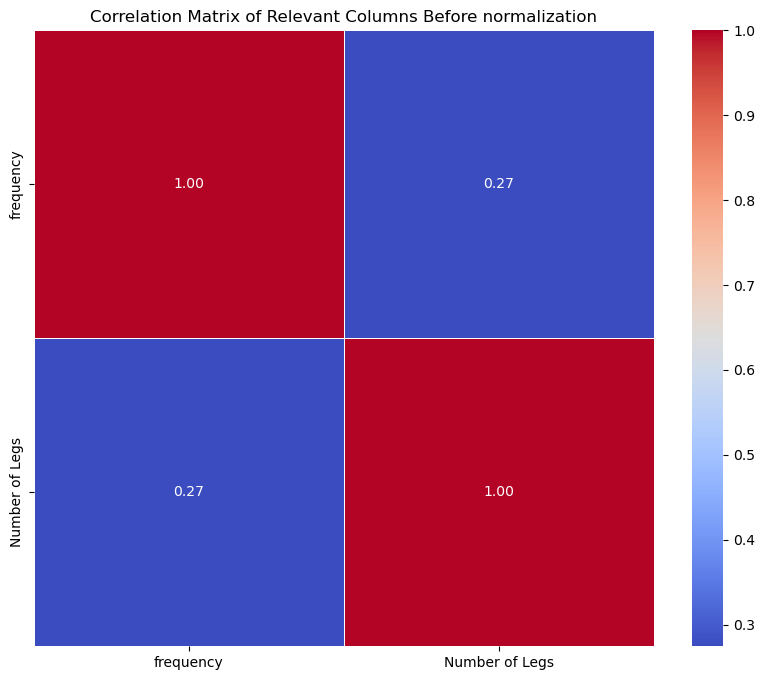

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the relevant columns
correlation_matrix = MMI[[ 'frequency', 'Number of Legs']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Relevant Columns Before normalization")
plt.show()


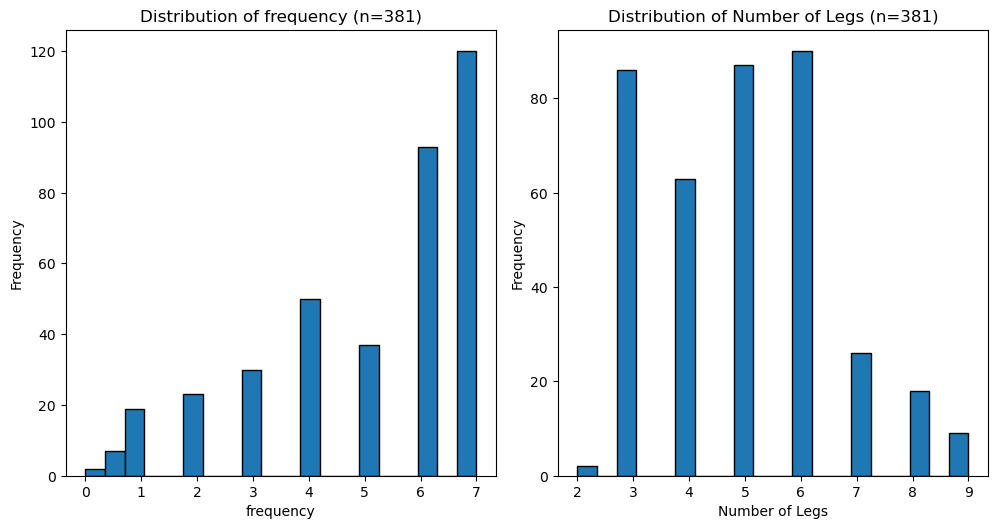

In [15]:
# List of columns to visualize skewness
columns = ['frequency', 'Number of Legs']

# Plot histograms for each column to check skewness
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    n = len(MMI[col].dropna())  # Count non-NA records in the column
    plt.hist(MMI[col], bins=20, edgecolor='black')
    plt.title(f"Distribution of {col} (n={n})")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [16]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.stats import zscore

# Ensure MMI_cleaned is a deep copy to avoid SettingWithCopyWarning
MMI = MMI.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns (convert them to float before assignment)
columns_to_normalize = ['frequency', 'Number of Legs']
MMI[columns_to_normalize] = MMI[columns_to_normalize].astype(float)
MMI.loc[:, columns_to_normalize] = scaler.fit_transform(MMI[columns_to_normalize])

# 1. Calculate MMI_1: Number of Legs 


MMI['MI_1'] = np.sqrt(MMI['Number of Legs'] * MMI['frequency'])


# Define the epsilon value
epsilon = 1e-6

# Function to adjust values close to 0 and 1
def adjust_values(x, epsilon=1e-6):
    if x <= epsilon:
        return x + epsilon
    elif x >= 1 - epsilon:
        return x - epsilon
    return x

# Apply the adjustment function to the relevant columns
columns_to_adjust = ['Number of Legs', 'frequency']

for col in columns_to_adjust:
    MMI[col] = MMI[col].apply(lambda x: adjust_values(x, epsilon))


# Ensure MMI_cleaned is a deep copy to avoid SettingWithCopyWarning
MMI = MMI.copy()


# Calculate the z-score for the 'MI_1' column
MMI['Multimodality_zScore'] = zscore(MMI['MI_1'])


In [17]:
pd.concat([MMI.head(3), MMI.tail(3)])

Response ID   distance    sum  unique  frequency  transfer  \
0    R_6JmlJEGCOWo9rTX  15.044886   32.0     1.0   0.999999       0.0   
1    R_61z5R1KEmMv8GGz  20.372493    8.0     1.0   0.857143       0.0   
2    R_2QS9J3nCE9mYu8B   2.424350   58.0     5.0   0.999999       0.0   
378  R_82S6xK8Q8m0Ceye   2.452124   46.0     4.0   0.999999      20.0   
379  R_27pz8nRKYyJZW8h  34.655301   17.0     1.0   0.999999      15.0   
380  R_2q41Zzco1HRd92q   9.237931  142.0     5.0   0.857143       7.0   

     Number of Legs      MI_1  Multimodality_zScore  
0          0.285714  0.534522              0.017263  
1          0.285714  0.494872             -0.170327  
2          0.285714  0.534522              0.017263  
378        0.285714  0.534522              0.017263  
379        0.571429  0.755929              1.064749  
380        0.714286  0.782461              1.190272

## 2.1 Visulizing MmI 

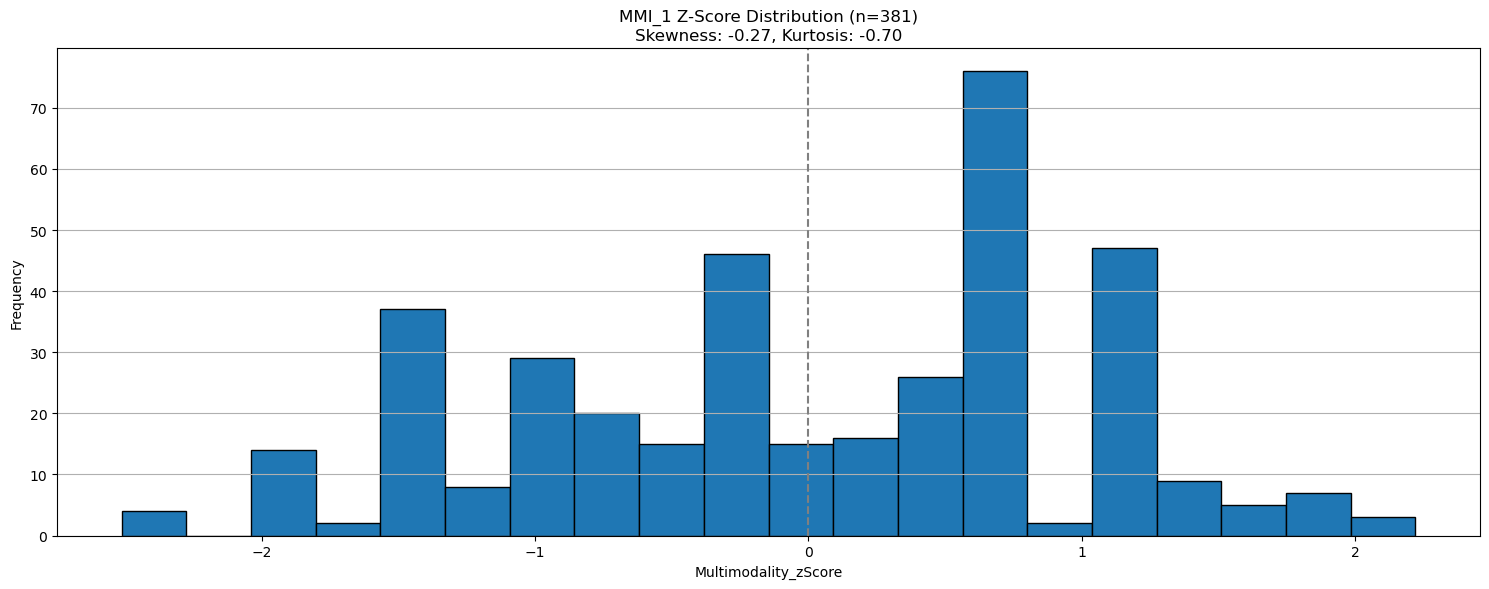

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import numpy as np

# Calculate skewness and kurtosis for 'Multimodality_zScore'
MMI_1_skew = skew(MMI['Multimodality_zScore'].dropna())
MMI_1_kurtosis = kurtosis(MMI['Multimodality_zScore'].dropna(), fisher=True)

# Number of values
n = len(MMI['Multimodality_zScore'].dropna())

# Plot histogram with z-score details
plt.figure(figsize=(15, 6))
plt.hist(MMI['Multimodality_zScore'].dropna(), bins=20, edgecolor='black')

# Add a gray hashed line for z = 0
plt.axvline(0, color='gray', linestyle='--', linewidth=1.5)

# Add title with skewness, kurtosis, and n
plt.title(f"MMI_1 Z-Score Distribution (n={n})\nSkewness: {MMI_1_skew:.2f}, Kurtosis: {MMI_1_kurtosis:.2f}")
plt.xlabel("Multimodality_zScore")
plt.ylabel("Frequency")
plt.grid(axis='y')

# Adjust layout
plt.tight_layout()

# Save plot as PDF
plt.savefig("mMultimodality_zScore_distribution.pdf")

# Show the plot
plt.show()

In [20]:
# Apperiantly the MM1_2 is better than MMI_1 as it gives more symmetrical distrubtion distribtion. 

# 3.0 Motility 

## 3.1 Remapping some quantative parametrs to qualitataive ones 

In [23]:
# In this part of the code, we operationalize Kaufmann's concept of Motility but tweak it to measure Multimodality, which is composed of three equal parts 
# 1.0 Access: means how many transport nodes are available near the Origings and Destination. Multiplied by the kind of subscription users have to access 
# these means of mobility. 
# 2.0 Skills: refers to the person's capacity to use a bike-sharing system and the digital phone to navigate and use the available options. 
# 3.0 Appropriation refers to the attitudes and preferences that count positively if a person uses a mixture of three systems [active mobility, public
# transport, and private cars]. Secondly, an explicit question was made to ask, what is your attitude to changing current mobility behavior, if 
# student answers positively, an extended question is made to know what stimulates this change... 

In [24]:
# Importing relative columns form the survey that can measure the 3 aspects of Motility.

required_columns_2 = [
    'Response ID',
    'Do you have a public transport subscription?',
    'What kind of subscription do you have?',
    'Do you subscribe for more micro-mobility services?  e.g. BikeMi- e-Vai - RideMovi- Lime...',
    #'What are you using these micro - mobility options for?',
    'How often do you use these shared mobility options on a weekly basis?',
    'Do you use your smartphone for commuting purposes?',
    'For what purpose do you use your smartphone?',
    'What stimulate you to change your mobility behavior? - Selected Choice',
    'Rank the most used means of transport you use! (Drag and drop the three most used). - Groups - Drag and drop the most used of transport options in order here',
    'To which extent you are willing to change your mobility behaviour?'
]

In [25]:
# Create the new DataFrame 'Motility' with only the required columns
MOTILITY = merged_data[required_columns_2]

In [26]:
# Filter MOTILITY where 'Respond ID' exists in cleaned_MMI's 'Respond ID'
filtered_MOTILITY = MOTILITY[MOTILITY['Response ID'].isin(MMI['Response ID'])]


In [27]:
# As many questions were made in a qualtative way, the upcoming part is mainly converting some quantataive responses, into qualitataive onces prior 
# processing the answers.

In [28]:
# Define the mapping dictionary
remap_dict = {
    'Yes': 1,
    'No': 0
}
# Column name to remap
column_to_remap = 'Do you have a public transport subscription?'

# Apply the remap explicitly using .loc
MOTILITY.loc[:, column_to_remap] = MOTILITY[column_to_remap].map(remap_dict)

In [29]:
import numpy as np

# Define the mapping dictionary
remap_dict = {
    'Urban Milan M1': 1,
    'Extra Urban (e.g., M1-M3, M1-M4...)': 2,
    'Regional': 3,
    np.nan: 0.25
}

# For Nulls responses, I assume that people may use tickets for commuting... so I replaced it with 0.25

# Column name to remap
column_to_remap = 'What kind of subscription do you have?'

# Apply the remap explicitly using .loc
MOTILITY.loc[:, column_to_remap] = MOTILITY[column_to_remap].map(remap_dict)


In [30]:
# Define the mapping dictionary (for SM: Shared Mobility)
values_of_SM = {
    'Yes': 1,
    'No':0
}
# Column name to remap
column_to_remap = 'Do you subscribe for more micro-mobility services?  e.g. BikeMi- e-Vai - RideMovi- Lime...'

# Apply the remap explicitly using .loc
MOTILITY.loc[:, column_to_remap] = MOTILITY[column_to_remap].map(values_of_SM)

In [31]:
# Define the mapping dictionary
remap_dict = {
    np.nan: 0,
    '3 days': 3,
    '5 days':5,
    'Less than once a week':0.5,
    'Once a week':1,
    '2 days':2,
    '6 days':6,
    'Everyday':7,
    '4 days':4
}
# Column name to remap
column_to_remap = 'How often do you use these shared mobility options on a weekly basis?'

# Apply the remap explicitly using .loc
MOTILITY.loc[:, column_to_remap] = MOTILITY[column_to_remap].map(remap_dict)


In [32]:
# Define the mapping dictionary
values_of_smartphones = {
    np.nan: 0,
    'yes': 1,
    'no':0
}
# Column name to remap
column_to_remap = 'Do you use your smartphone for commuting purposes?'

# Apply the remap explicitly using .loc
MOTILITY.loc[:, column_to_remap] = MOTILITY[column_to_remap].map(values_of_smartphones)

In [33]:
# Column name to process
column_name = 'For what purpose do you use your smartphone?'

# Count the number of purposes by counting commas and adding 1, replacing values in the original column
MOTILITY[column_name] = MOTILITY[column_name].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)


C:\Users\mafgo\AppData\Local\Temp\ipykernel_12872\339253342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MOTILITY[column_name] = MOTILITY[column_name].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)


In [34]:
# Define the mapping dictionary
values_of_smartphones = {
    'I am totally open to use several means of transport.': 4,
    'I am quiet open to user several means of transport.': 3,
    'I am comfortable with my everyday travel routine.':2,
    "I don't want to change my mobility habits.":1
}
# Column name to remap
column_to_remap = 'To which extent you are willing to change your mobility behaviour?'

# Apply the remap explicitly using .loc
MOTILITY.loc[:, column_to_remap] = MOTILITY[column_to_remap].map(values_of_smartphones)

In [35]:
# Column name to process
column_name = 'What stimulate you to change your mobility behavior? - Selected Choice'

# Count the number of legs by counting commas and adding 1
MOTILITY[column_name] = MOTILITY[column_name].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

C:\Users\mafgo\AppData\Local\Temp\ipykernel_12872\3075344442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MOTILITY[column_name] = MOTILITY[column_name].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)


In [36]:
MOTILITY

Response ID Do you have a public transport subscription?  \
0    R_6JmlJEGCOWo9rTX                                            1   
1    R_61z5R1KEmMv8GGz                                            0   
2    R_2QS9J3nCE9mYu8B                                            1   
3    R_2JlKjQUhcT7unUa                                            0   
4    R_6IoBWPSrHaPVS7I                                            1   
..                 ...                                          ...   
376  R_2sogfeczO00yYvM                                            1   
377  R_81Af79F72aaAUsT                                            1   
378  R_82S6xK8Q8m0Ceye                                            1   
379  R_27pz8nRKYyJZW8h                                            1   
380  R_2q41Zzco1HRd92q                                            1   

    What kind of subscription do you have?  \
0                                      1.0   
1                                     0.25   
2                                      2.0   
3                                     0.25   
4                                      2.0   
..                                     ...   
376                                    1.0   
377                                    2.0   
378                                    2.0   
379                                    2.0   
380                                    1.0   

    Do you subscribe for more micro-mobility services?  e.g. BikeMi- e-Vai - RideMovi- Lime...  \
0                                                    0                                           
1                                                    0                                           
2                                                    1                                           
3                                                    0                                           
4                                                    0                                           
..                                                 ...                                           
376                                                  1                                           
377                                                  0                                           
378                                                  1                                           
379                                                  0                                           
380                                                  0                                           

    How often do you use these shared mobility options on a weekly basis?  \
0                                                  0.0                      
1                                                  0.0                      
2                                                  0.0                      
3                                                  0.0                      
4                                                  0.0                      
..                                                 ...                      
376                                                0.5                      
377                                                0.0                      
378                                                3.0                      
379                                                0.0                      
380                                                0.0                      

    Do you use your smartphone for commuting purposes?  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
..                                                 ...   
376                                                  1   
377                                    

In [37]:
mot_coloumns = MOTILITY.columns
print(mot_coloumns)

Index(['Response ID', 'Do you have a public transport subscription?',
       'What kind of subscription do you have?',
       'Do you subscribe for more micro-mobility services?  e.g. BikeMi- e-Vai - RideMovi- Lime...',
       'How often do you use these shared mobility options on a weekly basis?',
       'Do you use your smartphone for commuting purposes?',
       'For what purpose do you use your smartphone?',
       'What stimulate you to change your mobility behavior? - Selected Choice',
       'Rank the most used means of transport you use! (Drag and drop the three most used). - Groups - Drag and drop the most used of transport options in order here',
       'To which extent you are willing to change your mobility behaviour?'],
      dtype='object')


## 3.2 Calculating Indexs for Multimodility

### 3.2.1 Access to Mobility options (1/3)

In [40]:
# It is composed of (the number of avaialble transport option + number of available treansport option at destination )* the type of public transport subscribtion 

In [41]:
# Firstly, Calculate How many stations are there on Destination 

In [42]:
# Assuming filtered_data is a slice of the original DataFrame
filtered_data_copy = filtered_data.copy()

# Rename columns in the copy
filtered_data_copy.rename(columns={'Click on the map the transport stop which you use the most during the working week to access School / University / Work / Other. - 1 - Y': 'Short Column Name'}, inplace=True)


In [43]:
# This part of th code, I tried to transform clicks on the map, to a kind of coordianet I can use later for calculations 
# regarding the destination. 

In [44]:
_df = filtered_data[filtered_data['Finished'] == True]

In [45]:
# Assuming filtered_data is a slice of the original DataFrame
filtered_data = filtered_data.copy()

# Rename columns in the copy
filtered_data.rename(columns={'Click on the map the transport stop which you use the most during the working week to access School / University / Work / Other. - 1 - Y':
                                   'Y',
                                  'Click on the map the transport stop which you use the most during the working week to access School / University / Work / Other. - 1 - X': 
                                   'X'}, inplace=True)


In [46]:
# Select the desired columns and ensure the correct data types
Coords = filtered_data[['Response ID', 'X', 'Y']].copy()
Coords['Response ID'] = Coords['Response ID'].astype(str)  # Ensure Response ID is text
Coords['X'] = pd.to_numeric(Coords['X'], errors='coerce')  # Ensure X is numeric
Coords['Y'] = pd.to_numeric(Coords['Y'], errors='coerce')  # Ensure Y is numeric

In [47]:
from scipy.linalg import lstsq

# Define your reference pixel coordinates (X, Y) and corresponding geographical coordinates (Latitude, Longitude)
pixel_coords = np.array([
    [1592, 2564], [4186, 1212], [4683, 1261], [1576, 2613], [1273, 3089],
    [1568, 2564], [1568, 2532], [4003, 1361], [3963, 2595], [1611, 2578],
    # Add the rest of your points here
])

geo_coords = np.array([
    [45.4801704, 9.226917979], [45.48370274, 9.235746019], [45.48378977, 9.237437436], 
    [45.48007077, 9.226863527], [45.47904919, 9.225832342],
    [45.48016167, 9.226836301], [45.48022293, 9.226836301], [45.48335088, 9.235123223], 
    [45.48097379, 9.234987093], [45.48015051, 9.226982641],
    # Add the rest of your points here
])

# Prepare the transformation matrix
A = np.hstack([pixel_coords, np.ones((pixel_coords.shape[0], 1))])
lat_solution, _, _, _ = lstsq(A, geo_coords[:, 0])
lon_solution, _, _, _ = lstsq(A, geo_coords[:, 1])

def pixel_to_geo(x, y):
    """
    Convert pixel coordinates (X, Y) to geographical coordinates (Latitude, Longitude).
    """
    lat = lat_solution[0] * x + lat_solution[1] * y + lat_solution[2]
    lon = lon_solution[0] * x + lon_solution[1] * y + lon_solution[2]
    return lat, lon

# Apply the transformation on the 'Coords' DataFrame using columns X and Y
Coords['Latitude'], Coords['Longitude'] = zip(*Coords.apply(lambda row: pixel_to_geo(row['X'], row['Y']), axis=1))

# Check the resulting DataFrame
print(Coords[['Response ID', 'X', 'Y', 'Latitude', 'Longitude']])

           Response ID       X       Y   Latitude  Longitude
0    R_2AIcboe8JRvf2GR  4186.0  1212.0  45.483703   9.235746
1    R_6JmlJEGCOWo9rTX  4683.0  1261.0  45.483790   9.237437
2    R_61z5R1KEmMv8GGz  1576.0  2613.0  45.480071   9.226864
3    R_2QS9J3nCE9mYu8B  1273.0  3089.0  45.479049   9.225832
4    R_2JlKjQUhcT7unUa  1568.0  2564.0  45.480162   9.226836
..                 ...     ...     ...        ...        ...
324  R_2sogfeczO00yYvM  1545.0  2592.0  45.480100   9.226758
325  R_81Af79F72aaAUsT  1600.0  2691.0  45.479930   9.226945
326  R_82S6xK8Q8m0Ceye  1568.0  2564.0  45.480162   9.226836
327  R_27pz8nRKYyJZW8h  1580.0  2616.0  45.480066   9.226877
328  R_2q41Zzco1HRd92q  1568.0  2656.0  45.479986   9.226836

[329 rows x 5 columns]


In [48]:
# Define the file path and name
file_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\survey\measuing_multimodality\Q20.csv"

# Export the DataFrame to a CSV file to make an Joint in QGIS with this SHP 
# "D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\Survery\CAPs\CAP_complete\SURVEY_ZONES_12-2024.shp"
Coords.to_csv(file_path, index=False)

print(f"File saved successfully at: {file_path}")


File saved successfully at: D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\survey\measuing_multimodality\Q20.csv


In [49]:
## Now CSV is being proccessed in GIS environment, where attributes are association to areas clicked on the map... 

In [50]:
# Define the file path and name
file_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\survey\measuing_multimodality\Q20.csv"

# Export the DataFrame to a CSV file to make an Joint in QGIS with this SHP 
# "D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\Survery\CAPs\CAP_complete\SURVEY_ZONES_12-2024.shp"
Coords.to_csv(file_path, index=False)

print(f"File saved successfully at: {file_path}")


File saved successfully at: D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\survey\measuing_multimodality\Q20.csv


In [51]:
dest_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\survey\measuing_multimodality\responses_with_destination_values.csv"

pt_dest = pd.read_csv(dest_path)

In [52]:
pt_dest

Response ID       X       Y   Latitude  Longitude  \
0    R_60cbDziYisjiRqk  5857.0  1799.0  45.483187   9.241433   
1    R_5R1GfvKIMdljHhj  5985.0  1818.0  45.483197   9.241868   
2    R_8impkz7PHPkcoEt  6128.0  4331.0  45.478438   9.242355   
3    R_8QhIqrpe2rPLLVM  4942.0  2421.0  45.481663   9.238319   
4    R_8OwAyeeZIIaOkPP  5268.0  3947.0  45.478860   9.239428   
..                 ...     ...     ...        ...        ...   
324  R_7OcR8K3xpUmogJ4  1591.0  2686.0  45.479936   9.226915   
325  R_81Af79F72aaAUsT  1600.0  2691.0  45.479930   9.226945   
326  R_6hCuDDRqEWHAiAN     NaN     NaN        NaN        NaN   
327  R_2DRSxVq4YOIrnux     NaN     NaN        NaN        NaN   
328  R_29uMHo9Gpoqwn97     NaN     NaN        NaN        NaN   

               zone_name  t_count  t_unique  
0    Back of Lambrate FS     16.0       2.0  
1    Back of Lambrate FS     16.0       2.0  
2    Back of Lambrate FS     16.0       2.0  
3    Back of Lambrate FS     16.0       2.0  
4    Back of Lambrate FS     16.0       2.0  
..                   ...      ...       ...  
324       P.zza Leonardo     37.0       3.0  
325       P.zza Leonardo     37.0       3.0  
326                  NaN      NaN       NaN  
327                  NaN      NaN       NaN  
328                  NaN      NaN       NaN  

[329 rows x 8 columns]

In [53]:
pt_dest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Response ID  329 non-null    object 
 1   X            326 non-null    float64
 2   Y            326 non-null    float64
 3   Latitude     326 non-null    float64
 4   Longitude    326 non-null    float64
 5   zone_name    326 non-null    object 
 6   t_count      326 non-null    float64
 7   t_unique     326 non-null    float64
dtypes: float64(6), object(2)
memory usage: 20.7+ KB


In [54]:
# Merge the two DataFrames based on the "Response ID" column
MOTILITY = MOTILITY.merge(pt_dest[['Response ID', 't_count','t_unique']], on='Response ID', how='left')

In [55]:
MOTILITY

Response ID Do you have a public transport subscription?  \
0    R_6JmlJEGCOWo9rTX                                            1   
1    R_61z5R1KEmMv8GGz                                            0   
2    R_2QS9J3nCE9mYu8B                                            1   
3    R_2JlKjQUhcT7unUa                                            0   
4    R_6IoBWPSrHaPVS7I                                            1   
..                 ...                                          ...   
376  R_2sogfeczO00yYvM                                            1   
377  R_81Af79F72aaAUsT                                            1   
378  R_82S6xK8Q8m0Ceye                                            1   
379  R_27pz8nRKYyJZW8h                                            1   
380  R_2q41Zzco1HRd92q                                            1   

    What kind of subscription do you have?  \
0                                      1.0   
1                                     0.25   
2                                      2.0   
3                                     0.25   
4                                      2.0   
..                                     ...   
376                                    1.0   
377                                    2.0   
378                                    2.0   
379                                    2.0   
380                                    1.0   

    Do you subscribe for more micro-mobility services?  e.g. BikeMi- e-Vai - RideMovi- Lime...  \
0                                                    0                                           
1                                                    0                                           
2                                                    1                                           
3                                                    0                                           
4                                                    0                                           
..                                                 ...                                           
376                                                  1                                           
377                                                  0                                           
378                                                  1                                           
379                                                  0                                           
380                                                  0                                           

    How often do you use these shared mobility options on a weekly basis?  \
0                                                  0.0                      
1                                                  0.0                      
2                                                  0.0                      
3                                                  0.0                      
4                                                  0.0                      
..                                                 ...                      
376                                                0.5                      
377                                                0.0                      
378                                                3.0                      
379                                                0.0                      
380                                                0.0                      

    Do you use your smartphone for commuting purposes?  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
..                                                 ...   
376                                                  1   
377                                    

In [56]:
# t_count is, how many transpor nodes are available nearby nearby destination, and t_unique is for how many means of transport are there

In [57]:
# Ensure MMI has unique Response ID values by keeping the first occurrence
MMI_unique = MMI[['Response ID', 'sum', 'unique']].drop_duplicates(subset='Response ID')

# Use .loc to map the 'sum' values to MOTILITY
MOTILITY.loc[:, 'nodes_near_origin_CAP'] = MOTILITY['Response ID'].map(MMI_unique.set_index('Response ID')['sum'])

# Use .loc to map the 'unique' values to MOTILITY
MOTILITY.loc[:, 'unique'] = MOTILITY['Response ID'].map(MMI_unique.set_index('Response ID')['unique'])


In [58]:
# Specify the columns to exclude
excluded_column = [
    'Rank the most used means of transport you use! (Drag and drop the three most used). - Groups - Drag and drop the most used of transport options in order here',
    'Response ID'
]

# Separate the excluded columns
excluded_data = MOTILITY[excluded_column]

# Convert all other columns to numeric where possible
# MOTILITY = MOTILITY.drop(columns=excluded_column)  # Fix: Pass excluded_column directly
MOTILITY = MOTILITY.apply(pd.to_numeric, errors='coerce')

# Add the excluded columns back
MOTILITY[excluded_column] = excluded_data

In [59]:
# Normalize 'What kind of subscription do you have?' to range [0, 1]
min_sub = MOTILITY['What kind of subscription do you have?'].min()
max_sub = MOTILITY['What kind of subscription do you have?'].max()
MOTILITY['normalized_subscription'] = (MOTILITY['What kind of subscription do you have?'] - min_sub) / (max_sub - min_sub) 

# Compute nodes_near_origin_CAP 
MOTILITY['nodes_near_origin_CAP']

# Normalize 'nodes_times_unique' to range [0, 1]
min_nodes = MOTILITY['nodes_near_origin_CAP'].min()
max_nodes = MOTILITY['nodes_near_origin_CAP'].max()
MOTILITY['nor_nodes_O_count'] = (MOTILITY['nodes_near_origin_CAP'] - min_nodes) / (max_nodes - min_nodes)

# Normalize 'nodes_times_unique' to range [0, 1]
min_nodes = MOTILITY['unique'].min()
max_nodes = MOTILITY['unique'].max()
MOTILITY['nor_nodes_O_type'] = (MOTILITY['unique'] - min_nodes) / (max_nodes - min_nodes) 

# Normalize 'nodes_times_count' to range [0, 1]
min_nodes = MOTILITY['t_count'].min()
max_nodes = MOTILITY['t_count'].max()
MOTILITY['nor_nodes_D_count'] = (MOTILITY['t_count'] - min_nodes) / (max_nodes - min_nodes) 

# Normalize 'nodes_times_unique' to range [0, 1]
min_nodes = MOTILITY['unique'].min()
max_nodes = MOTILITY['unique'].max()
MOTILITY['nor_nodes_D_type'] = (MOTILITY['t_unique'] - min_nodes) / (max_nodes - min_nodes) 


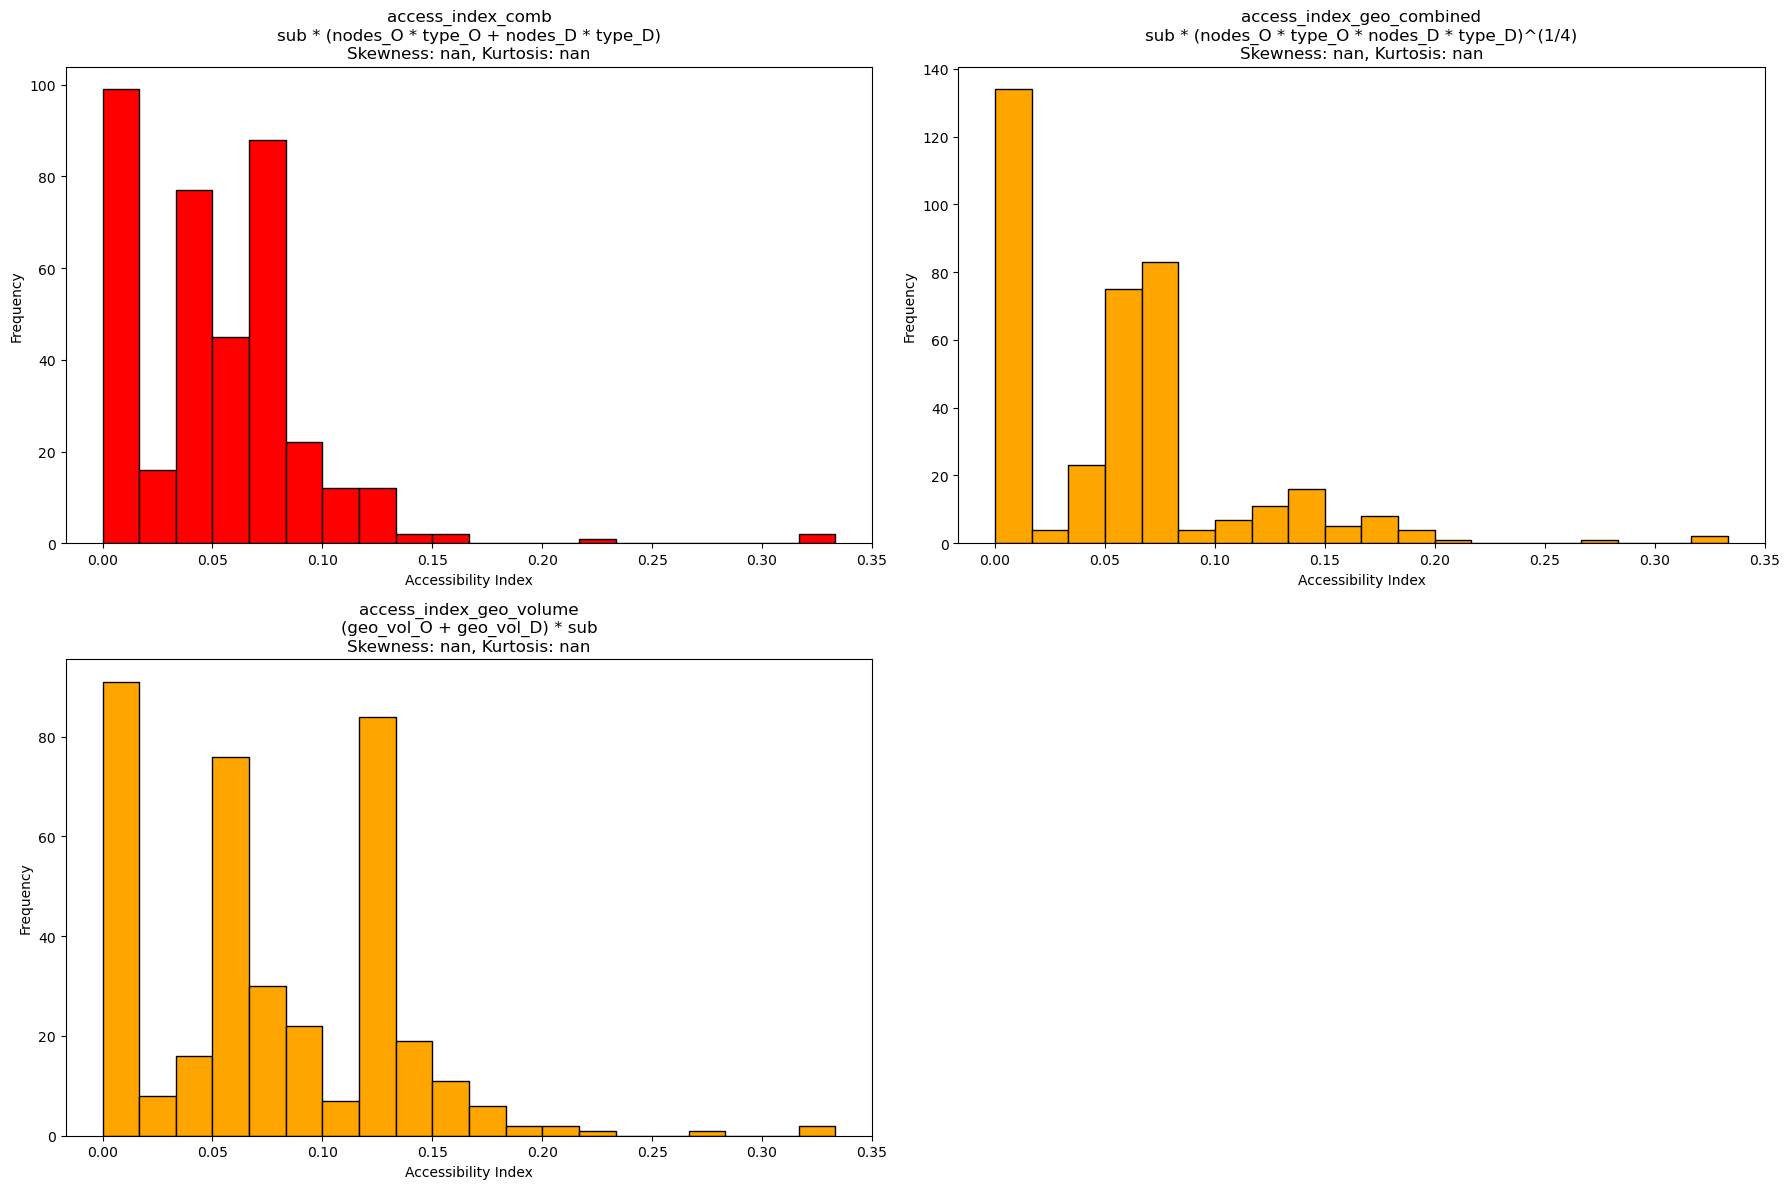

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

# Initialize MinMaxScaler for normalization between 0 and 1/3
scaler = MinMaxScaler(feature_range=(0, 1/3))

# 1. Combined Node Types Approach (No Weights)
MOTILITY['access_index_comb'] = (
    MOTILITY['normalized_subscription'] *
    (MOTILITY['nor_nodes_O_count'] * MOTILITY['nor_nodes_O_type'] +
     MOTILITY['nor_nodes_D_count'] * MOTILITY['nor_nodes_D_type'])
)
MOTILITY['access_index_comb'] = scaler.fit_transform(MOTILITY[['access_index_comb']])

# 2. Geometric Mean-Based Combined Index (No Weights)
MOTILITY['access_index_geo_combined'] = MOTILITY['normalized_subscription'] * (
    MOTILITY['nor_nodes_O_count'] *
    MOTILITY['nor_nodes_O_type'] *
    MOTILITY['nor_nodes_D_count'] *
    MOTILITY['nor_nodes_D_type']
) ** (1/4)
MOTILITY['access_index_geo_combined'] = scaler.fit_transform(MOTILITY[['access_index_geo_combined']])

# 3. Geometric Volume-Based Index (No Weights)
MOTILITY['geo_volume_origin'] = (
    MOTILITY['nor_nodes_O_count'] * MOTILITY['nor_nodes_O_type']
) ** (1/2)

MOTILITY['geo_volume_destination'] = (
    MOTILITY['nor_nodes_D_count'] * MOTILITY['nor_nodes_D_type']
) ** (1/2)

MOTILITY['access_index_geo_volume'] = (
    (MOTILITY['geo_volume_origin'] + MOTILITY['geo_volume_destination']) *
    MOTILITY['normalized_subscription']
)
MOTILITY['access_index_geo_volume'] = scaler.fit_transform(MOTILITY[['access_index_geo_volume']])

# Methods to analyze and their formulas
methods = [
    ('access_index_comb', 'sub * (nodes_O * type_O + nodes_D * type_D)'),
    ('access_index_geo_combined', 'sub * (nodes_O * type_O * nodes_D * type_D)^(1/4)'),
    ('access_index_geo_volume', '(geo_vol_O + geo_vol_D) * sub')
]

# Calculate skewness and kurtosis for each method and prepare annotations
skewness_kurtosis = []
for method, _ in methods:
    skew_val = skew(MOTILITY[method])
    kurt_val = kurtosis(MOTILITY[method], fisher=True)
    skewness_kurtosis.append((method, skew_val, kurt_val))

# Identify the method with skewness and kurtosis closest to 0
best_method = min(skewness_kurtosis, key=lambda x: abs(x[1]) + abs(x[2]))

# Plot histograms with annotations for skewness and kurtosis
plt.figure(figsize=(18, 12))

for i, (method, formula) in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    color = 'red' if method == best_method[0] else 'orange'
    plt.hist(MOTILITY[method], bins=20, edgecolor='black', color=color)
    skew_val, kurt_val = skew(MOTILITY[method]), kurtosis(MOTILITY[method], fisher=True)
    plt.title(f"{method}\n{formula}\nSkewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}")
    plt.xlabel("Accessibility Index")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [61]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Initialize MinMaxScaler for normalization between 0 and 1/3
scaler = MinMaxScaler(feature_range=(0, 1/3))

# 1. Combined Node Types Approach (No Weights)
MOTILITY['access_index_comb'] = (
    MOTILITY['normalized_subscription'] *
    (MOTILITY['nor_nodes_O_count'] * MOTILITY['nor_nodes_O_type'] +
     MOTILITY['nor_nodes_D_count'] * MOTILITY['nor_nodes_D_type'])
)
MOTILITY['access_index_comb'] = scaler.fit_transform(MOTILITY[['access_index_comb']])

# 2. Geometric Mean-Based Combined Index (No Weights)
MOTILITY['access_index_geo_combined'] = MOTILITY['normalized_subscription'] * (
    MOTILITY['nor_nodes_O_count'] *
    MOTILITY['nor_nodes_O_type'] *
    MOTILITY['nor_nodes_D_count'] *
    MOTILITY['nor_nodes_D_type']
) ** (1/4)
MOTILITY['access_index_geo_combined'] = scaler.fit_transform(MOTILITY[['access_index_geo_combined']])

# 3. Geometric Volume-Based Index (No Weights)
MOTILITY['geo_volume_origin'] = (
    MOTILITY['nor_nodes_O_count'] * MOTILITY['nor_nodes_O_type']
) ** (1/2)

MOTILITY['geo_volume_destination'] = (
    MOTILITY['nor_nodes_D_count'] * MOTILITY['nor_nodes_D_type']
) ** (1/2)

MOTILITY['access_index_geo_volume'] = (
    (MOTILITY['geo_volume_origin'] + MOTILITY['geo_volume_destination']) *
    MOTILITY['normalized_subscription']
)
MOTILITY['access_index_geo_volume'] = scaler.fit_transform(MOTILITY[['access_index_geo_volume']])

# Methods to analyze and their formulas
methods = [
    ('access_index_comb', 'sub * (nodes_O * type_O + nodes_D * type_D)'),
    ('access_index_geo_combined', 'sub * (nodes_O * type_O * nodes_D * type_D)^(1/4)'),
    ('access_index_geo_volume', '(geo_vol_O + geo_vol_D) * sub')
]

# Calculate skewness and kurtosis for each method and prepare annotations
skewness_kurtosis = []
for method, _ in methods:
    skew_val = skew(MOTILITY[method])
    kurt_val = kurtosis(MOTILITY[method], fisher=True)
    skewness_kurtosis.append((method, skew_val, kurt_val))

# Save the plots and results as a PDF
with PdfPages("accessibility_analysis.pdf") as pdf:
    plt.figure(figsize=(18, 12))

    for i, (method, formula) in enumerate(methods, 1):
        plt.subplot(2, 2, i)
        plt.hist(MOTILITY[method], bins=20, edgecolor='black', color='orange')
        skew_val, kurt_val = skew(MOTILITY[method]), kurtosis(MOTILITY[method], fisher=True)
        plt.title(f"{method}\n{formula}\nSkewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}")
        plt.xlabel("Accessibility Index")
        plt.ylabel("Frequency")

    plt.tight_layout()
    pdf.savefig()  # Save the current figure in the PDF
    plt.close()

    # Save skewness and kurtosis results as a table in the PDF
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table_data = [['Method', 'Skewness', 'Kurtosis']] + [[m, f"{s:.2f}", f"{k:.2f}"] for m, s, k in skewness_kurtosis]
    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    pdf.savefig(fig)
    plt.close()


### 3.2.2 Skills (1/3)

#### 3.2.2.1 Shared Mobility

In [64]:
# Shared mobility accessbility counts half for skills 

In [65]:
min_sub = MOTILITY['How often do you use these shared mobility options on a weekly basis?'].min()
max_sub = MOTILITY['How often do you use these shared mobility options on a weekly basis?'].max()
MOTILITY['normalized_shared_mobility'] = (MOTILITY['How often do you use these shared mobility options on a weekly basis?'] - min_sub) / (max_sub - min_sub) * 0.5

#### 3.2.2.2 Smart Phone

In [67]:
#'Do you use your smartphone for commuting purposes?',
#'For what purpose do you use your smartphone?',

In [68]:
min_sub = MOTILITY['For what purpose do you use your smartphone?'].min()
max_sub = MOTILITY['For what purpose do you use your smartphone?'].max()
MOTILITY['normalized_mobile_phone'] = (MOTILITY['For what purpose do you use your smartphone?'] - min_sub) / (max_sub - min_sub) * 0.5

In [69]:
# Normalize a column to a target range
def normalize_to_range(column, target_min=0, target_max=1/3):
    col_min = column.min()
    col_max = column.max()
    # Avoid division by zero if col_min == col_max
    if col_max == col_min:
        return pd.Series(target_min, index=column.index)
    # Normalize using min-max scaling
    normalized = target_min + (column - col_min) * (target_max - target_min) / (col_max - col_min)
    return normalized

# Summing the motility skills
MOTILITY['n-skills_raw'] = MOTILITY.loc[:, 'normalized_shared_mobility':'normalized_mobile_phone'].sum(axis=1)

# Remap the values of n-skills to [0, 1/3]
MOTILITY['n-skills'] = normalize_to_range(MOTILITY['n-skills_raw'], target_min=0, target_max=1/3)

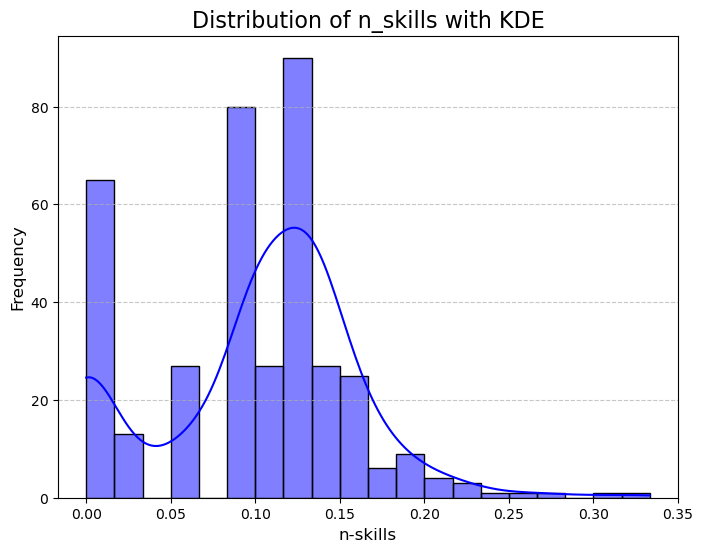

In [70]:
# Plot a histogram and KDE to visualize the skewness of the 'n_skills' column
plt.figure(figsize=(8, 6))
sns.histplot(MOTILITY['n-skills'], kde=True, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of n_skills with KDE', fontsize=16)
plt.xlabel('n-skills', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 3.2.3 Appropriation (1/3)

#### 3.2.3.1 Modal Preferences 

In [73]:
# check first for the top 3 public transport options. the options can be categorized into 3 main parts 
# Public Transport, Active mobility, Private cars.
# The main thing is to measure variations, so the best score is when users use the 3 categories, and the owest is when people pick from 
# one option.

In [74]:
import pandas as pd

# Define transport categories
public_transport = {'Train', 'Metro', 'Tram', 'Bus'}
active_shared_mobility = {
    'Personal Bike',
    'Bike Sharing',
    'Scooter',
    'Shared Car',
    'I just walk'
}
private_car = {'Private Car'}

# Function to calculate diversity score
def calculate_diversity(row):
    # Split user responses into a set of unique options
    selected_options = set(row.split(','))
    
    # Check which categories are included
    categories = set()
    if selected_options & public_transport:
        categories.add('public_transport')
    if selected_options & active_shared_mobility:
        categories.add('active_shared_mobility')
    if selected_options & private_car:
        categories.add('private_car')
    
    # Return the diversity score based on the number of categories
    return len(categories)

# Example column name
column_name = 'Rank the most used means of transport you use! (Drag and drop the three most used). - Groups - Drag and drop the most used of transport options in order here'

# Preprocess the column to simplify Bike Sharing option
MOTILITY[column_name] = MOTILITY[column_name].str.replace(
    'Bike Sharing (BikeMi, Lime, RideMovi...)', 'Bike Sharing'
)

# Apply the function to the column
MOTILITY['Diversity Score'] = MOTILITY[column_name].apply(calculate_diversity)


#### 3.2.3.2 Attittudes towards the future

In [76]:
# Create the new column `attitudes` as the product of the two columns
MOTILITY['attitudes'] = (
    MOTILITY['To which extent you are willing to change your mobility behaviour?'] *
    MOTILITY['What stimulate you to change your mobility behavior? - Selected Choice']
)

In [77]:
# Normalize a column to a target range
def normalize_to_range(column, target_min=0, target_max=0.5):
    col_min = column.min()
    col_max = column.max()
    # Avoid division by zero if col_min == col_max
    if col_max == col_min:
        return pd.Series(target_min, index=column.index)
    # Normalize using min-max scaling
    normalized = target_min + (column - col_min) * (target_max - target_min) / (col_max - col_min)
    return normalized

# Normalize Diversity Score to [0, 0.5]
MOTILITY['normalized_diversity_score'] = normalize_to_range(MOTILITY['Diversity Score'])

# Normalize attitudes to [0, 0.5]
MOTILITY['normalized_attitudes'] = normalize_to_range(MOTILITY['attitudes'])

# Create n-appropriation by summing the two normalized columns
MOTILITY['n-appropriation_raw'] = MOTILITY['normalized_diversity_score'] + MOTILITY['normalized_attitudes']

# Normalize n-appropriation to [0, 1/3]
MOTILITY['n-appropriation'] = normalize_to_range(MOTILITY['n-appropriation_raw'], target_min=0, target_max=1/3)

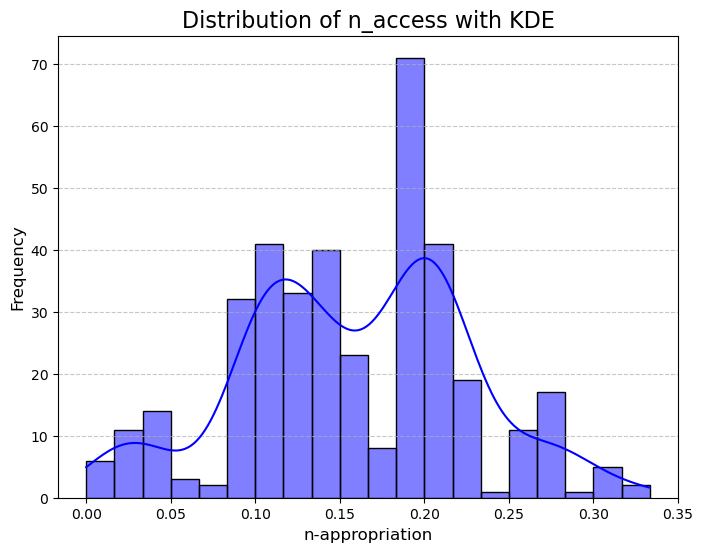

In [78]:
# Plot a histogram and KDE to visualize the skewness of the 'n_access' column
plt.figure(figsize=(8, 6))
sns.histplot(MOTILITY['n-appropriation'], kde=True, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of n_access with KDE', fontsize=16)
plt.xlabel('n-appropriation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 3.2 Calculaing Motility Index

In [80]:
# Create n-appropriation by summing the two normalized columns
MOTILITY['MOTILITY'] = MOTILITY['access_index_geo_volume'] + MOTILITY['n-skills'] + MOTILITY ['n-appropriation']

In [81]:
# Calculate mean and standard deviation
mean_motility = MOTILITY['MOTILITY'].mean()
std_motility = MOTILITY['MOTILITY'].std()

# Calculate the z-score manually
MOTILITY['Multimotility_zScore'] = (MOTILITY['MOTILITY'] - mean_motility) / std_motility

# Display the first few rows to verify
print(MOTILITY[['MOTILITY', 'Multimotility_zScore']].head())


   MOTILITY  Multimotility_zScore
0  0.141955             -1.732001
1  0.110000             -2.018535
2  0.249270             -0.769720
3  0.103333             -2.078315
4  0.241953             -0.835328


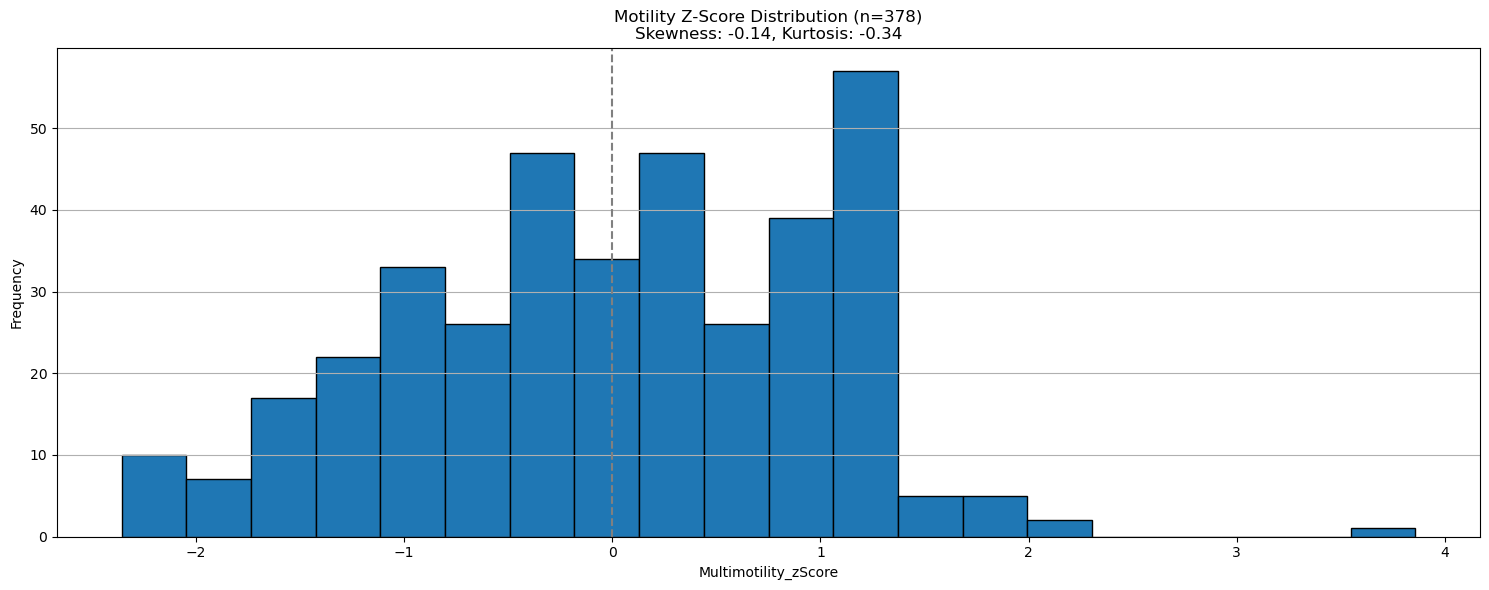

In [82]:
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import numpy as np

# Calculate skewness and kurtosis for 'Multimodality_zScore'
MOTILITY_skew = skew(MOTILITY['Multimotility_zScore'].dropna())
MOTILITY_kurtosis = kurtosis(MOTILITY['Multimotility_zScore'].dropna(), fisher=True)

# Number of values
n = len(MOTILITY['Multimotility_zScore'].dropna())

# Plot histogram with z-score details
plt.figure(figsize=(15, 6))
plt.hist(MOTILITY['Multimotility_zScore'].dropna(), bins=20, edgecolor='black')

# Add a gray hashed line for z = 0
plt.axvline(0, color='gray', linestyle='--', linewidth=1.5)

# Add title with skewness, kurtosis, and n
plt.title(f"Motility Z-Score Distribution (n={n})\nSkewness: {MOTILITY_skew:.2f}, Kurtosis: {MOTILITY_kurtosis:.2f}")
plt.xlabel("Multimotility_zScore")
plt.ylabel("Frequency")
plt.grid(axis='y')

# Adjust layout
plt.tight_layout()

# Save plot as PDF
plt.savefig("mMultimotility_zScore_distribution.pdf")

# Show the plot
plt.show()

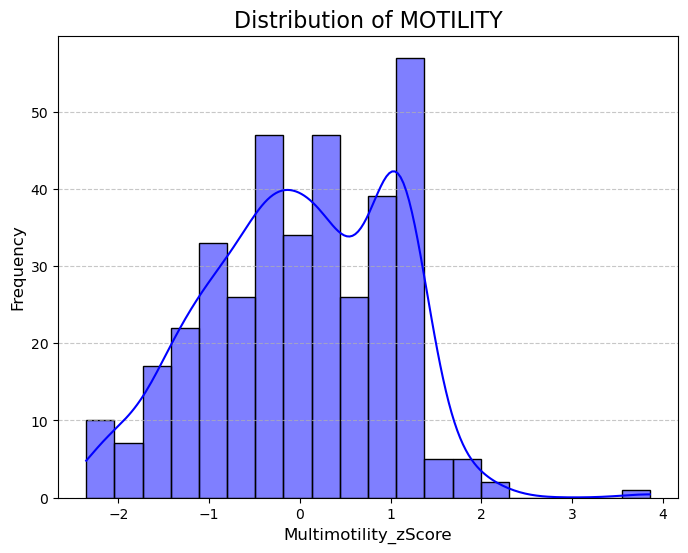

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(MOTILITY['Multimotility_zScore'], kde=True, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of MOTILITY', fontsize=16)
plt.xlabel('Multimotility_zScore', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PDF file
plt.savefig('motility_distribution.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [84]:
# As summing the 3 indicators of Motility doesn't sum to 1, I need to distribute the values from 0 to 1 
# Initialize MinMaxScaler for normalization to [0, 1]
#scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the 'MOTILITY' column
#MOTILITY['MOTILITY'] = scaler.fit_transform(MOTILITY[['MOTILITY']])

# Display the first few rows to verify the normalization
#print(MOTILITY[['access_index_geo_volume', 'n-skills', 'n-appropriation', 'MOTILITY']].head())

### Calculating PT and Destination 

# 4.0 Plotting Motility with Multimodality

In [87]:
MMI_unique = MMI[['Response ID', 'Multimodality_zScore']].drop_duplicates(subset='Response ID')
MOTILITY_unique = MOTILITY[['Response ID', 'Multimotility_zScore']].drop_duplicates(subset='Response ID')

In [88]:
# Merge the two datasets on the 'Response ID' column
merged_dataset = pd.merge(
    MMI_unique,  # MMI with unique Response IDs
    MOTILITY_unique,  # MOTILITY with unique Response IDs
    on='Response ID',  # Merge on the common column
    how='inner'  # Perform an inner join to include only matching Response IDs
)

In [89]:
merged_dataset.to_csv('test.csv',index=False)

In [90]:
merged_dataset.info()
merged_dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Response ID           308 non-null    object 
 1   Multimodality_zScore  308 non-null    float64
 2   Multimotility_zScore  306 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.3+ KB


Response ID  Multimodality_zScore  Multimotility_zScore
0    R_6JmlJEGCOWo9rTX              0.017263             -1.732001
1    R_61z5R1KEmMv8GGz             -0.170327             -2.018535
2    R_2QS9J3nCE9mYu8B              0.017263             -0.769720
3    R_2JlKjQUhcT7unUa             -0.374319             -2.078315
4    R_6IoBWPSrHaPVS7I              0.017263             -0.835328
..                 ...                   ...                   ...
303  R_2sogfeczO00yYvM             -1.340959             -1.028991
304  R_81Af79F72aaAUsT              1.064749              0.267545
305  R_82S6xK8Q8m0Ceye              0.017263              2.018871
306  R_27pz8nRKYyJZW8h              1.064749             -0.392679
307  R_2q41Zzco1HRd92q              1.190272             -0.376574

[308 rows x 3 columns]

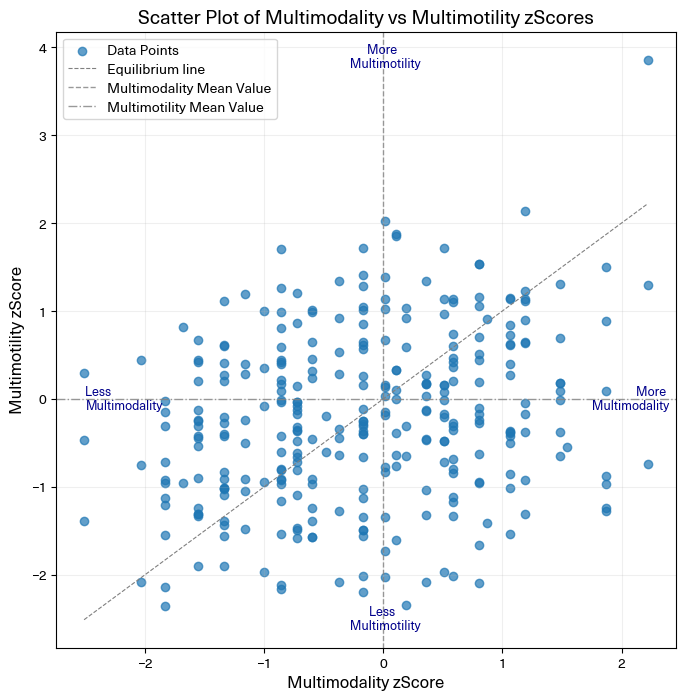

In [91]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set the font to Neue Haas Unica
mpl.rcParams['font.family'] = 'Neue Haas Unica'

# Create the figure
plt.figure(figsize=(8, 8))

# Scatter plot of Multimodality_zScore vs Multimotility_zScore
plt.scatter(merged_dataset['Multimodality_zScore'], merged_dataset['Multimotility_zScore'], 
            alpha=0.7, label='Data Points')

# Add a line where x = y
x = np.linspace(min(merged_dataset['Multimodality_zScore']), max(merged_dataset['Multimodality_zScore']), 100)
plt.plot(x, x, color='gray', linestyle='--', linewidth=0.8, label='Equilibrium line')  # Diagonal line

# Highlight the importance of zero by adding horizontal and vertical lines at 0
plt.axvline(0, color='gray', linestyle='--', alpha=0.8, linewidth=1, label='Multimodality Mean Value')
plt.axhline(0, color='gray', linestyle='-.', linewidth=1, alpha=0.8, label='Multimotility Mean Value')

# Add labels, title, and legend
plt.title('Scatter Plot of Multimodality vs Multimotility zScores', fontsize=14)
plt.xlabel('Multimodality zScore', fontsize=12)
plt.ylabel('Multimotility zScore', fontsize=12)
plt.legend()

# Add grid for better readability
plt.grid(alpha=0.2)

# Add annotations
plt.text(2.4, 0, 'More \n Multimodality', fontsize=9, color='darkblue', ha='right', va='center')
plt.text(-2.5, 0, 'Less \nMultimodality', fontsize=9, color='darkblue', ha='left', va='center')
plt.text(0, 3.9, 'More \n Multimotility', fontsize=9, color='darkblue', ha='center', va='center')
plt.text(0, -2.5, 'Less \n Multimotility', fontsize=9, color='darkblue', ha='center', va='center')

# Save the plot as a PDF with the desired name
directory = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\writings\Figures\Figure_4.pdf"
plt.savefig(directory, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [92]:
import pandas as pd

# Select the relevant columns
columns_to_export = ['Multimodality_zScore', 'Multimotility_zScore']
exported_data = merged_dataset[columns_to_export]

# Save to CSV file
exported_data.to_csv('multimodality_multimotility_data.csv', index=False)

print("Data exported successfully to 'multimodality_multimotility_data.csv'.")


Data exported successfully to 'multimodality_multimotility_data.csv'.


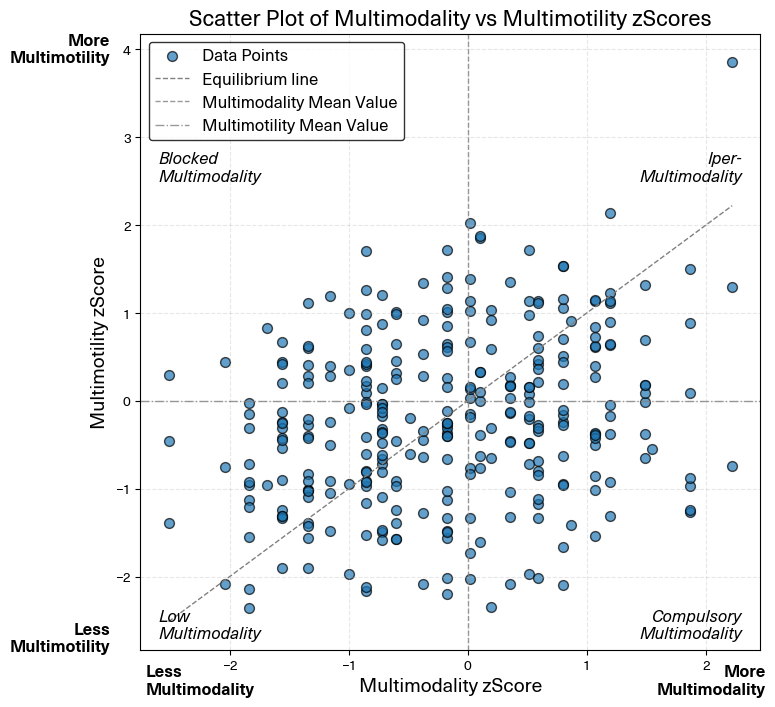

In [93]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set the font to Neue Haas Unica
mpl.rcParams['font.family'] = 'Neue Haas Unica'

# Create the figure
plt.figure(figsize=(8, 8))

# Scatter plot of Multimodality_zScore vs Multimotility_zScore
plt.scatter(merged_dataset['Multimodality_zScore'], merged_dataset['Multimotility_zScore'], 
            alpha=0.7, label='Data Points', s=50, edgecolors='black')

# Add a line where x = y
x = np.linspace(min(merged_dataset['Multimodality_zScore']), max(merged_dataset['Multimodality_zScore']), 100)
plt.plot(x, x, color='gray', linestyle='--', linewidth=1, label='Equilibrium line')

# Highlight the importance of zero by adding horizontal and vertical lines at 0
plt.axvline(0, color='gray', linestyle='--', alpha=0.8, linewidth=1, label='Multimodality Mean Value')
plt.axhline(0, color='gray', linestyle='-.', linewidth=1, alpha=0.8, label='Multimotility Mean Value')

# Add labels, title, and adjust font sizes for better readability
plt.title('Scatter Plot of Multimodality vs Multimotility zScores', fontsize=16)
plt.xlabel('Multimodality zScore', fontsize=14)
plt.ylabel('Multimotility zScore', fontsize=14)

# Improve legend readability
plt.legend(fontsize=12, frameon=True, edgecolor='black')

# Add grid with lighter opacity for readability
plt.grid(alpha=0.3, linestyle='--')

# Add profile labels with italic formatting and specified alignment
plt.text(-2.6, -2.7, 'Low\nMultimodality', fontsize=12, color='black', ha='left', fontstyle='italic')
plt.text(2.3, -2.7, 'Compulsory\nMultimodality', fontsize=12, color='black', ha='right', fontstyle='italic')
plt.text(-2.6, 2.5, 'Blocked\nMultimodality', fontsize=12, color='black', ha='left', fontstyle='italic')
plt.text(2.3, 2.5, 'Iper-\nMultimodality', fontsize=12, color='black', ha='right', fontstyle='italic')

# Move and align multimotility labels outside the plot along the y-axis
plt.text(-3, 4.0, 'More\nMultimotility', fontsize=12, color='black', ha='right', va='center', fontweight='bold')
plt.text(-3, -2.7, 'Less\nMultimotility', fontsize=12, color='black', ha='right', va='center', fontweight='bold')

# Move and align multimodality labels outside the plot along the x-axis
plt.text(2.5, -3, 'More\nMultimodality', fontsize=12, color='black', ha='right', va='top', fontweight='bold')
plt.text(-2.7, -3, 'Less\nMultimodality', fontsize=12, color='black', ha='left', va='top', fontweight='bold')

# Save the plot as a PDF with the desired name
directory = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\writings\Figures\Figure_4_updated.pdf"
plt.savefig(directory, format='pdf', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


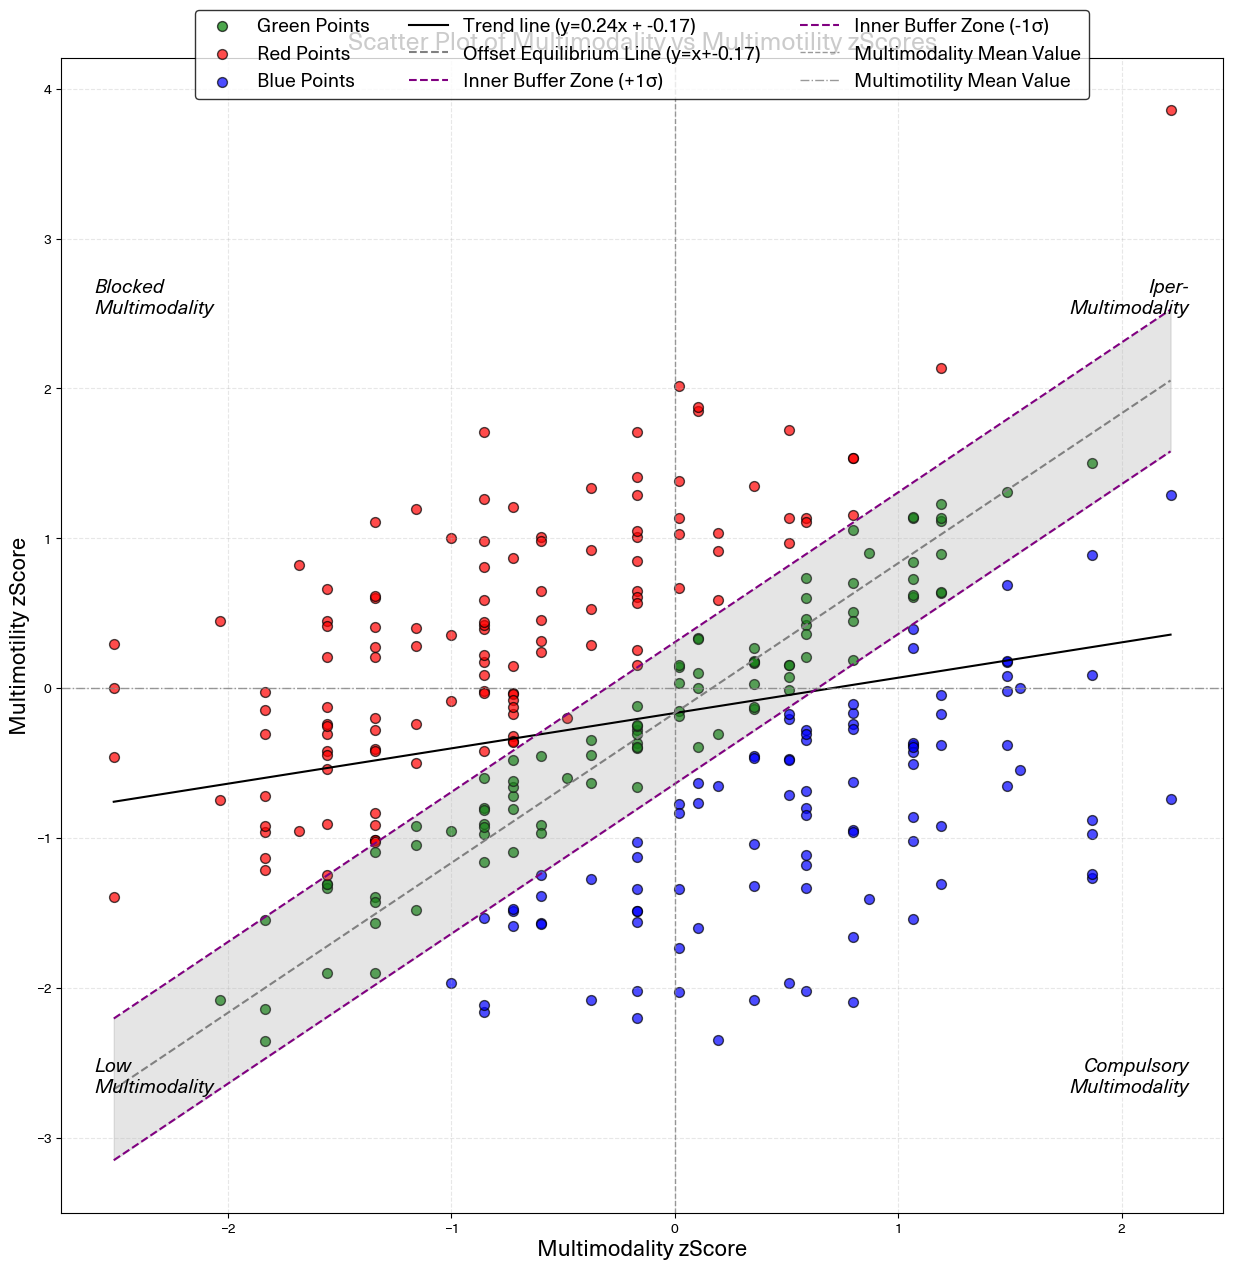

In [94]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Set the font to Neue Haas Unica
mpl.rcParams['font.family'] = 'Neue Haas Unica'

# Handle missing values by replacing NaN with 0
merged_dataset = merged_dataset.fillna({'Multimodality_zScore': 0, 'Multimotility_zScore': 0})

# Prepare data for regression
X = merged_dataset['Multimodality_zScore'].values.reshape(-1, 1)
y = merged_dataset['Multimotility_zScore'].values

# Fit the linear regression model (trend line)
reg_model = LinearRegression().fit(X, y)
slope = reg_model.coef_[0]
intercept = reg_model.intercept_

# Generate x values for plotting
x_vals = np.linspace(X.min(), X.max(), 100).flatten()

# Calculate offset equilibrium line (shifted line based on regression)
offset = intercept  # Shift based on regression intercept
equilibrium_line = x_vals + offset  # Adjusting equilibrium line to offset

# Control gray area with a factor 'k' to adjust its width
k = .5  # Modify this value to widen/narrow the gray area

# Calculate buffer zone limits (inner region ±kσ)
y_pred = reg_model.predict(X)
residuals = y - y_pred
residual_std = np.std(residuals)
inner_upper_bound = equilibrium_line + k * residual_std  # Adjustable width
inner_lower_bound = equilibrium_line - k * residual_std

# Define point colors based on their position
def classify_points(x, y):
    if y > inner_upper_bound[np.argmin(np.abs(x_vals - x))]:
        return 'red'  # Above inner zone
    elif y < inner_lower_bound[np.argmin(np.abs(x_vals - x))]:
        return 'blue'  # Below inner zone
    else:
        return 'green'  # Inside inner zone (gray area)

merged_dataset['Color'] = merged_dataset.apply(lambda row: classify_points(row['Multimodality_zScore'], row['Multimotility_zScore']), axis=1)

# Create the figure with updated size
plt.figure(figsize=(15, 15))

# Scatter plot with categorized data points
for color in ['green', 'red', 'blue']:
    subset = merged_dataset[merged_dataset['Color'] == color]
    plt.scatter(subset['Multimodality_zScore'], subset['Multimotility_zScore'], 
                alpha=0.7, label=f'{color.capitalize()} Points', s=50, edgecolors='black', color=color)

# Plot the trend line
plt.plot(x_vals, slope * x_vals + intercept, color='black', linewidth=1.5, label=f'Trend line (y={slope:.2f}x + {intercept:.2f})')

# Plot the offset equilibrium line
plt.plot(x_vals, equilibrium_line, color='gray', linestyle='--', linewidth=1.5, label=f'Offset Equilibrium Line (y=x+{offset:.2f})')

# Plot the equilibrium buffer (gray area inside ±kσ)
plt.fill_between(x_vals.flatten(), inner_lower_bound.flatten(), inner_upper_bound.flatten(), color='gray', alpha=0.2)

# Draw inner buffer lines (purple - adjustable buffer zone)
plt.plot(x_vals, inner_upper_bound, color='purple', linestyle='--', linewidth=1.5, label='Inner Buffer Zone (+1σ)')
plt.plot(x_vals, inner_lower_bound, color='purple', linestyle='--', linewidth=1.5, label='Inner Buffer Zone (-1σ)')

# Add plot details
plt.axvline(0, color='gray', linestyle='--', alpha=0.8, linewidth=1, label='Multimodality Mean Value')
plt.axhline(0, color='gray', linestyle='-.', linewidth=1, alpha=0.8, label='Multimotility Mean Value')

# Add labels and title
plt.title('Scatter Plot of Multimodality vs Multimotility zScores', fontsize=18)
plt.xlabel('Multimodality zScore', fontsize=16)
plt.ylabel('Multimotility zScore', fontsize=16)

# Add profile labels
plt.text(-2.6, -2.7, 'Low\nMultimodality', fontsize=14, color='black', ha='left', fontstyle='italic')
plt.text(2.3, -2.7, 'Compulsory\nMultimodality', fontsize=14, color='black', ha='right', fontstyle='italic')
plt.text(-2.6, 2.5, 'Blocked\nMultimodality', fontsize=14, color='black', ha='left', fontstyle='italic')
plt.text(2.3, 2.5, 'Iper-\nMultimodality', fontsize=14, color='black', ha='right', fontstyle='italic')

# Add grid
plt.grid(alpha=0.3, linestyle='--')

# Move legend outside of the plot (above)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=14, frameon=True, edgecolor='black')

# Save the plot as a PDF with the desired name
directory = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\writings\Figures\Figure_4_updated_with_inner_equilibrium.pdf"
plt.savefig(directory, format='pdf', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


In [95]:
# Define function to classify points into categories
def classify_points(x, y):
    if y > inner_upper_bound[np.argmin(np.abs(x_vals - x))]:
        return 'Above Equilibrium', 'Red'
    elif y < inner_lower_bound[np.argmin(np.abs(x_vals - x))]:
        return 'Below Equilibrium', 'Blue'
    else:
        return 'Within Equilibrium', 'Green'

# Apply classification and store in new columns 'Category' and 'Type'
merged_dataset[['Category', 'Type']] = merged_dataset.apply(lambda row: pd.Series(classify_points(row['Multimodality_zScore'], row['Multimotility_zScore'])), axis=1)

# View the first few rows of the updated dataset
print(merged_dataset[['Multimodality_zScore', 'Multimotility_zScore', 'Category', 'Type']].head())

# Optionally save the labeled dataset to a new CSV file
merged_dataset.to_csv('labeled_mobility_data.csv', index=False)


   Multimodality_zScore  Multimotility_zScore           Category  Type
0              0.017263             -1.732001  Below Equilibrium  Blue
1             -0.170327             -2.018535  Below Equilibrium  Blue
2              0.017263             -0.769720  Below Equilibrium  Blue
3             -0.374319             -2.078315  Below Equilibrium  Blue
4              0.017263             -0.835328  Below Equilibrium  Blue


In [96]:
merged_dataset

Response ID  Multimodality_zScore  Multimotility_zScore Color  \
0    R_6JmlJEGCOWo9rTX              0.017263             -1.732001  blue   
1    R_61z5R1KEmMv8GGz             -0.170327             -2.018535  blue   
2    R_2QS9J3nCE9mYu8B              0.017263             -0.769720  blue   
3    R_2JlKjQUhcT7unUa             -0.374319             -2.078315  blue   
4    R_6IoBWPSrHaPVS7I              0.017263             -0.835328  blue   
..                 ...                   ...                   ...   ...   
303  R_2sogfeczO00yYvM             -1.340959             -1.028991   red   
304  R_81Af79F72aaAUsT              1.064749              0.267545  blue   
305  R_82S6xK8Q8m0Ceye              0.017263              2.018871   red   
306  R_27pz8nRKYyJZW8h              1.064749             -0.392679  blue   
307  R_2q41Zzco1HRd92q              1.190272             -0.376574  blue   

              Category  Type  
0    Below Equilibrium  Blue  
1    Below Equilibrium  Blue  
2    Below Equilibrium  Blue  
3    Below Equilibrium  Blue  
4    Below Equilibrium  Blue  
..                 ...   ...  
303  Above Equilibrium   Red  
304  Below Equilibrium  Blue  
305  Above Equilibrium   Red  
306  Below Equilibrium  Blue  
307  Below Equilibrium  Blue  

[308 rows x 6 columns]

# 5.0 Interpertations of the values 

In [98]:
# Select 'Response ID', 'distance', and 'CAP_Location' from merged_data
merged_subset = merged_data[['Response ID', 'distance', 'CAP_Location']]

# Merge the selected columns into merged_dataset based on 'Response ID'
merged_dataset = merged_dataset.merge(merged_subset, on='Response ID', how='left')

# Display the updated merged_dataset
merged_dataset


Response ID  Multimodality_zScore  Multimotility_zScore Color  \
0    R_6JmlJEGCOWo9rTX              0.017263             -1.732001  blue   
1    R_61z5R1KEmMv8GGz             -0.170327             -2.018535  blue   
2    R_2QS9J3nCE9mYu8B              0.017263             -0.769720  blue   
3    R_2JlKjQUhcT7unUa             -0.374319             -2.078315  blue   
4    R_6IoBWPSrHaPVS7I              0.017263             -0.835328  blue   
..                 ...                   ...                   ...   ...   
376  R_2sogfeczO00yYvM             -1.340959             -1.028991   red   
377  R_81Af79F72aaAUsT              1.064749              0.267545  blue   
378  R_82S6xK8Q8m0Ceye              0.017263              2.018871   red   
379  R_27pz8nRKYyJZW8h              1.064749             -0.392679  blue   
380  R_2q41Zzco1HRd92q              1.190272             -0.376574  blue   

              Category  Type    distance                   CAP_Location  
0    Below Equilibrium  Blue   15.044886            In Lombardia Region  
1    Below Equilibrium  Blue   20.372493            In Lombardia Region  
2    Below Equilibrium  Blue    2.424350                       In Milan  
3    Below Equilibrium  Blue  117.914526    Outside of Lombardia Region  
4    Below Equilibrium  Blue    2.424350                       In Milan  
..                 ...   ...         ...                            ...  
376  Above Equilibrium   Red    1.169644                       In Milan  
377  Below Equilibrium  Blue   33.513502            In Lombardia Region  
378  Above Equilibrium   Red    2.452124                       In Milan  
379  Below Equilibrium  Blue   34.655301  In Metropolitan area of Milan  
380  Below Equilibrium  Blue    9.237931                       In Milan  

[381 rows x 8 columns]

## 5.1 Distance

### 5.1.1 Linear distance 

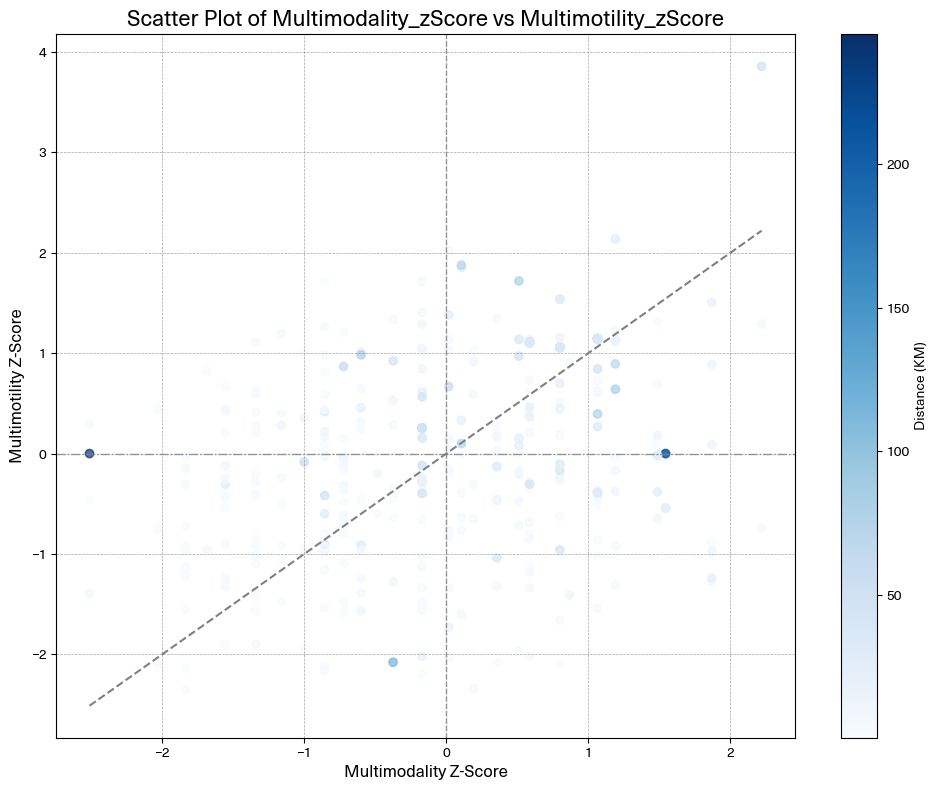

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import Normalize

# Set the font to Neue Haas Unica
mpl.rcParams['font.family'] = 'Neue Haas Unica'

# Discretize the distance into continuous values and normalize
norm = Normalize(vmin=merged_dataset['distance'].min(), vmax=merged_dataset['distance'].max())
cmap = mpl.cm.Blues

# Map distance to a color gradient
scatter_colors = cmap(norm(merged_dataset['distance']))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot of Multimodality_zScore vs Multimotility_zScore
scatter = ax.scatter(
    merged_dataset['Multimodality_zScore'],
    merged_dataset['Multimotility_zScore'],
    c=scatter_colors,
    alpha=0.7
)

# Add a line where x = y
x = np.linspace(min(merged_dataset['Multimodality_zScore']), max(merged_dataset['Multimodality_zScore']), 100)
ax.plot(x, x, color='gray', linestyle='--', label='Equilibrium line')  # Diagonal line

# Highlight the importance of zero by adding horizontal and vertical lines at 0
ax.axvline(0, color='gray', linestyle='--', alpha=0.8, linewidth=1, label='Multimodality Mean Value')
ax.axhline(0, color='gray', linestyle='-.', linewidth=1, alpha=0.8, label='Multimotility Mean Value')

# Add a grid to the plot
ax.grid(which='major', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Customize grid appearance

# Add labels, title, and legend
ax.set_title('Scatter Plot of Multimodality_zScore vs Multimotility_zScore', fontsize=16)
ax.set_xlabel('Multimodality Z-Score', fontsize=12)
ax.set_ylabel('Multimotility Z-Score', fontsize=12)

# Add a colorbar to represent the distance gradient
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Distance (KM)')

# Adjust layout to prevent clipping of legend and title
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('scatter_plot_with_grid.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


### 5.1.2 Distance Categorized based on K-Means clustering 

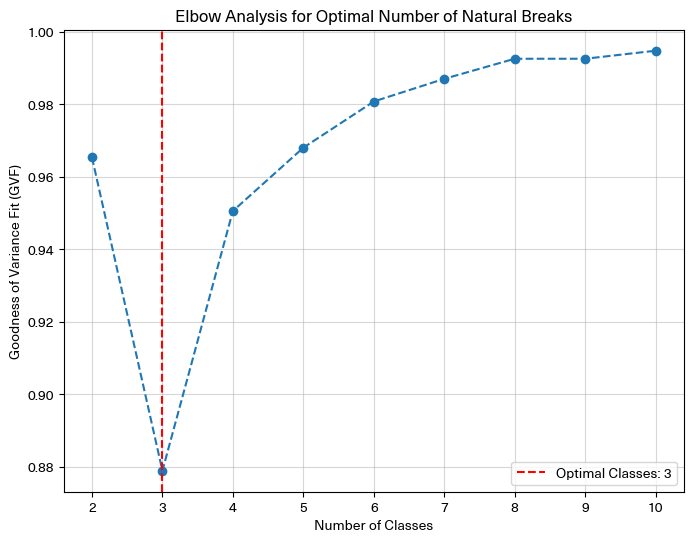

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import jenkspy

# Assume 'merged_dataset' is your DataFrame containing the 'distance' column
distance_data = merged_dataset['distance'].values

# Define a range of possible classes (e.g., from 2 to 10)
possible_classes = range(2, 11)

# Calculate goodness of variance fit (GVF) for each number of classes
gvfs = []

for n in possible_classes:
    breaks = jenkspy.jenks_breaks(distance_data, n_classes=n)
    clustered = np.digitize(distance_data, bins=breaks, right=True)
    
    # Calculate the goodness of variance fit (GVF)
    sdam = np.sum((distance_data - np.mean(distance_data)) ** 2)
    sdcm = sum([np.sum((distance_data[clustered == i] - np.mean(distance_data[clustered == i])) ** 2) for i in range(n)])
    gvf = (sdam - sdcm) / sdam
    gvfs.append(gvf)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(possible_classes, gvfs, marker='o', linestyle='--')
plt.title('Elbow Analysis for Optimal Number of Natural Breaks')
plt.xlabel('Number of Classes')
plt.ylabel('Goodness of Variance Fit (GVF)')
plt.grid(alpha=0.5)

# Highlight the elbow point (optional)
optimal_n = possible_classes[np.argmax(np.diff(gvfs))]
plt.axvline(optimal_n, color='red', linestyle='--', label=f'Optimal Classes: {optimal_n}')

plt.legend()
plt.show()


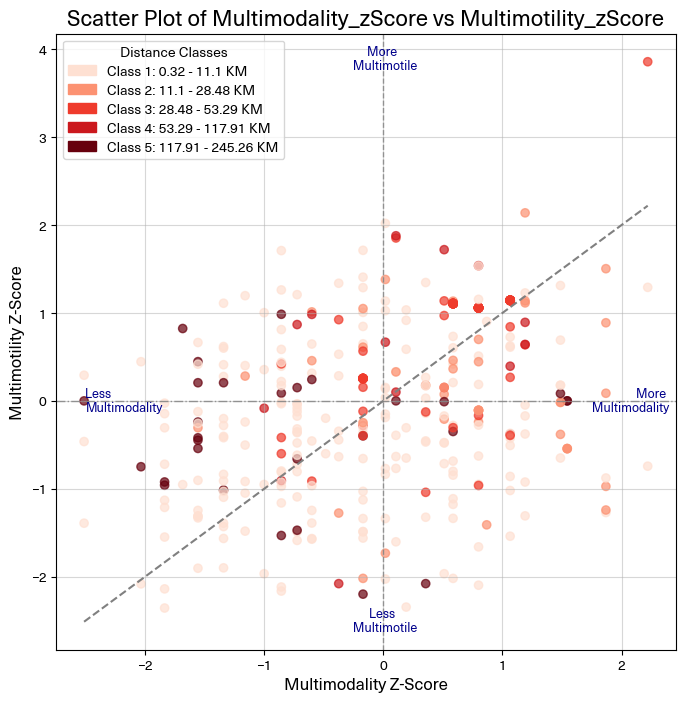

In [104]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import jenkspy  # For Natural Breaks classification

# Assume 'merged_dataset' is your DataFrame containing the 'distance' column

# Calculate Natural Breaks (Jenks) for the 'distance' column
breaks = jenkspy.jenks_breaks(merged_dataset['distance'], n_classes=5)

# Create a new column to classify 'distance' based on Natural Breaks
merged_dataset['distance_class'] = np.digitize(merged_dataset['distance'], bins=breaks, right=True)

# Set up distinct colors for each class
colors = ['#fee0d2', '#fc9272', '#ef3b2c', '#cb181d', '#67000d']

# Set the font to Neue Haas Unica
mpl.rcParams['font.family'] = 'Neue Haas Unica'

# Create the figure
plt.figure(figsize=(8, 8))

# Scatter plot of Multimodality_zScore vs Multimotility_zScore with color based on 'distance_class'
scatter = plt.scatter(
    merged_dataset['Multimodality_zScore'],
    merged_dataset['Multimotility_zScore'],
    c=[colors[i - 1] for i in merged_dataset['distance_class']],  # Assign color by class
    alpha=0.7
)

# Add a custom legend for the Natural Breaks
import matplotlib.patches as mpatches

# Format breaks and include "KM" only once
legend_patches = [
    mpatches.Patch(color=colors[i], 
                   label=f'Class {i + 1}: {round(breaks[i], 2)} - {round(breaks[i + 1], 2)} KM')
    for i in range(len(breaks) - 1)
]

plt.legend(handles=legend_patches, title='Distance Classes', fontsize=10, loc='upper left')

# Add a line where x = y
x = np.linspace(min(merged_dataset['Multimodality_zScore']), max(merged_dataset['Multimodality_zScore']), 100)
plt.plot(x, x, color='gray', linestyle='--', label='Equilibrium line')  # Diagonal line

# Highlight the importance of zero by adding horizontal and vertical lines at 0
plt.axvline(0, color='gray', linestyle='--', alpha=0.8, linewidth=1, label='Multimodality Mean Value')
plt.axhline(0, color='gray', linestyle='-.', linewidth=1, alpha=0.8, label='Multimotility Mean Value')

# Add labels, title, and legend
plt.title('Scatter Plot of Multimodality_zScore vs Multimotility_zScore', fontsize=16)
plt.xlabel('Multimodality Z-Score', fontsize=12)
plt.ylabel('Multimotility Z-Score', fontsize=12)

# Add grid for better readability
plt.grid(alpha=0.5)

# Add annotations
plt.text(2.4, 0, 'More \n Multimodality', fontsize=9, color='darkblue', ha='right', va='center')
plt.text(-2.5, 0, 'Less \nMultimodality', fontsize=9, color='darkblue', ha='left', va='center')
plt.text(0, 3.9, 'More \n Multimotile', fontsize=9, color='darkblue', ha='center', va='center')
plt.text(0, -2.5, 'Less \n Multimotile', fontsize=9, color='darkblue', ha='center', va='center')

# Save the plot as a PDF
plt.savefig('scatter_plot_natural_breaks_distance.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


### 5.1.3 Distance Grouped by CAPS

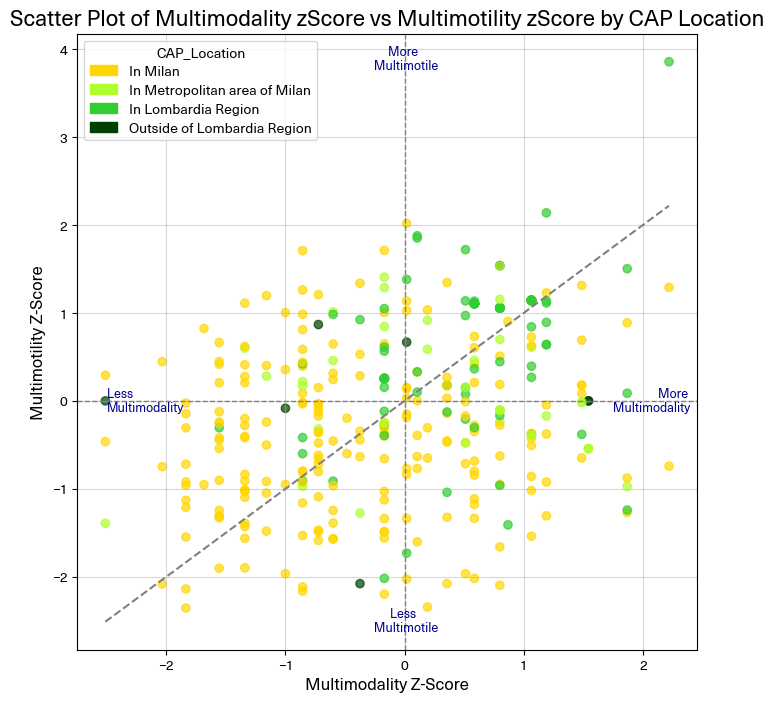

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Define the ranking for CAP_Location
cap_location_mapping = {
    'In Milan': 1,
    'In Metropolitan area of Milan': 2,
    'In Lombardia Region': 3,
    'Outside of Lombardia Region': 4
}

# Map CAP_Location to numeric values
merged_dataset['CAP_Rank'] = merged_dataset['CAP_Location'].map(cap_location_mapping)

# Define the yellow-to-green color mapping for each category
color_mapping = {
    'In Milan': '#FFD700',                        # Bright Yellow
    'In Metropolitan area of Milan': '#ADFF2F',   # Yellow-Green
    'In Lombardia Region': '#32CD32',              # Lime Green
    'Outside of Lombardia Region': '#004000'       # Very Dark Green
}

# Assign colors to each point based on CAP_Location
colors = merged_dataset['CAP_Location'].map(color_mapping)

# Create the figure
plt.figure(figsize=(8, 8))

# Scatter plot of Multimodality_zScore vs Multimotility_zScore with color based on CAP_Location
plt.scatter(
    merged_dataset['Multimodality_zScore'],
    merged_dataset['Multimotility_zScore'],
    c=colors,
    alpha=0.7
)

# Add a line where x = y
x = np.linspace(min(merged_dataset['Multimodality_zScore']), max(merged_dataset['Multimodality_zScore']), 100)
plt.plot(x, x, color='gray', linestyle='--', label='x = y')  # Diagonal line

# Highlight the importance of zero by adding horizontal and vertical lines at 0
plt.axvline(0, color='gray', linestyle='--', linewidth=1, label='Multimodality_zScore = 0')
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Multimotility_zScore = 0')

# Create a legend with colored patches for each CAP_Location category
legend_patches = [
    mpatches.Patch(color=color_mapping['In Milan'], label='In Milan'),
    mpatches.Patch(color=color_mapping['In Metropolitan area of Milan'], label='In Metropolitan area of Milan'),
    mpatches.Patch(color=color_mapping['In Lombardia Region'], label='In Lombardia Region'),
    mpatches.Patch(color=color_mapping['Outside of Lombardia Region'], label='Outside of Lombardia Region')
]
plt.legend(handles=legend_patches, title='CAP_Location', loc='upper left')

# Add labels and title
plt.title('Scatter Plot of Multimodality zScore vs Multimotility zScore by CAP Location', fontsize=16)
plt.xlabel('Multimodality Z-Score', fontsize=12)
plt.ylabel('Multimotility Z-Score', fontsize=12)

# Add annotations
plt.text(2.4, 0, 'More \n Multimodality', fontsize=9, color='darkblue', ha='right', va='center')
plt.text(-2.5, 0, 'Less \nMultimodality', fontsize=9, color='darkblue', ha='left', va='center')
plt.text(0, 3.9, 'More \n Multimotile', fontsize=9, color='darkblue', ha='center', va='center')
plt.text(0, -2.5, 'Less \n Multimotile', fontsize=9, color='darkblue', ha='center', va='center')

# Add grid for better readability
plt.grid(alpha=0.5)

# Save the plot as a PDF
plt.savefig('scatter_plot_CAP_Location_yellow_green.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


## 5.2 Gender

In [108]:
import pandas as pd

# Create a new DataFrame with Response ID and Gender columns
gender_data = filtered_data[['Response ID', 'How do you identify yourself? - Selected Choice']]

# Rename the gender column for easier reference
gender_data.rename(columns={'How do you identify yourself? - Selected Choice': 'Gender'}, inplace=True)

# Merge the gender_data into merged_dataset using 'Response ID' as the key
merged_dataset = merged_dataset.merge(gender_data, on='Response ID', how='left')
merged_dataset

C:\Users\mafgo\AppData\Local\Temp\ipykernel_12872\1973285235.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_data.rename(columns={'How do you identify yourself? - Selected Choice': 'Gender'}, inplace=True)


Response ID  Multimodality_zScore  Multimotility_zScore Color  \
0    R_6JmlJEGCOWo9rTX              0.017263             -1.732001  blue   
1    R_61z5R1KEmMv8GGz             -0.170327             -2.018535  blue   
2    R_2QS9J3nCE9mYu8B              0.017263             -0.769720  blue   
3    R_2JlKjQUhcT7unUa             -0.374319             -2.078315  blue   
4    R_6IoBWPSrHaPVS7I              0.017263             -0.835328  blue   
..                 ...                   ...                   ...   ...   
376  R_2sogfeczO00yYvM             -1.340959             -1.028991   red   
377  R_81Af79F72aaAUsT              1.064749              0.267545  blue   
378  R_82S6xK8Q8m0Ceye              0.017263              2.018871   red   
379  R_27pz8nRKYyJZW8h              1.064749             -0.392679  blue   
380  R_2q41Zzco1HRd92q              1.190272             -0.376574  blue   

              Category  Type    distance                   CAP_Location  \
0    Below Equilibrium  Blue   15.044886            In Lombardia Region   
1    Below Equilibrium  Blue   20.372493            In Lombardia Region   
2    Below Equilibrium  Blue    2.424350                       In Milan   
3    Below Equilibrium  Blue  117.914526    Outside of Lombardia Region   
4    Below Equilibrium  Blue    2.424350                       In Milan   
..                 ...   ...         ...                            ...   
376  Above Equilibrium   Red    1.169644                       In Milan   
377  Below Equilibrium  Blue   33.513502            In Lombardia Region   
378  Above Equilibrium   Red    2.452124                       In Milan   
379  Below Equilibrium  Blue   34.655301  In Metropolitan area of Milan   
380  Below Equilibrium  Blue    9.237931                       In Milan   

     distance_class  CAP_Rank  Gender  
0                 2         3  Female  
1                 2         3  Female  
2                 1         1    Male  
3                 4         4    Male  
4                 1         1    Male  
..              ...       ...     ...  
376               1         1  Female  
377               3         3    Male  
378               1         1  Female  
379               3         2    Male  
380               1         1    Male  

[381 rows x 11 columns]

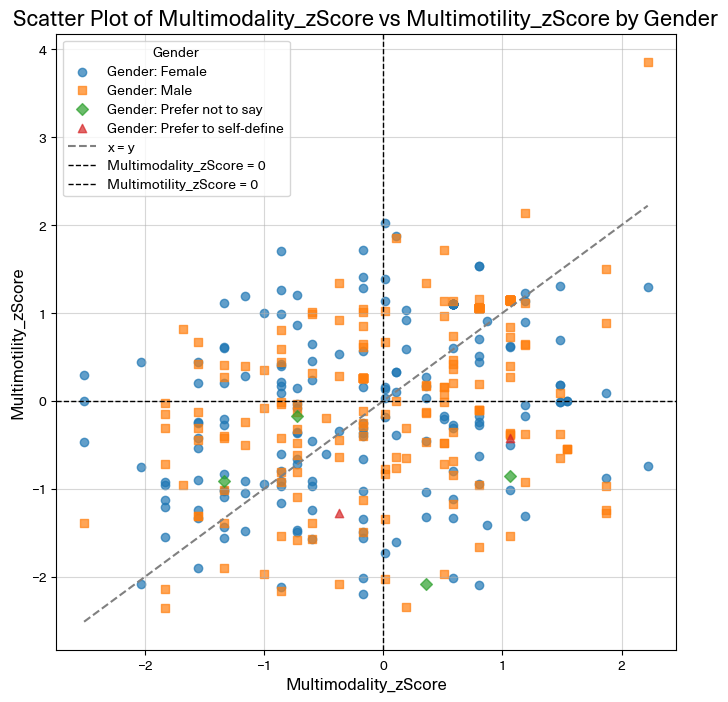

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure Gender is a categorical variable
merged_dataset['Gender'] = merged_dataset['Gender'].astype('category')

# Define unique colors and markers for each gender category
gender_colors = {'Female': '#1f77b4', 'Male': '#ff7f0e', 'Prefer not to say': '#2ca02c', 'Prefer to self-define': '#d62728', np.nan: '#7f7f7f'}
gender_markers = {'Female': 'o', 'Male': 's', 'Prefer not to say': 'D', 'Prefer to self-define': '^', np.nan: 'x'}

# Create the figure
plt.figure(figsize=(8, 8))

# Loop through each gender category and plot separately
for gender in merged_dataset['Gender'].unique():
    subset = merged_dataset[merged_dataset['Gender'] == gender]
    plt.scatter(
        subset['Multimodality_zScore'],
        subset['Multimotility_zScore'],
        color=gender_colors.get(gender, '#7f7f7f'),
        marker=gender_markers.get(gender, 'o'),
        label=f'Gender: {gender}',
        alpha=0.7
    )

# Add a line where x = y
x = np.linspace(min(merged_dataset['Multimodality_zScore']), max(merged_dataset['Multimodality_zScore']), 100)
plt.plot(x, x, color='gray', linestyle='--', label='x = y')  # Diagonal line

# Highlight the importance of zero by adding horizontal and vertical lines at 0
plt.axvline(0, color='black', linestyle='--', linewidth=1, label='Multimodality_zScore = 0')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Multimotility_zScore = 0')

# Add labels, title, and legend
plt.title('Scatter Plot of Multimodality_zScore vs Multimotility_zScore by Gender', fontsize=16)
plt.xlabel('Multimodality_zScore', fontsize=12)
plt.ylabel('Multimotility_zScore', fontsize=12)
plt.legend(title='Gender', fontsize=10)

# Add grid for better readability
plt.grid(alpha=0.5)

# Save the plot as a PDF
output_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\scatter_plot_by_gender.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


## 5.3 Transfer Time

In [111]:
# Select 'Response ID', 'distance', and 'CAP_Location' from merged_data
merged_subset = MMI[['Response ID', 'transfer']]

# Merge the selected columns into merged_dataset based on 'Response ID'
merged_dataset = merged_dataset.merge(merged_subset, on='Response ID', how='left')

# Display the updated merged_dataset
merged_dataset


Response ID  Multimodality_zScore  Multimotility_zScore Color  \
0     R_6JmlJEGCOWo9rTX              0.017263             -1.732001  blue   
1     R_61z5R1KEmMv8GGz             -0.170327             -2.018535  blue   
2     R_2QS9J3nCE9mYu8B              0.017263             -0.769720  blue   
3     R_2JlKjQUhcT7unUa             -0.374319             -2.078315  blue   
4     R_6IoBWPSrHaPVS7I              0.017263             -0.835328  blue   
...                 ...                   ...                   ...   ...   
1628  R_2sogfeczO00yYvM             -1.340959             -1.028991   red   
1629  R_81Af79F72aaAUsT              1.064749              0.267545  blue   
1630  R_82S6xK8Q8m0Ceye              0.017263              2.018871   red   
1631  R_27pz8nRKYyJZW8h              1.064749             -0.392679  blue   
1632  R_2q41Zzco1HRd92q              1.190272             -0.376574  blue   

               Category  Type    distance                   CAP_Location  \
0     Below Equilibrium  Blue   15.044886            In Lombardia Region   
1     Below Equilibrium  Blue   20.372493            In Lombardia Region   
2     Below Equilibrium  Blue    2.424350                       In Milan   
3     Below Equilibrium  Blue  117.914526    Outside of Lombardia Region   
4     Below Equilibrium  Blue    2.424350                       In Milan   
...                 ...   ...         ...                            ...   
1628  Above Equilibrium   Red    1.169644                       In Milan   
1629  Below Equilibrium  Blue   33.513502            In Lombardia Region   
1630  Above Equilibrium   Red    2.452124                       In Milan   
1631  Below Equilibrium  Blue   34.655301  In Metropolitan area of Milan   
1632  Below Equilibrium  Blue    9.237931                       In Milan   

      distance_class  CAP_Rank  Gender  transfer  
0                  2         3  Female       0.0  
1                  2         3  Female       0.0  
2                  1         1    Male       0.0  
3                  4         4    Male       0.0  
4                  1         1    Male       0.0  
...              ...       ...     ...       ...  
1628               1         1  Female      25.0  
1629               3         3    Male      20.0  
1630               1         1  Female      20.0  
1631               3         2    Male      15.0  
1632               1         1    Male       7.0  

[1633 rows x 12 columns]

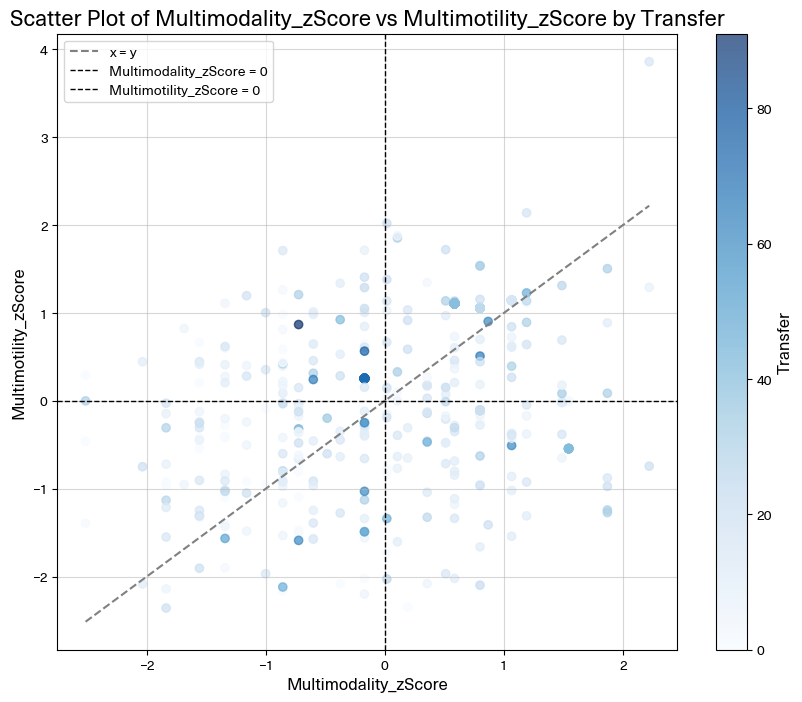

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure
plt.figure(figsize=(10, 8))

# Scatter plot of Multimodality_zScore vs Multimotility_zScore with color based on 'transfer'
scatter = plt.scatter(
    merged_dataset['Multimodality_zScore'],
    merged_dataset['Multimotility_zScore'],
    c=merged_dataset['transfer'],        # Color based on 'transfer'
    cmap='Blues',                        # Colormap for blue shades
    alpha=0.7
    # Removed edgecolor parameter to eliminate the stroke
)

# Add a color bar to indicate the transfer scale
cbar = plt.colorbar(scatter)
cbar.set_label('Transfer', fontsize=12)

# Add a line where x = y
x = np.linspace(min(merged_dataset['Multimodality_zScore']), max(merged_dataset['Multimodality_zScore']), 100)
plt.plot(x, x, color='gray', linestyle='--', label='x = y')  # Diagonal line

# Highlight the importance of zero by adding horizontal and vertical lines at 0
plt.axvline(0, color='black', linestyle='--', linewidth=1, label='Multimodality_zScore = 0')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Multimotility_zScore = 0')

# Add labels, title, and legend
plt.title('Scatter Plot of Multimodality_zScore vs Multimotility_zScore by Transfer', fontsize=16)
plt.xlabel('Multimodality_zScore', fontsize=12)
plt.ylabel('Multimotility_zScore', fontsize=12)
plt.legend()

# Add grid for better readability
plt.grid(alpha=0.5)

# Save the plot as a PDF
plt.savefig('scatter_plot_transfer_colored.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


## 5.4 Age

In [114]:
# Drop duplicates in filtered_data based on 'Response ID'
filtered_subset = filtered_data[['Response ID', 'How old are you? - years',
                                 'In one word, describe the walking path you take to the work / university / school / other?  (e.g., stressful, enjoyable, busy....)','How many minutes does it take your trip from Home to School / University / Work / Other?  And, how many minutes do you spend to transfer (walk and wait)  during your trip from Home to School / University / Work / Other? - Total trip time in minutes']].drop_duplicates(subset='Response ID')

# Drop duplicates in merged_dataset based on 'Response ID'
merged_dataset = merged_dataset.drop_duplicates(subset='Response ID')

# Merge the deduplicated filtered_subset into merged_dataset
merged_dataset = merged_dataset.merge(filtered_subset, on='Response ID', how='left')

In [115]:
# Rename the specified columns
merged_dataset = merged_dataset.rename(columns={
    'How old are you? - years': 'Age',
    'How many minutes does it take your trip from Home to School / University / Work / Other?  And, how many minutes do you spend to transfer (walk and wait)  during your trip from Home to School / University / Work / Other? - Total trip time in minutes':'travel_time',
    'In one word, describe the walking path you take to the work / university / school / other?  (e.g., stressful, enjoyable, busy....)': 'last_mile_impression'
})

In [116]:
merged_dataset

Response ID  Multimodality_zScore  Multimotility_zScore Color  \
0    R_6JmlJEGCOWo9rTX              0.017263             -1.732001  blue   
1    R_61z5R1KEmMv8GGz             -0.170327             -2.018535  blue   
2    R_2QS9J3nCE9mYu8B              0.017263             -0.769720  blue   
3    R_2JlKjQUhcT7unUa             -0.374319             -2.078315  blue   
4    R_6IoBWPSrHaPVS7I              0.017263             -0.835328  blue   
..                 ...                   ...                   ...   ...   
303  R_2sogfeczO00yYvM             -1.340959             -1.028991   red   
304  R_81Af79F72aaAUsT              1.064749              0.267545  blue   
305  R_82S6xK8Q8m0Ceye              0.017263              2.018871   red   
306  R_27pz8nRKYyJZW8h              1.064749             -0.392679  blue   
307  R_2q41Zzco1HRd92q              1.190272             -0.376574  blue   

              Category  Type    distance                   CAP_Location  \
0    Below Equilibrium  Blue   15.044886            In Lombardia Region   
1    Below Equilibrium  Blue   20.372493            In Lombardia Region   
2    Below Equilibrium  Blue    2.424350                       In Milan   
3    Below Equilibrium  Blue  117.914526    Outside of Lombardia Region   
4    Below Equilibrium  Blue    2.424350                       In Milan   
..                 ...   ...         ...                            ...   
303  Above Equilibrium   Red    1.169644                       In Milan   
304  Below Equilibrium  Blue   33.513502            In Lombardia Region   
305  Above Equilibrium   Red    2.452124                       In Milan   
306  Below Equilibrium  Blue   34.655301  In Metropolitan area of Milan   
307  Below Equilibrium  Blue    9.237931                       In Milan   

     distance_class  CAP_Rank  Gender  transfer   Age  \
0                 2         3  Female       0.0   NaN   
1                 2         3  Female       0.0   NaN   
2                 1         1    Male       0.0   NaN   
3                 4         4    Male       0.0   NaN   
4                 1         1    Male       0.0   NaN   
..              ...       ...     ...       ...   ...   
303               1         1  Female      25.0  22.0   
304               3         3    Male      20.0  23.0   
305               1         1  Female      20.0  24.0   
306               3         2    Male      15.0  24.0   
307               1         1    Male       7.0  24.0   

                                  last_mile_impression  travel_time  
0                                                  NaN          NaN  
1                                                  NaN          NaN  
2                                                  NaN          NaN  
3                                                  NaN          NaN  
4                                                  NaN          NaN  
..                                                 ...          ...  
303                                          Piacevole         20.0  
304  Tedious but obligatory to reach a pleasant des...         70.0  
305                                              dirty         30.0  
306                                              Lungo         90.0  
307                                              Lungo         52.0  

[308 rows x 15 columns]

### 5.4.1 Linear Age 

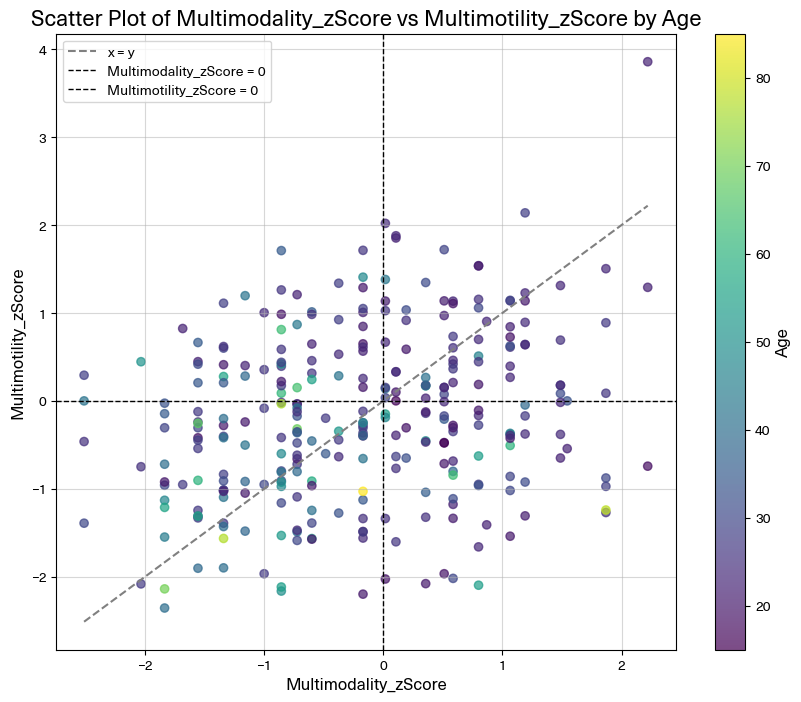

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'Age' is numeric (convert if necessary)
merged_dataset['Age'] = pd.to_numeric(merged_dataset['Age'], errors='coerce')

# Create the figure
plt.figure(figsize=(10, 8))

# Scatter plot of Multimodality_zScore vs Multimotility_zScore with color based on 'Age'
scatter = plt.scatter(
    merged_dataset['Multimodality_zScore'],
    merged_dataset['Multimotility_zScore'],
    c=merged_dataset['Age'],        # Color based on 'Age'
    cmap='viridis',                 # Colormap for better age visualization
    alpha=0.7
    # Removed edgecolor parameter to eliminate the stroke
)

# Add a color bar to indicate the age scale
cbar = plt.colorbar(scatter)
cbar.set_label('Age', fontsize=12)

# Add a line where x = y
x = np.linspace(min(merged_dataset['Multimodality_zScore']), max(merged_dataset['Multimodality_zScore']), 100)
plt.plot(x, x, color='gray', linestyle='--', label='x = y')  # Diagonal line

# Highlight the importance of zero by adding horizontal and vertical lines at 0
plt.axvline(0, color='black', linestyle='--', linewidth=1, label='Multimodality_zScore = 0')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Multimotility_zScore = 0')

# Add labels, title, and legend
plt.title('Scatter Plot of Multimodality_zScore vs Multimotility_zScore by Age', fontsize=16)
plt.xlabel('Multimodality_zScore', fontsize=12)
plt.ylabel('Multimotility_zScore', fontsize=12)
plt.legend()

# Add grid for better readability
plt.grid(alpha=0.5)

# Save the plot as a PDF
plt.savefig('scatter_plot_age_colored.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


### 5.4.2 Categorgized Age

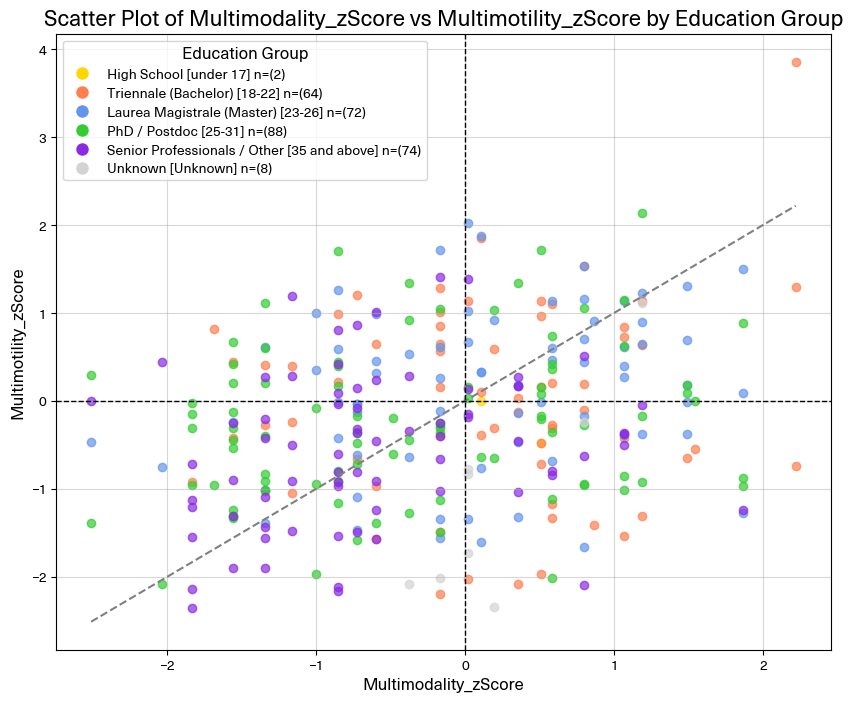

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'Age' is numeric (convert if necessary)
merged_dataset['Age'] = pd.to_numeric(merged_dataset['Age'], errors='coerce')

# Define a function to categorize ages into education groups
def categorize_age(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 18:
        return 'High School'
    elif 18 <= age <= 22:
        return 'Triennale (Bachelor)'
    elif 23 <= age <= 26:
        return 'Laurea Magistrale (Master)'
    elif 27 <= age <= 35:
        return 'PhD / Postdoc'
    else:
        return 'Senior Professionals / Other'

# Apply the function to create the 'Education_Group' column
merged_dataset['Education_Group'] = merged_dataset['Age'].apply(categorize_age)

# Count the number of occurrences in each group
group_counts = merged_dataset['Education_Group'].value_counts().to_dict()

# Create a color mapping for each education group
education_color_mapping = {
    'High School': '#FFD700',                    # Gold
    'Triennale (Bachelor)': '#FF7F50',           # Coral
    'Laurea Magistrale (Master)': '#6495ED',     # Cornflower Blue
    'PhD / Postdoc': '#32CD32',                  # Lime Green
    'Senior Professionals / Other': '#8A2BE2',   # Blue Violet
    'Unknown': '#D3D3D3'                         # Light Gray for unknowns
}

# Define age ranges for each group for the legend
education_age_ranges = {
    'High School': 'under 17',
    'Triennale (Bachelor)': '18-22',
    'Laurea Magistrale (Master)': '23-26',
    'PhD / Postdoc': '25-31',
    'Senior Professionals / Other': '35 and above',
    'Unknown': 'Unknown'
}

# Create the figure
plt.figure(figsize=(10, 8))

# Scatter plot of Multimodality_zScore vs Multimotility_zScore with colors based on education groups
legend_patches = []
for group, color in education_color_mapping.items():
    subset = merged_dataset[merged_dataset['Education_Group'] == group]
    count = group_counts.get(group, 0)
    age_range = education_age_ranges[group]
    plt.scatter(subset['Multimodality_zScore'], subset['Multimotility_zScore'], c=color, label=f'{group} [{age_range}] n=({count})', alpha=0.7)
    legend_patches.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'{group} [{age_range}] n=({count})'))

# Add a line where x = y
x = np.linspace(min(merged_dataset['Multimodality_zScore']), max(merged_dataset['Multimodality_zScore']), 100)
plt.plot(x, x, color='gray', linestyle='--', label='x = y')

# Highlight the importance of zero by adding horizontal and vertical lines at 0
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Add labels, title, and legend
plt.title('Scatter Plot of Multimodality_zScore vs Multimotility_zScore by Education Group', fontsize=16)
plt.xlabel('Multimodality_zScore', fontsize=12)
plt.ylabel('Multimotility_zScore', fontsize=12)
plt.legend(handles=legend_patches, title='Education Group', loc='upper left', fontsize=10, title_fontsize=12)

# Add grid for better readability
plt.grid(alpha=0.5)

# Save the plot as a PDF
plt.savefig('scatter_plot_education_groups_with_counts.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


# 5.5 Impressions

C:\Users\mafgo\AppData\Local\Temp\ipykernel_12872\1221901579.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['short_impression'] = filtered_dataset['last_mile_impression'].apply(lambda x: str(x).split()[0])


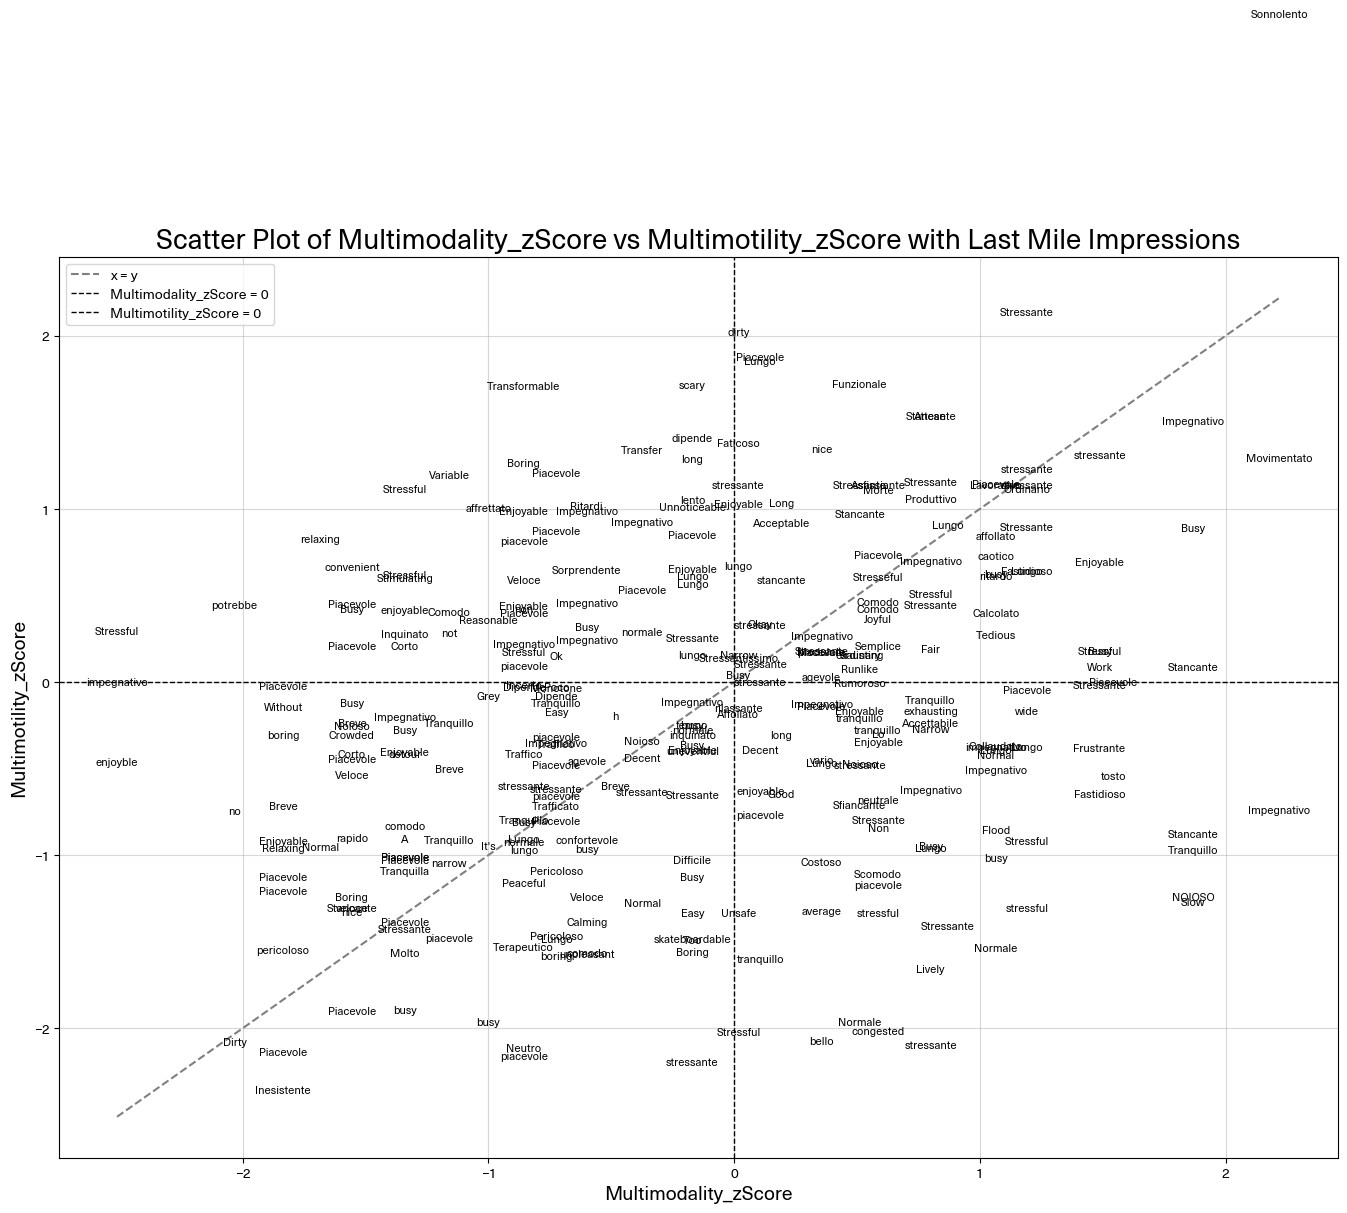

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Replace infinite values with NaN in the relevant columns
merged_dataset[['Multimodality_zScore', 'Multimotility_zScore', 'last_mile_impression']] = merged_dataset[
    ['Multimodality_zScore', 'Multimotility_zScore', 'last_mile_impression']
].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN in the relevant columns
filtered_dataset = merged_dataset.dropna(subset=['Multimodality_zScore', 'Multimotility_zScore', 'last_mile_impression'])

# Limit the impressions to one word
filtered_dataset['short_impression'] = filtered_dataset['last_mile_impression'].apply(lambda x: str(x).split()[0])

# Create the figure sized for A3 paper (landscape orientation)
plt.figure(figsize=(16.5, 11.7))  # A3 size in inches (420mm x 297mm)

# Plot each point with the 'short_impression' as text
for i, row in filtered_dataset.iterrows():
    plt.text(
        row['Multimodality_zScore'], 
        row['Multimotility_zScore'], 
        row['short_impression'], 
        fontsize=8,          # Smaller font size for clarity
        ha='center', 
        va='center'
    )

# Add a line where x = y
x = np.linspace(min(filtered_dataset['Multimodality_zScore']), max(filtered_dataset['Multimodality_zScore']), 100)
plt.plot(x, x, color='gray', linestyle='--', label='x = y')  # Diagonal line

# Highlight the importance of zero by adding horizontal and vertical lines at 0
plt.axvline(0, color='black', linestyle='--', linewidth=1, label='Multimodality_zScore = 0')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Multimotility_zScore = 0')

# Add labels, title, and legend
plt.title('Scatter Plot of Multimodality_zScore vs Multimotility_zScore with Last Mile Impressions', fontsize=20)
plt.xlabel('Multimodality_zScore', fontsize=14)
plt.ylabel('Multimotility_zScore', fontsize=14)
plt.legend()

# Add grid for better readability
plt.grid(alpha=0.5)

# Save the plot as a PDF in A3 size
plt.savefig('scatter_plot_last_mile_impressions_A3.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [123]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Response ID           308 non-null    object  
 1   Multimodality_zScore  308 non-null    float64 
 2   Multimotility_zScore  308 non-null    float64 
 3   Color                 308 non-null    object  
 4   Category              308 non-null    object  
 5   Type                  308 non-null    object  
 6   distance              308 non-null    float64 
 7   CAP_Location          308 non-null    object  
 8   distance_class        308 non-null    int64   
 9   CAP_Rank              308 non-null    int64   
 10  Gender                308 non-null    category
 11  transfer              308 non-null    float64 
 12  Age                   300 non-null    float64 
 13  last_mile_impression  301 non-null    object  
 14  travel_time           302 non-null    float64 
 15  Educat

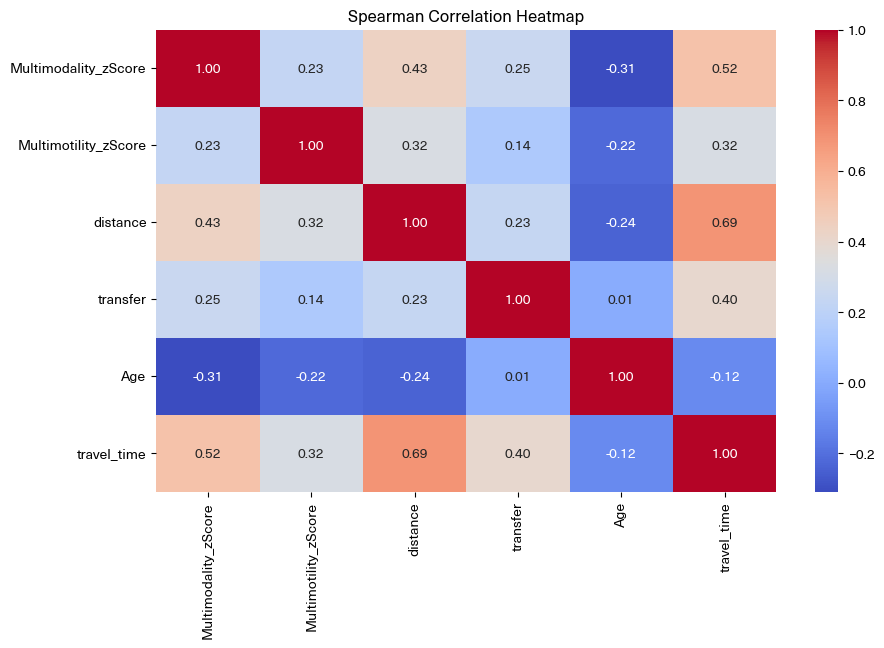

In [124]:
# Extract only the float columns
float_columns = merged_dataset.select_dtypes(include='float64')

# Pearson Correlation
#pearson_corr = float_columns.corr(method='pearson')

# Spearman Correlation
spearman_corr = float_columns.corr(method='spearman')

# Plot Pearson Correlation Heatmap
#plt.figure(figsize=(10, 6))
#sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title("Pearson Correlation Heatmap")
#plt.show()

# Plot Spearman Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()


In [125]:
from langdetect import detect, DetectorFactory

# Ensure consistent results from langdetect
DetectorFactory.seed = 0

# Function to detect language (assumes only Italian or English)
def detect_language(text):
    try:
        lang = detect(text)
        return 'Italian' if lang == 'it' else 'English'
    except:
        return 'Unknown'

# Apply language detection to the 'last_mile_impression' column
merged_dataset['language_label'] = merged_dataset['last_mile_impression'].apply(detect_language)

# Save the labeled dataset to your preferred path
output_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\last_mile_impression_labeled.csv"
merged_dataset.to_csv(output_path, index=False)

print(f"Data labeled successfully and saved to: {output_path}")


Data labeled successfully and saved to: D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\last_mile_impression_labeled.csv


In [126]:
dict_path=r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impression-dict.csv"
# Load the second dataset (CSV file)
dict_df = pd.read_csv(dict_path, encoding='Windows-1252')
dict_df

Response ID  Multimodality_zScore  Multimotility_zScore  \
0    R_6JmlJEGCOWo9rTX              0.017263             -1.732001   
1    R_61z5R1KEmMv8GGz             -0.170327             -2.018535   
2    R_2QS9J3nCE9mYu8B              0.017263             -0.769720   
3    R_2JlKjQUhcT7unUa             -0.374319             -2.078315   
4    R_6IoBWPSrHaPVS7I              0.017263             -0.835328   
..                 ...                   ...                   ...   
303  R_2sogfeczO00yYvM             -1.340959             -1.028991   
304  R_81Af79F72aaAUsT              1.064749              0.267545   
305  R_82S6xK8Q8m0Ceye              0.017263              2.018871   
306  R_27pz8nRKYyJZW8h              1.064749             -0.392679   
307  R_2q41Zzco1HRd92q              1.190272             -0.376574   

       distance                   CAP_Location  distance_class  CAP_Rank  \
0     15.044886            In Lombardia Region               2         3   
1     20.372493            In Lombardia Region               2         3   
2      2.424350                       In Milan               1         1   
3    117.914526    Outside of Lombardia Region               4         4   
4      2.424350                       In Milan               1         1   
..          ...                            ...             ...       ...   
303    1.169644                       In Milan               1         1   
304   33.513502            In Lombardia Region               3         3   
305    2.452124                       In Milan               1         1   
306   34.655301  In Metropolitan area of Milan               3         2   
307    9.237931                       In Milan               1         1   

     transfer   Age  Unnamed: 9  travel_time             Education_Group  \
0           0   NaN         NaN          NaN                     Unknown   
1           0   NaN         NaN          NaN                     Unknown   
2           0   NaN         NaN          NaN                     Unknown   
3           0   NaN         NaN          NaN                     Unknown   
4           0   NaN         NaN          NaN                     Unknown   
..        ...   ...         ...          ...                         ...   
303        25  22.0         NaN         20.0        Triennale (Bachelor)   
304        20  23.0         NaN         70.0  Laurea Magistrale (Master)   
305        20  24.0         NaN         30.0  Laurea Magistrale (Master)   
306        15  24.0         NaN         90.0  Laurea Magistrale (Master)   
307         7  24.0         NaN         52.0  Laurea Magistrale (Master)   

    language_label                               last_mile_impression  \
0          Unknown                                                NaN   
1          Unknown                                                NaN   
2          Unknown                                                NaN   
3          Unknown                                                NaN   
4          Unknown                                                NaN   
..             ...                                                ...   
303        Italian                                          Piacevole   
304        English  Tedious but obligatory to reach a pleasant des...   
305        English                                              dirty   
306        English                                              Lungo   
307        English                                              Lungo   

    impression  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
..         ...  
303   Pleasant  
304     Boring  
305      Dirty  
306       Long  
307       Long  

[308 rows x 15 columns]

In [127]:
# Merge 'impression' from dict_df into merged_dataset based on 'Response ID'
merged_dataset = merged_dataset.merge(
    dict_df[['Response ID', 'impression']],
    on='Response ID',
    how='left'
)

In [128]:
merged_dataset

Response ID  Multimodality_zScore  Multimotility_zScore Color  \
0    R_6JmlJEGCOWo9rTX              0.017263             -1.732001  blue   
1    R_61z5R1KEmMv8GGz             -0.170327             -2.018535  blue   
2    R_2QS9J3nCE9mYu8B              0.017263             -0.769720  blue   
3    R_2JlKjQUhcT7unUa             -0.374319             -2.078315  blue   
4    R_6IoBWPSrHaPVS7I              0.017263             -0.835328  blue   
..                 ...                   ...                   ...   ...   
303  R_2sogfeczO00yYvM             -1.340959             -1.028991   red   
304  R_81Af79F72aaAUsT              1.064749              0.267545  blue   
305  R_82S6xK8Q8m0Ceye              0.017263              2.018871   red   
306  R_27pz8nRKYyJZW8h              1.064749             -0.392679  blue   
307  R_2q41Zzco1HRd92q              1.190272             -0.376574  blue   

              Category  Type    distance                   CAP_Location  \
0    Below Equilibrium  Blue   15.044886            In Lombardia Region   
1    Below Equilibrium  Blue   20.372493            In Lombardia Region   
2    Below Equilibrium  Blue    2.424350                       In Milan   
3    Below Equilibrium  Blue  117.914526    Outside of Lombardia Region   
4    Below Equilibrium  Blue    2.424350                       In Milan   
..                 ...   ...         ...                            ...   
303  Above Equilibrium   Red    1.169644                       In Milan   
304  Below Equilibrium  Blue   33.513502            In Lombardia Region   
305  Above Equilibrium   Red    2.452124                       In Milan   
306  Below Equilibrium  Blue   34.655301  In Metropolitan area of Milan   
307  Below Equilibrium  Blue    9.237931                       In Milan   

     distance_class  CAP_Rank  Gender  transfer   Age  \
0                 2         3  Female       0.0   NaN   
1                 2         3  Female       0.0   NaN   
2                 1         1    Male       0.0   NaN   
3                 4         4    Male       0.0   NaN   
4                 1         1    Male       0.0   NaN   
..              ...       ...     ...       ...   ...   
303               1         1  Female      25.0  22.0   
304               3         3    Male      20.0  23.0   
305               1         1  Female      20.0  24.0   
306               3         2    Male      15.0  24.0   
307               1         1    Male       7.0  24.0   

                                  last_mile_impression  travel_time  \
0                                                  NaN          NaN   
1                                                  NaN          NaN   
2                                                  NaN          NaN   
3                                                  NaN          NaN   
4                                                  NaN          NaN   
..                                                 ...          ...   
303                                          Piacevole         20.0   
304  Tedious but obligatory to reach a pleasant des...         70.0   
305                                              dirty         30.0   
306                                              Lungo         90.0   
307                                              Lungo         52.0   

                Education_Group language_label impression  
0                       Unknown        Unknown        NaN  
1                       Unknown        Unknown        NaN  
2                       Unknown        Unknown        NaN  
3                       Unknown        Unknown        NaN  
4                       Unknown        Unknown        NaN  
..                          ...            ...        ...  
303        Triennale (Bachelor)        Italian   Pleasant  
304  Laurea Magistrale (Master)        English     Boring  
305  Laurea Magistrale (Master)        English      Dirty  
306  Laurea Magistrale (Master)        English       Long  

C:\Users\mafgo\AppData\Local\Temp\ipykernel_12872\2544562750.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_dataset[['Multimodality_zScore', 'Multimotility_zScore']].applymap(np.isfinite).all(axis=1)


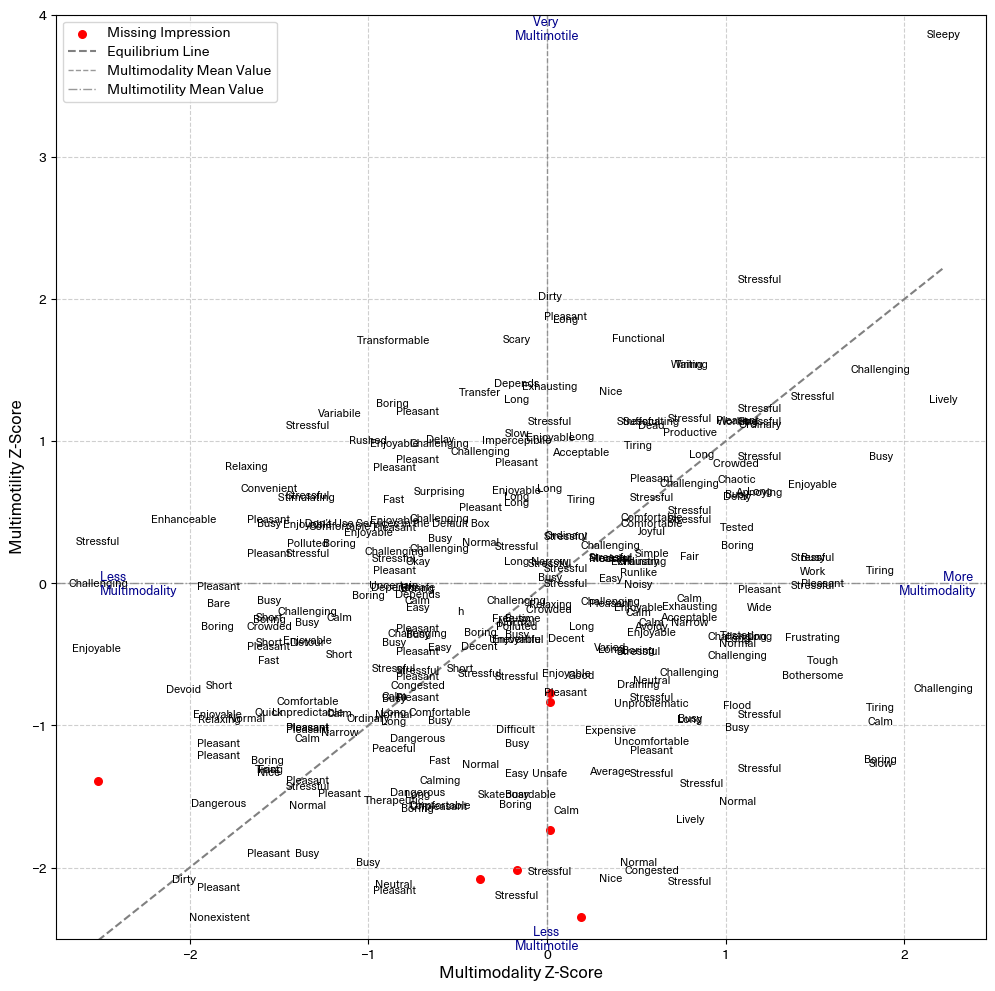

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

# Define the output path
output_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions_a3.pdf"

# Set the font to Neue Haas Unica
mpl.rcParams['font.family'] = 'Neue Haas Unica'

# Filter out rows with NaN or infinite values in the coordinates
filtered_dataset = merged_dataset[
    merged_dataset[['Multimodality_zScore', 'Multimotility_zScore']].applymap(np.isfinite).all(axis=1)
]

# Scatter plot with text labels
plt.figure(figsize=(12, 12))

# Plot rows with valid impressions as text labels
for _, row in filtered_dataset[filtered_dataset['impression'].notnull()].iterrows():
    plt.text(
        row['Multimodality_zScore'],
        row['Multimotility_zScore'],
        str(row['impression']),
        fontsize=8,
        ha='center',
        va='center'
    )

# Plot rows with missing impressions as points
plt.scatter(
    filtered_dataset.loc[filtered_dataset['impression'].isnull(), 'Multimodality_zScore'],
    filtered_dataset.loc[filtered_dataset['impression'].isnull(), 'Multimotility_zScore'],
    color='red',
    marker='o',
    s=30,
    label='Missing Impression'
)

# Add annotations
plt.text(2.4, 0, 'More \nMultimodality', fontsize=9, color='darkblue', ha='right', va='center')
plt.text(-2.5, 0, 'Less \nMultimodality', fontsize=9, color='darkblue', ha='left', va='center')
plt.text(0, 3.9, 'Very \nMultimotile', fontsize=9, color='darkblue', ha='center', va='center')
plt.text(0, -2.5, 'Less \nMultimotile', fontsize=9, color='darkblue', ha='center', va='center')

# Add axis labels
plt.xlabel('Multimodality Z-Score', fontsize=12)
plt.ylabel('Multimotility Z-Score', fontsize=12)

# Add a line where x = y
x = np.linspace(min(filtered_dataset['Multimodality_zScore']), max(filtered_dataset['Multimodality_zScore']), 100)
plt.plot(x, x, color='gray', linestyle='--', label='Equilibrium Line')  # Diagonal line

# Highlight the importance of zero by adding horizontal and vertical lines at 0
plt.axvline(0, color='gray', linestyle='--', alpha=0.8, linewidth=1, label='Multimodality Mean Value')
plt.axhline(0, color='gray', linestyle='-.', linewidth=1, alpha=0.8, label='Multimotility Mean Value')

# Add a legend
plt.legend(loc='upper left')

# Customize grid
plt.grid(True, linestyle='--', alpha=0.6)

# Set y-axis limits to ensure all points are visible
plt.ylim(-2.5, 4)

# Save the figure
plt.savefig(output_path, format='pdf', bbox_inches='tight')

# Show the figure
plt.show()

C:\Users\mafgo\AppData\Local\Temp\ipykernel_12872\1890862961.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_dataset[['Multimodality_zScore', 'Multimotility_zScore']].applymap(np.isfinite).all(axis=1)
C:\Users\mafgo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mafgo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mafgo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunk

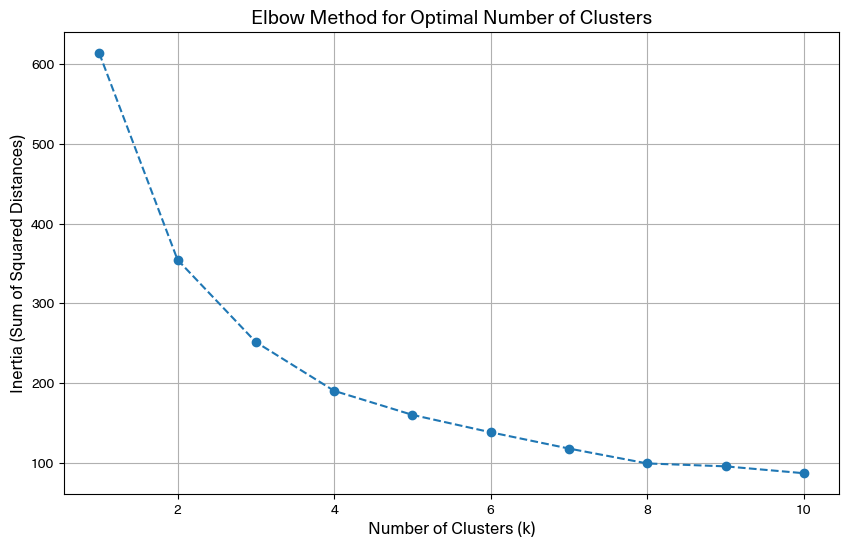

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from sklearn.cluster import KMeans

# Define the output path
output_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\elbow_analysis.pdf"

# Set the font to Neue Haas Unica
mpl.rcParams['font.family'] = 'Neue Haas Unica'

# Filter out rows with NaN or infinite values in the coordinates
filtered_dataset = merged_dataset[
    merged_dataset[['Multimodality_zScore', 'Multimotility_zScore']].applymap(np.isfinite).all(axis=1)
]

# Extract the coordinates for clustering
X = filtered_dataset[['Multimodality_zScore', 'Multimotility_zScore']].values

# Perform Elbow Analysis for K-Means Clustering
inertia = []
cluster_range = range(1, 11)  # Testing from 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=12)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig(output_path, format='pdf', bbox_inches='tight')

# Show the figure
plt.show()


C:\Users\mafgo\AppData\Local\Temp\ipykernel_12872\2723491349.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_dataset[['Multimodality_zScore', 'Multimotility_zScore']].applymap(np.isfinite).all(axis=1)
C:\Users\mafgo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


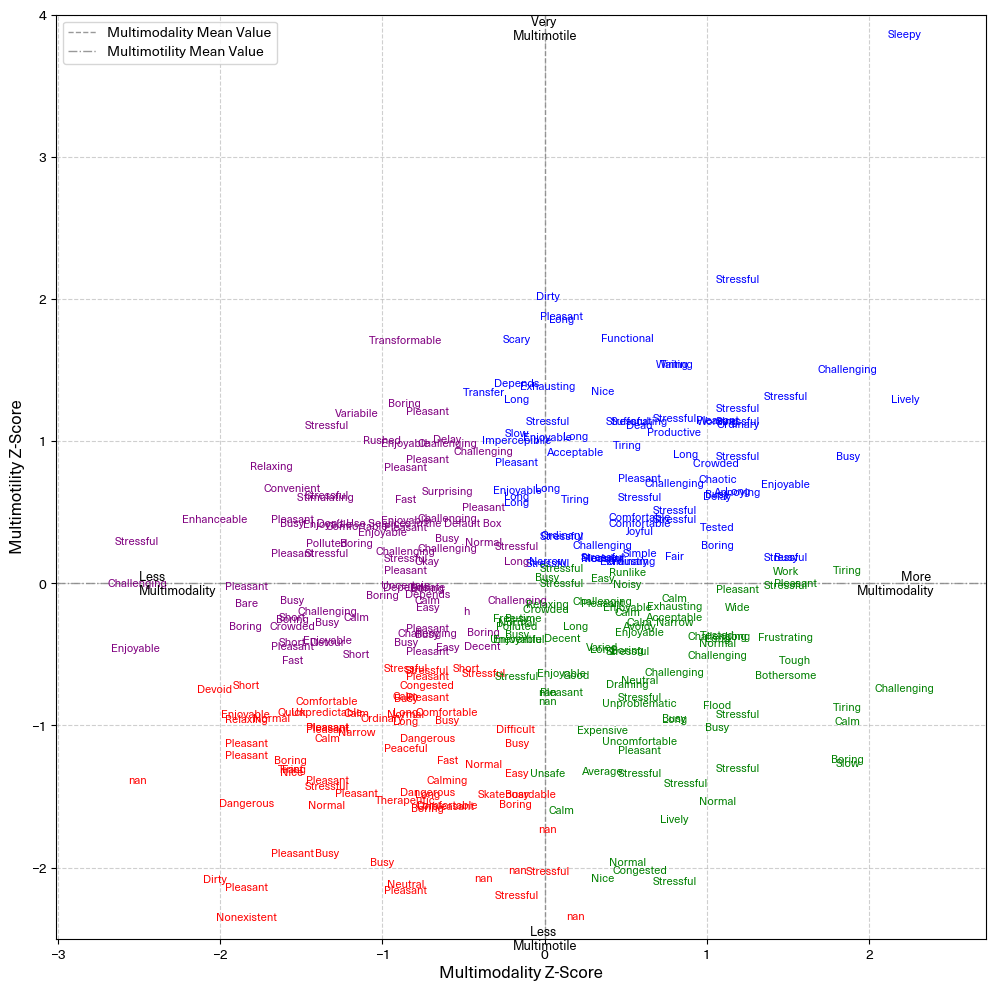

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from sklearn.cluster import KMeans

# Define the output path
output_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\clustered_coloured_4-impressions.pdf"

# Set the font to Neue Haas Unica
mpl.rcParams['font.family'] = 'Neue Haas Unica'

# Filter out rows with NaN or infinite values in the coordinates
filtered_dataset = merged_dataset[
    merged_dataset[['Multimodality_zScore', 'Multimotility_zScore']].applymap(np.isfinite).all(axis=1)
]

# Extract the coordinates for clustering
X = filtered_dataset[['Multimodality_zScore', 'Multimotility_zScore']].values

# Perform K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
filtered_dataset['Cluster'] = kmeans.fit_predict(X)

# Define a colormap for the clusters
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}

# Plot with text labels colored by their cluster
plt.figure(figsize=(12, 12))

# Plot each row with the corresponding cluster color as text labels
for _, row in filtered_dataset.iterrows():
    plt.text(
        row['Multimodality_zScore'],
        row['Multimotility_zScore'],
        str(row['impression']),
        fontsize=8,
        color=cluster_colors[row['Cluster']],
        ha='center',
        va='center'
    )

# Add annotations
plt.text(2.4, 0, 'More \nMultimodality', fontsize=9, color='black', ha='right', va='center')
plt.text(-2.5, 0, 'Less \nMultimodality', fontsize=9, color='black', ha='left', va='center')
plt.text(0, 3.9, 'Very \nMultimotile', fontsize=9, color='black', ha='center', va='center')
plt.text(0, -2.5, 'Less \nMultimotile', fontsize=9, color='black', ha='center', va='center')

# Add axis labels
plt.xlabel('Multimodality Z-Score', fontsize=12)
plt.ylabel('Multimotility Z-Score', fontsize=12)

# Highlight the importance of zero by adding horizontal and vertical lines at 0
plt.axvline(0, color='gray', linestyle='--', alpha=0.8, linewidth=1, label='Multimodality Mean Value')
plt.axhline(0, color='gray', linestyle='-.', linewidth=1, alpha=0.8, label='Multimotility Mean Value')

# Add a legend
plt.legend(loc='upper left')

# Customize grid
plt.grid(True, linestyle='--', alpha=0.6)

# Set dynamic x-axis limits based on the data range
plt.xlim(filtered_dataset['Multimodality_zScore'].min() - 0.5, filtered_dataset['Multimodality_zScore'].max() + 0.5)

# Set y-axis limits to ensure all points are visible
plt.ylim(-2.5, 4)

# Save the figure
plt.savefig(output_path, format='pdf', bbox_inches='tight')

# Show the figure
plt.show()


In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from sklearn.cluster import KMeans
from PyPDF2 import PdfMerger
import os

# Define the output path
output_base_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions"
output_combined_path = os.path.join(output_base_path, "impressions_combined.pdf")

# Set the font to Neue Haas Unica
mpl.rcParams['font.family'] = 'Neue Haas Unica'

# Filter out rows with NaN or infinite values in the coordinates
filtered_dataset = merged_dataset[
    merged_dataset[['Multimodality_zScore', 'Multimotility_zScore']].applymap(np.isfinite).all(axis=1)
]

# Updated categories of impressions with assigned colors
categories = {
    "Positive Responses": (
        "Nice", "Pleasant", "Comfortable", "Enjoyable", "Fair", "Productive", "Convenient", "Stimulating", "Calming", "Easy"
    ),
    "Negative Responses": (
        "Stressful", "Boring", "Unsafe", "Tiring", "Expensive", "Noisy", "Impercepibile", "Scary", "Bare", "Uncomfortable", "Uneventful"
    ),
    "Neutral Responses": (
        "Ordinary", "Normal", "Acceptable"
    ),
    "Spatial Descriptors": (
        "Long", "Short", "Narrow"
    ),
    "Challenging Experiences": (
        "Challenging", "Difficult", "Delay", "Draining"
    ),
    "Temporal Descriptors": (
        "Fast", "Slow", "Delay"
    ),
    "Unique Responses": (
        "Transformable", "Skateboardable", "Avoidy", "Variabile", "Unpredictable", "Surprising", "Therapeutic", "Working", "Runlike"
    )
}

# Define colors for each category
category_colors = {
    "Positive Responses": "green",
    "Negative Responses": "red",
    "Neutral Responses": "blue",
    "Spatial Descriptors": "purple",
    "Challenging Experiences": "orange",
    "Temporal Descriptors": "brown",
    "Unique Responses": "magenta"
}

# Function to create a plot for a given category
def plot_category(category_name, impressions, color, output_path):
    plt.figure(figsize=(12, 12))
    
    # Plot all points as gray dots
    plt.scatter(
        filtered_dataset['Multimodality_zScore'],
        filtered_dataset['Multimotility_zScore'],
        color='gray',
        alpha=0.5,
        marker='o',
        s=30
    )
    
    # Plot the words for the selected category
    for _, row in filtered_dataset.iterrows():
        if row['impression'] in impressions:
            plt.text(
                row['Multimodality_zScore'],
                row['Multimotility_zScore'],
                str(row['impression']),
                fontsize=8,
                color=color,
                ha='center',
                va='center'
            )
    
    # Add annotations
    plt.text(2.4, 0, 'More \nMultimodality', fontsize=9, color='black', ha='right', va='center')
    plt.text(-2.5, 0, 'Less \nMultimodality', fontsize=9, color='black', ha='left', va='center')
    plt.text(0, 3.9, 'Very \nMultimotile', fontsize=9, color='black', ha='center', va='center')
    plt.text(0, -2.5, 'Less \nMultimotile', fontsize=9, color='black', ha='center', va='center')
    
    # Add axis labels
    plt.xlabel('Multimodality Z-Score', fontsize=12)
    plt.ylabel('Multimotility Z-Score', fontsize=12)
    
    # Highlight the importance of zero by adding horizontal and vertical lines at 0
    plt.axvline(0, color='gray', linestyle='--', alpha=0.8, linewidth=1)
    plt.axhline(0, color='gray', linestyle='-.', linewidth=1, alpha=0.8)
    
    # Customize grid
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Set dynamic x and y axis limits
    plt.xlim(filtered_dataset['Multimodality_zScore'].min() - 0.5, filtered_dataset['Multimodality_zScore'].max() + 0.5)
    plt.ylim(-2.5, 4)
    
    # Add a title
    plt.title(f"{category_name}", fontsize=14)
    
    # Save the figure
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    
    # Close the plot
    plt.close()

# Generate and save a plot for each category
pdf_files = []
for category_name, impressions in categories.items():
    output_path = os.path.join(output_base_path, f"{category_name.replace(' ', '_').lower()}.pdf")
    plot_category(category_name, impressions, category_colors[category_name], output_path)
    pdf_files.append(output_path)

# Merge all the category PDFs into one combined PDF
merger = PdfMerger()
for pdf in pdf_files:
    merger.append(pdf)

merger.write(output_combined_path)
merger.close()

print(f"All category PDFs have been merged into {output_combined_path}")


C:\Users\mafgo\AppData\Local\Temp\ipykernel_12872\2298930318.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_dataset[['Multimodality_zScore', 'Multimotility_zScore']].applymap(np.isfinite).all(axis=1)


All category PDFs have been merged into D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions\impressions_combined.pdf


In [133]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from sklearn.cluster import KMeans
from PyPDF2 import PdfMerger
import os
import random

# Define the output path
output_base_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions"
output_combined_path = os.path.join(output_base_path, "impressions_combined.pdf")

# Set the font to Neue Haas Unica
mpl.rcParams['font.family'] = 'Neue Haas Unica'

# Filter out rows with NaN or infinite values in the coordinates
filtered_dataset = merged_dataset[
    merged_dataset[['Multimodality_zScore', 'Multimotility_zScore']].applymap(np.isfinite).all(axis=1)
]

# Add a 'quartile' column based on the (0, 0) point
def assign_quartile(row):
    if row['Multimodality_zScore'] < 0 and row['Multimotility_zScore'] > 0:
        return 'Q1'
    elif row['Multimodality_zScore'] > 0 and row['Multimotility_zScore'] > 0:
        return 'Q2'
    elif row['Multimodality_zScore'] > 0 and row['Multimotility_zScore'] < 0:
        return 'Q3'
    elif row['Multimodality_zScore'] < 0 and row['Multimotility_zScore'] < 0:
        return 'Q4'
    else:
        return 'On Axis'

filtered_dataset['quartile'] = filtered_dataset.apply(assign_quartile, axis=1)

# Updated categories of impressions
categories = {
    "Positive Responses": (
        "Nice", "Pleasant", "Comfortable", "Enjoyable", "Fair", "Productive", "Convenient", "Stimulating", "Calming", "Easy"
    ),
    "Negative Responses": (
        "Stressful", "Boring", "Unsafe", "Tiring", "Expensive", "Noisy", "Impercepibile", "Scary", "Bare", "Uncomfortable", "Uneventful"
    ),
    "Neutral Responses": (
        "Ordinary", "Normal", "Acceptable"
    ),
    "Spatial Descriptors": (
        "Long", "Short", "Narrow"
    ),
    "Challenging Experiences": (
        "Challenging", "Difficult", "Delay", "Draining"
    ),
    "Temporal Descriptors": (
        "Fast", "Slow", "Delay"
    ),
    "Unique Responses": (
        "Transformable", "Skateboardable", "Avoidy", "Variabile", "Unpredictable", "Surprising", "Therapeutic", "Working", "Runlike"
    )
}

# Function to generate a random color
def random_color():
    return "#" + "".join([random.choice("0123456789ABCDEF") for _ in range(6)])

# Function to create a plot for a given category
def plot_category(category_name, impressions, output_path):
    plt.figure(figsize=(12, 12))
    
    # Plot all points as gray dots
    plt.scatter(
        filtered_dataset['Multimodality_zScore'],
        filtered_dataset['Multimotility_zScore'],
        color='gray',
        alpha=0.5,
        marker='o',
        s=30
    )
    
    # Assign a unique color for each word in the category
    word_colors = {word: random_color() for word in impressions}
    
    # Plot the words with unique colors and bold font
    for _, row in filtered_dataset.iterrows():
        if row['impression'] in impressions:
            plt.text(
                row['Multimodality_zScore'],
                row['Multimotility_zScore'],
                str(row['impression']),
                fontsize=8,
                color=word_colors[row['impression']],
                fontweight='bold',
                ha='center',
                va='center'
            )
    
    # Add legend
    handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', label=word) 
               for word, color in word_colors.items()]
    plt.legend(handles=handles, loc='upper right', fontsize=8, title=category_name)
    
    # Add annotations
    plt.text(2.4, 0, 'More \nMultimodality', fontsize=9, color='black', ha='right', va='center')
    plt.text(-2.5, 0, 'Less \nMultimodality', fontsize=9, color='black', ha='left', va='center')
    plt.text(0, 3.9, 'Very \nMultimotile', fontsize=9, color='black', ha='center', va='center')
    plt.text(0, -2.5, 'Less \nMultimotile', fontsize=9, color='black', ha='center', va='center')
    
    # Add axis labels
    plt.xlabel('Multimodality Z-Score', fontsize=12)
    plt.ylabel('Multimotility Z-Score', fontsize=12)
    
    # Highlight the importance of zero by adding horizontal and vertical lines at 0
    plt.axvline(0, color='gray', linestyle='--', alpha=0.8, linewidth=1)
    plt.axhline(0, color='gray', linestyle='-.', linewidth=1, alpha=0.8)
    
    # Customize grid
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Set dynamic x and y axis limits
    plt.xlim(filtered_dataset['Multimodality_zScore'].min() - 0.5, filtered_dataset['Multimodality_zScore'].max() + 0.5)
    plt.ylim(-2.5, 4)
    
    # Add a title
    plt.title(f"{category_name}", fontsize=14)
    
    # Save the figure
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    
    # Close the plot
    plt.close()

# Generate and save a plot for each category
pdf_files = []
for i, (category_name, impressions) in enumerate(categories.items(), start=1):
    output_path = os.path.join(output_base_path, f"{i:02d}_{category_name.replace(' ', '_').lower()}.pdf")
    plot_category(category_name, impressions, output_path)
    pdf_files.append(output_path)

# Merge all the category PDFs into one combined PDF
merger = PdfMerger()
for pdf in pdf_files:
    merger.append(pdf)

merger.write(output_combined_path)
merger.close()

print(f"All category PDFs have been merged into {output_combined_path}")


C:\Users\mafgo\AppData\Local\Temp\ipykernel_12872\2317774105.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_dataset[['Multimodality_zScore', 'Multimotility_zScore']].applymap(np.isfinite).all(axis=1)


All category PDFs have been merged into D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions\impressions_combined.pdf


In [134]:
# Add a 'quartile' column based on the (0, 0) point
def assign_quartile(row):
    if row['Multimodality_zScore'] < 0 and row['Multimotility_zScore'] > 0:
        return 'Q1'
    elif row['Multimodality_zScore'] > 0 and row['Multimotility_zScore'] > 0:
        return 'Q2'
    elif row['Multimodality_zScore'] > 0 and row['Multimotility_zScore'] < 0:
        return 'Q3'
    elif row['Multimodality_zScore'] < 0 and row['Multimotility_zScore'] < 0:
        return 'Q4'
    else:
        return 'On Axis'

# Apply the function to the dataset
merged_dataset['quartile'] = merged_dataset.apply(assign_quartile, axis=1)

merged_dataset



Response ID  Multimodality_zScore  Multimotility_zScore Color  \
0    R_6JmlJEGCOWo9rTX              0.017263             -1.732001  blue   
1    R_61z5R1KEmMv8GGz             -0.170327             -2.018535  blue   
2    R_2QS9J3nCE9mYu8B              0.017263             -0.769720  blue   
3    R_2JlKjQUhcT7unUa             -0.374319             -2.078315  blue   
4    R_6IoBWPSrHaPVS7I              0.017263             -0.835328  blue   
..                 ...                   ...                   ...   ...   
303  R_2sogfeczO00yYvM             -1.340959             -1.028991   red   
304  R_81Af79F72aaAUsT              1.064749              0.267545  blue   
305  R_82S6xK8Q8m0Ceye              0.017263              2.018871   red   
306  R_27pz8nRKYyJZW8h              1.064749             -0.392679  blue   
307  R_2q41Zzco1HRd92q              1.190272             -0.376574  blue   

              Category  Type    distance                   CAP_Location  \
0    Below Equilibrium  Blue   15.044886            In Lombardia Region   
1    Below Equilibrium  Blue   20.372493            In Lombardia Region   
2    Below Equilibrium  Blue    2.424350                       In Milan   
3    Below Equilibrium  Blue  117.914526    Outside of Lombardia Region   
4    Below Equilibrium  Blue    2.424350                       In Milan   
..                 ...   ...         ...                            ...   
303  Above Equilibrium   Red    1.169644                       In Milan   
304  Below Equilibrium  Blue   33.513502            In Lombardia Region   
305  Above Equilibrium   Red    2.452124                       In Milan   
306  Below Equilibrium  Blue   34.655301  In Metropolitan area of Milan   
307  Below Equilibrium  Blue    9.237931                       In Milan   

     distance_class  CAP_Rank  Gender  transfer   Age  \
0                 2         3  Female       0.0   NaN   
1                 2         3  Female       0.0   NaN   
2                 1         1    Male       0.0   NaN   
3                 4         4    Male       0.0   NaN   
4                 1         1    Male       0.0   NaN   
..              ...       ...     ...       ...   ...   
303               1         1  Female      25.0  22.0   
304               3         3    Male      20.0  23.0   
305               1         1  Female      20.0  24.0   
306               3         2    Male      15.0  24.0   
307               1         1    Male       7.0  24.0   

                                  last_mile_impression  travel_time  \
0                                                  NaN          NaN   
1                                                  NaN          NaN   
2                                                  NaN          NaN   
3                                                  NaN          NaN   
4                                                  NaN          NaN   
..                                                 ...          ...   
303                                          Piacevole         20.0   
304  Tedious but obligatory to reach a pleasant des...         70.0   
305                                              dirty         30.0   
306                                              Lungo         90.0   
307                                              Lungo         52.0   

                Education_Group language_label impression quartile  
0                       Unknown        Unknown        NaN       Q3  
1                       Unknown        Unknown        NaN       Q4  
2                       Unknown        Unknown        NaN       Q3  
3                       Unknown        Unknown        NaN       Q4  
4                       Unknown        Unknown        NaN       Q3  
..                          ...            ...        ...      ...  
303        Triennale (Bachelor)        Italian   Pleasant       Q4  
304  Laurea Magistrale (Master)        English     Boring       Q2  
305  Laurea Magistrale (Master)       

In [135]:
path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\Q.csv"
merged_dataset.to_csv(path, index=False)

In [262]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from wordcloud import WordCloud
from collections import Counter
import os

# Define the output path
output_base_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions"

# Generate word clouds for each quartile without weighting
def generate_wordclouds_by_quartile(data, output_path):
    quartiles = ['Q1', 'Q2', 'Q3', 'Q4']
    
    for quartile in quartiles:
        # Filter data for the current quartile
        quartile_data = data[data['quartile'] == quartile]
        
        # Join all impressions in the current quartile
        text = " ".join(quartile_data['impression'].dropna())
        
        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
        
        # Plot the word cloud
        plt.figure(figsize=(8, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud for {quartile}")
        
        # Save the word cloud to a file
        output_file = os.path.join(output_path, f"wordcloud_{quartile}.pdf")
        plt.savefig(output_file, format='pdf', bbox_inches='tight')
        plt.close()
        
        print(f"Word cloud saved for {quartile} at {output_file}")

# Generate the word clouds
generate_wordclouds_by_quartile(merged_dataset, output_base_path)

print("Word clouds generated for all quartiles.")


Word cloud saved for Q1 at D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions\wordcloud_Q1.pdf
Word cloud saved for Q2 at D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions\wordcloud_Q2.pdf
Word cloud saved for Q3 at D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions\wordcloud_Q3.pdf
Word cloud saved for Q4 at D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions\wordcloud_Q4.pdf
Word clouds generated for all quartiles.


In [254]:
print(merged_dataset.columns)


Index(['Response ID', 'Multimodality_zScore', 'Multimotility_zScore', 'Color',
       'Category', 'Type', 'distance', 'CAP_Location', 'distance_class',
       'CAP_Rank', 'Gender', 'transfer', 'Age', 'last_mile_impression',
       'travel_time', 'Education_Group', 'language_label', 'impression',
       'quartile'],
      dtype='object')


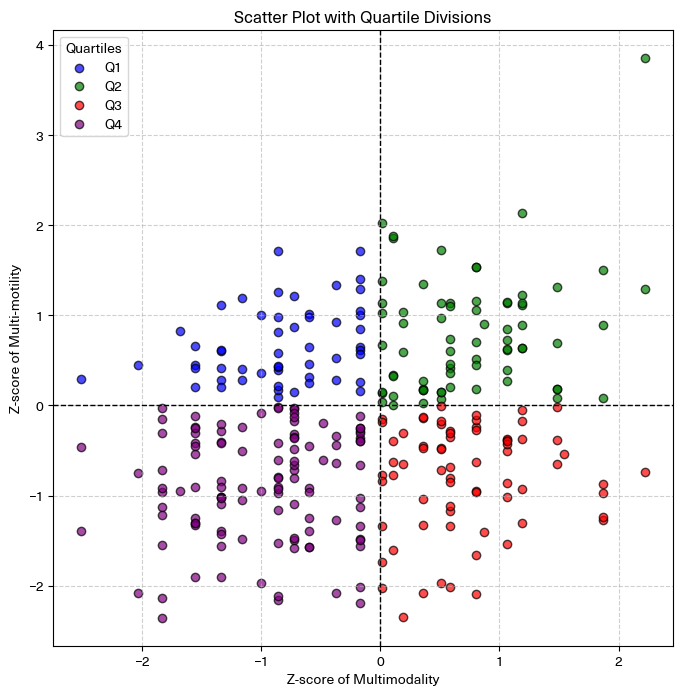

Scatter plot with quartiles saved at D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions\scatter_quartiles_colored.pdf


In [260]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Assuming 'merged_dataset' contains columns 'Multimodality_zScore', 'Multimotility_zScore', and 'quartile'
# Define the output path
output_base_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions"
output_file = os.path.join(output_base_path, "scatter_quartiles_colored.pdf")

# Scatter plot with quadrants and quartile colors
def plot_scatter_with_quartiles(data, output_path):
    x = data['Multimodality_zScore']
    y = data['Multimotility_zScore']
    
    # Define colors for each quartile
    quartile_colors = {
        'Q1': 'blue',
        'Q2': 'green',
        'Q3': 'red',
        'Q4': 'purple'
    }

    plt.figure(figsize=(8, 8))

    # Scatter plot with color based on quartile
    for quartile, color in quartile_colors.items():
        subset = data[data['quartile'] == quartile]
        plt.scatter(
            subset['Multimodality_zScore'], subset['Multimotility_zScore'],
            alpha=0.7, edgecolors='k', label=quartile, color=color
        )

    # Adding quartile dividing lines
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

    # Labels and legend
    plt.xlabel('Z-score of Multimodality')
    plt.ylabel('Z-score of Multi-motility')
    plt.title('Scatter Plot with Quartile Divisions')
    plt.legend(title="Quartiles")
    plt.grid(True, linestyle='--', alpha=0.6)

    # Save plot
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    plt.show()
    
    print(f"Scatter plot with quartiles saved at {output_path}")

# Run the function with your dataset
plot_scatter_with_quartiles(merged_dataset, output_file)


In [274]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Define the output path
output_base_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions"

# Function to create word count dataframe by quartile
def create_word_count_dataframe(data):
    quartiles = ['Q1', 'Q2', 'Q3', 'Q4']
    
    # List to store word count data
    word_count_data = []
    
    for quartile in quartiles:
        # Filter data for the current quartile
        quartile_data = data[data['quartile'] == quartile]
        
        # Count the frequency of each word in the current quartile
        quartile_counts = Counter(quartile_data['impression'].dropna())
        
        # Append the counts to the list
        for word, count in quartile_counts.items():
            word_count_data.append({'quartile': quartile, 'word': word, 'count': count})
    
    # Create a DataFrame from the word count data
    word_count_df = pd.DataFrame(word_count_data)
    
    # Sort the DataFrame by quartile and count (descending)
    word_count_df = word_count_df.sort_values(by=['quartile', 'count'], ascending=[True, False])
    
    return word_count_df

# Create the word count DataFrame
word_count_df = create_word_count_dataframe(merged_dataset)

# Create an oval mask (2:1 width-to-height ratio)
x, y = np.ogrid[:800, :1600]
mask = ((x - 400)**2 / 400**2 + (y - 800)**2 / 800**2) > 1
mask = 255 * mask.astype(int)

# Generate and save word clouds for each quartile
quartiles = ['Q1', 'Q2', 'Q3', 'Q4']

for quartile in quartiles:
    # Filter words for the current quartile and remove single occurrences
    quartile_df = word_count_df[word_count_df['quartile'] == quartile]
    quartile_filtered = quartile_df[quartile_df['count'] > 1]
    
    # Convert to dictionary for word cloud generation
    word_freq = dict(zip(quartile_filtered['word'], quartile_filtered['count']))
    
    if word_freq:
        # Generate word cloud
        wordcloud = WordCloud(width=1600, height=800, background_color='white', colormap='viridis',
                              mask=mask, contour_width=0).generate_from_frequencies(word_freq)

        # Display and save the word cloud
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Oval-Shaped (2:1) Word Cloud for {quartile}")
        
        output_image_path = os.path.join(output_base_path, f"word_cloud_{quartile}.png")
        plt.savefig(output_image_path, dpi=300, bbox_inches='tight')
        plt.close()

        print(f"Word cloud for {quartile} saved to {output_image_path}")
    else:
        print(f"No sufficient words to generate a word cloud for {quartile}")

# Save the filtered word count DataFrame to CSV
output_csv_path = os.path.join(output_base_path, "filtered_word_counts_by_quartile.csv")
word_count_df.to_csv(output_csv_path, index=False)
print(f"Filtered word count DataFrame saved to {output_csv_path}")


Word cloud for Q1 saved to D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions\word_cloud_Q1.png
Word cloud for Q2 saved to D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions\word_cloud_Q2.png
Word cloud for Q3 saved to D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions\word_cloud_Q3.png
Word cloud for Q4 saved to D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions\word_cloud_Q4.png
Filtered word count DataFrame saved to D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\impressions\filtered_word_counts_by_quartile.csv


In [268]:
word_count_df

quartile           word  count
1         Q1       Pleasant      9
16        Q1      Stressful      6
2         Q1      Enjoyable      5
14        Q1    Challenging      5
25        Q1           Long      4
..       ...            ...    ...
139       Q4  Unpredictable      1
140       Q4     Uneventful      1
141       Q4    Unpleasant       1
143       Q4       Peaceful      1
144       Q4         Devoid      1

[145 rows x 3 columns]

In [270]:
print(merged_dataset.isna().sum())  # Check for NaNs
print(merged_dataset.isin([np.inf, -np.inf]).sum())  # Check for Infs

Response ID             0
Multimodality_zScore    0
Multimotility_zScore    0
Color                   0
Category                0
Type                    0
distance                0
CAP_Location            0
distance_class          0
CAP_Rank                0
Gender                  0
transfer                0
Age                     8
last_mile_impression    7
travel_time             6
Education_Group         0
language_label          0
impression              7
quartile                0
dtype: int64
Response ID             0
Multimodality_zScore    0
Multimotility_zScore    0
Color                   0
Category                0
Type                    0
distance                0
CAP_Location            0
distance_class          0
CAP_Rank                0
Gender                  0
transfer                0
Age                     0
last_mile_impression    0
travel_time             0
Education_Group         0
language_label          0
impression              0
quartile                0

# TEST SESSIONNN

In [141]:
merged_dataset.head(10)

Response ID  Multimodality_zScore  Multimotility_zScore  Color  \
0  R_6JmlJEGCOWo9rTX              0.017263             -1.732001   blue   
1  R_61z5R1KEmMv8GGz             -0.170327             -2.018535   blue   
2  R_2QS9J3nCE9mYu8B              0.017263             -0.769720   blue   
3  R_2JlKjQUhcT7unUa             -0.374319             -2.078315   blue   
4  R_6IoBWPSrHaPVS7I              0.017263             -0.835328   blue   
5  R_6D6MZRgf5FMBZ9G              0.191868             -2.345071   blue   
6  R_7luZ8ZwkF9RTFpn              0.799456             -0.239462   blue   
7  R_2tly8oeOCknZpLP              1.190272              1.114036  green   
8  R_2jJuLMZDzUGV1E8              0.355860              1.346123    red   
9  R_6eimPNdHPhCcUXT              0.191868              1.034229    red   

             Category   Type    distance                   CAP_Location  \
0   Below Equilibrium   Blue   15.044886            In Lombardia Region   
1   Below Equilibrium   Blue   20.372493            In Lombardia Region   
2   Below Equilibrium   Blue    2.424350                       In Milan   
3   Below Equilibrium   Blue  117.914526    Outside of Lombardia Region   
4   Below Equilibrium   Blue    2.424350                       In Milan   
5   Below Equilibrium   Blue    5.012305                       In Milan   
6   Below Equilibrium   Blue   11.779813  In Metropolitan area of Milan   
7  Within Equilibrium  Green   12.533400            In Lombardia Region   
8   Above Equilibrium    Red    2.424350                       In Milan   
9   Above Equilibrium    Red    1.169644                       In Milan   

   distance_class  CAP_Rank  Gender  transfer   Age last_mile_impression  \
0               2         3  Female       0.0   NaN                  NaN   
1               2         3  Female       0.0   NaN                  NaN   
2               1         1    Male       0.0   NaN                  NaN   
3               4         4    Male       0.0   NaN                  NaN   
4               1         1    Male       0.0   NaN                  NaN   
5               1         1    Male       0.0   NaN                  NaN   
6               2         2  Female       0.0   NaN          Accettabile   
7               2         3    Male       0.0   NaN            Ordinario   
8               1         1    Male       3.0  31.0                 nice   
9               1         1  Female      15.0  31.0                 Long   

   travel_time Education_Group language_label  impression quartile  
0          NaN         Unknown        Unknown         NaN       Q3  
1          NaN         Unknown        Unknown         NaN       Q4  
2          NaN         Unknown        Unknown         NaN       Q3  
3          NaN         Unknown        Unknown         NaN       Q4  
4          NaN         Unknown        Unknown         NaN       Q3  
5          NaN         Unknown        Unknown         NaN       Q3  
6         50.0         Unknown        Italian  Acceptable       Q3  
7         50.0         Unknown        Italian    Ordinary       Q2  
8         25.0   PhD / Postdoc        English        Nice       Q2  
9         19.0   PhD / Postdoc        English        Long       Q2

In [142]:
# Merging the 'zone_name' column from pt_dest into merged_dataset based on 'Response ID'
merged_dataset = merged_dataset.merge(pt_dest[['Response ID', 'zone_name']], 
                                       on='Response ID', 
                                       how='left')

In [143]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Response ID           308 non-null    object  
 1   Multimodality_zScore  308 non-null    float64 
 2   Multimotility_zScore  308 non-null    float64 
 3   Color                 308 non-null    object  
 4   Category              308 non-null    object  
 5   Type                  308 non-null    object  
 6   distance              308 non-null    float64 
 7   CAP_Location          308 non-null    object  
 8   distance_class        308 non-null    int64   
 9   CAP_Rank              308 non-null    int64   
 10  Gender                308 non-null    category
 11  transfer              308 non-null    float64 
 12  Age                   300 non-null    float64 
 13  last_mile_impression  301 non-null    object  
 14  travel_time           302 non-null    float64 
 15  Educat

In [144]:
merged_dataset

Response ID  Multimodality_zScore  Multimotility_zScore Color  \
0    R_6JmlJEGCOWo9rTX              0.017263             -1.732001  blue   
1    R_61z5R1KEmMv8GGz             -0.170327             -2.018535  blue   
2    R_2QS9J3nCE9mYu8B              0.017263             -0.769720  blue   
3    R_2JlKjQUhcT7unUa             -0.374319             -2.078315  blue   
4    R_6IoBWPSrHaPVS7I              0.017263             -0.835328  blue   
..                 ...                   ...                   ...   ...   
303  R_2sogfeczO00yYvM             -1.340959             -1.028991   red   
304  R_81Af79F72aaAUsT              1.064749              0.267545  blue   
305  R_82S6xK8Q8m0Ceye              0.017263              2.018871   red   
306  R_27pz8nRKYyJZW8h              1.064749             -0.392679  blue   
307  R_2q41Zzco1HRd92q              1.190272             -0.376574  blue   

              Category  Type    distance                   CAP_Location  \
0    Below Equilibrium  Blue   15.044886            In Lombardia Region   
1    Below Equilibrium  Blue   20.372493            In Lombardia Region   
2    Below Equilibrium  Blue    2.424350                       In Milan   
3    Below Equilibrium  Blue  117.914526    Outside of Lombardia Region   
4    Below Equilibrium  Blue    2.424350                       In Milan   
..                 ...   ...         ...                            ...   
303  Above Equilibrium   Red    1.169644                       In Milan   
304  Below Equilibrium  Blue   33.513502            In Lombardia Region   
305  Above Equilibrium   Red    2.452124                       In Milan   
306  Below Equilibrium  Blue   34.655301  In Metropolitan area of Milan   
307  Below Equilibrium  Blue    9.237931                       In Milan   

     distance_class  CAP_Rank  Gender  transfer   Age  \
0                 2         3  Female       0.0   NaN   
1                 2         3  Female       0.0   NaN   
2                 1         1    Male       0.0   NaN   
3                 4         4    Male       0.0   NaN   
4                 1         1    Male       0.0   NaN   
..              ...       ...     ...       ...   ...   
303               1         1  Female      25.0  22.0   
304               3         3    Male      20.0  23.0   
305               1         1  Female      20.0  24.0   
306               3         2    Male      15.0  24.0   
307               1         1    Male       7.0  24.0   

                                  last_mile_impression  travel_time  \
0                                                  NaN          NaN   
1                                                  NaN          NaN   
2                                                  NaN          NaN   
3                                                  NaN          NaN   
4                                                  NaN          NaN   
..                                                 ...          ...   
303                                          Piacevole         20.0   
304  Tedious but obligatory to reach a pleasant des...         70.0   
305                                              dirty         30.0   
306                                              Lungo         90.0   
307                                              Lungo         52.0   

                Education_Group language_label impression quartile  \
0                       Unknown        Unknown        NaN       Q3   
1                       Unknown        Unknown        NaN       Q4   
2                       Unknown        Unknown        NaN       Q3   
3                       Unknown        Unknown        NaN       Q4   
4                       Unknown        Unknown        NaN       Q3   
..                          ...            ...        ...      ...   
303        Triennale (Bachelor)        Italian   Pleasant       Q4   
304  Laurea Magistrale (Master)        English     Boring       Q2   
305  Laurea Magistrale (Maste

In [145]:
import pandas as pd

# Initialize a dictionary to store the results
results = []

# Loop through each quartile
for quartile in merged_dataset['quartile'].unique():
    quartile_data = merged_dataset[merged_dataset['quartile'] == quartile]
    quartile_count = len(quartile_data)  # Count of responses in the quartile
    
    # Loop through the specified columns
    for col in ['CAP_Location', 'zone_name', 'impression', 'Gender']:
        value_counts = quartile_data[col].value_counts()
        top_5 = value_counts.head(5)  # Get the top 5 most repeated elements
        for value, count in top_5.items():
            results.append({
                'Quartile': quartile,
                'Number of Responses': quartile_count,
                'Column': col,
                'Value': value,
                'Count': count
            })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Define the output path
output_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\top_5_repeated_elements_per_quartile.csv"

# Save the results to the specified directory
results_df.to_csv(output_path, index=False)

print(f"Results saved to '{output_path}'.")


Results saved to 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\top_5_repeated_elements_per_quartile.csv'.


In [146]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud
import numpy as np
from PIL import Image, ImageDraw
import pandas as pd

# Set the global font to Neue Haas Unica
mpl.rcParams['font.family'] = 'Neue Haas Unica'

# Function to create oval masks
def create_oval_mask(width, height):
    mask = Image.new('L', (width, height), 255)  # Start with a fully white mask
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0, width, height), fill=0)  # Draw a black oval
    return np.array(mask)

# Word frequency data preparation
word_clouds = {}
quartile_counts = {}
for quartile in merged_dataset['quartile'].unique():
    quartile_data = merged_dataset[merged_dataset['quartile'] == quartile]
    quartile_counts[quartile] = len(quartile_data)
    
    impressions = quartile_data['impression'].dropna().tolist()
    word_freq = pd.Series(impressions).value_counts()
    word_freq = word_freq[word_freq > 1].to_dict()  # Remove single-occurrence words
    word_clouds[quartile] = word_freq

# Proportional sizes for quartiles
size_map = {
    'Q1': (800, 400),
    'Q2': (1000, 500),
    'Q3': (1200, 600),
    'Q4': (1400, 700)  # Ensure Q4 is the largest
}

# Create results folder
results_folder = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\word_clouds"
os.makedirs(results_folder, exist_ok=True)

# Generate and save word clouds
for quartile in word_clouds.keys():
    if quartile in size_map:
        width, height = size_map[quartile]
        oval_mask = create_oval_mask(width, height)
        
        wordcloud = WordCloud(
            width=width * 2,  # Double the resolution for high-quality output
            height=height * 2,
            mask=oval_mask,
            background_color=None,  # Transparent background
            mode="RGBA",  # Enable alpha channel for transparency
            prefer_horizontal=0.7,  # Allow horizontal and vertical words
            max_words=100,
            relative_scaling=0.5,
            normalize_plurals=True
        ).generate_from_frequencies(word_clouds[quartile])
        
        # Plot and save the word cloud
        plt.figure(figsize=(width / 100, height / 100))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        
        # Save as high-resolution PNG
        output_path = os.path.join(results_folder, f"{quartile}_oval_word_cloud.png")
        plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight', transparent=True)
        plt.close()
        
        print(f"{quartile} word cloud saved to '{output_path}' as a high-resolution PNG with a transparent background.")

print(f"All word clouds generated and saved in '{results_folder}'.")


Q3 word cloud saved to 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\word_clouds\Q3_oval_word_cloud.png' as a high-resolution PNG with a transparent background.
Q4 word cloud saved to 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\word_clouds\Q4_oval_word_cloud.png' as a high-resolution PNG with a transparent background.
Q2 word cloud saved to 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\word_clouds\Q2_oval_word_cloud.png' as a high-resolution PNG with a transparent background.
Q1 word cloud saved to 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\word_clouds\Q1_oval_word_cloud.png' as a high-resolution PNG with a transparent background.
All word clouds generated and saved in 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\word_clouds'.


# Trying Sankey Daigram

In [148]:
import pandas as pd
import plotly.graph_objects as go
import os

# Create a folder to save the diagrams
output_folder = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams"
os.makedirs(output_folder, exist_ok=True)

# Define the simplified attributes for the flow
attributes = ['CAP_Location', 'zone_name', 'impression']

# Prepare the Sankey data
def prepare_sankey_data(data, attributes):
    nodes = []
    links = {'source': [], 'target': [], 'value': []}

    for i in range(len(attributes) - 1):
        source_attr = attributes[i]
        target_attr = attributes[i + 1]
        
        # Group by the current pair of attributes
        grouped = data.groupby([source_attr, target_attr]).size().reset_index(name='count')
        
        for _, row in grouped.iterrows():
            source = row[source_attr]
            target = row[target_attr]
            value = row['count']
            
            # Add nodes
            if source not in nodes:
                nodes.append(source)
            if target not in nodes:
                nodes.append(target)
            
            # Add links
            links['source'].append(nodes.index(source))
            links['target'].append(nodes.index(target))
            links['value'].append(value)
    
    return nodes, links

# Generate Sankey diagrams for all quartiles
for quartile in ['Q1', 'Q2', 'Q3', 'Q4']:
    quartile_data = merged_dataset[merged_dataset['quartile'] == quartile]
    
    # Filter out impressions with only one count
    impression_counts = quartile_data['impression'].value_counts()
    valid_impressions = impression_counts[impression_counts > 1].index
    quartile_data = quartile_data[quartile_data['impression'].isin(valid_impressions)]
    
    # Generate Sankey data
    nodes, links = prepare_sankey_data(quartile_data, attributes)
    
    # Create the Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=nodes
        ),
        link=dict(
            source=links['source'],
            target=links['target'],
            value=links['value']
        )
    ))

    # Update layout
    fig.update_layout(
        title_text=f"Simplified Sankey Diagram for {quartile} (Filtered Impressions)",
        font_size=10
    )
    
    # Save the diagram as an HTML file
    output_path = os.path.join(output_folder, f"{quartile}_filtered_sankey_diagram.html")
    fig.write_html(output_path)
    print(f"Simplified Sankey diagram for {quartile} saved to '{output_path}'.")

print("All simplified and filtered Sankey diagrams generated and saved.")


Simplified Sankey diagram for Q1 saved to 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams\Q1_filtered_sankey_diagram.html'.
Simplified Sankey diagram for Q2 saved to 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams\Q2_filtered_sankey_diagram.html'.
Simplified Sankey diagram for Q3 saved to 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams\Q3_filtered_sankey_diagram.html'.
Simplified Sankey diagram for Q4 saved to 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams\Q4_filtered_sankey_diagram.html'.
All simplified and filtered Sankey diagrams generated and saved.


In [149]:
merged_dataset

Response ID  Multimodality_zScore  Multimotility_zScore Color  \
0    R_6JmlJEGCOWo9rTX              0.017263             -1.732001  blue   
1    R_61z5R1KEmMv8GGz             -0.170327             -2.018535  blue   
2    R_2QS9J3nCE9mYu8B              0.017263             -0.769720  blue   
3    R_2JlKjQUhcT7unUa             -0.374319             -2.078315  blue   
4    R_6IoBWPSrHaPVS7I              0.017263             -0.835328  blue   
..                 ...                   ...                   ...   ...   
303  R_2sogfeczO00yYvM             -1.340959             -1.028991   red   
304  R_81Af79F72aaAUsT              1.064749              0.267545  blue   
305  R_82S6xK8Q8m0Ceye              0.017263              2.018871   red   
306  R_27pz8nRKYyJZW8h              1.064749             -0.392679  blue   
307  R_2q41Zzco1HRd92q              1.190272             -0.376574  blue   

              Category  Type    distance                   CAP_Location  \
0    Below Equilibrium  Blue   15.044886            In Lombardia Region   
1    Below Equilibrium  Blue   20.372493            In Lombardia Region   
2    Below Equilibrium  Blue    2.424350                       In Milan   
3    Below Equilibrium  Blue  117.914526    Outside of Lombardia Region   
4    Below Equilibrium  Blue    2.424350                       In Milan   
..                 ...   ...         ...                            ...   
303  Above Equilibrium   Red    1.169644                       In Milan   
304  Below Equilibrium  Blue   33.513502            In Lombardia Region   
305  Above Equilibrium   Red    2.452124                       In Milan   
306  Below Equilibrium  Blue   34.655301  In Metropolitan area of Milan   
307  Below Equilibrium  Blue    9.237931                       In Milan   

     distance_class  CAP_Rank  Gender  transfer   Age  \
0                 2         3  Female       0.0   NaN   
1                 2         3  Female       0.0   NaN   
2                 1         1    Male       0.0   NaN   
3                 4         4    Male       0.0   NaN   
4                 1         1    Male       0.0   NaN   
..              ...       ...     ...       ...   ...   
303               1         1  Female      25.0  22.0   
304               3         3    Male      20.0  23.0   
305               1         1  Female      20.0  24.0   
306               3         2    Male      15.0  24.0   
307               1         1    Male       7.0  24.0   

                                  last_mile_impression  travel_time  \
0                                                  NaN          NaN   
1                                                  NaN          NaN   
2                                                  NaN          NaN   
3                                                  NaN          NaN   
4                                                  NaN          NaN   
..                                                 ...          ...   
303                                          Piacevole         20.0   
304  Tedious but obligatory to reach a pleasant des...         70.0   
305                                              dirty         30.0   
306                                              Lungo         90.0   
307                                              Lungo         52.0   

                Education_Group language_label impression quartile  \
0                       Unknown        Unknown        NaN       Q3   
1                       Unknown        Unknown        NaN       Q4   
2                       Unknown        Unknown        NaN       Q3   
3                       Unknown        Unknown        NaN       Q4   
4                       Unknown        Unknown        NaN       Q3   
..                          ...            ...        ...      ...   
303        Triennale (Bachelor)        Italian   Pleasant       Q4   
304  Laurea Magistrale (Master)        English     Boring       Q2   
305  Laurea Magistrale (Maste

In [150]:
merged_result = pd.merge(filtered_data[['Response ID', 'What do you suggest to add to the transport stop you use to enhance its quality? - Selected Choice',
                                       'Nearby the transport stop you selected, what mobility services could be added to the station to enhance its quality? - Selected Choice']],
                         merged_dataset,
                         on='Response ID', how='left')
merged_result

Response ID  \
0    R_2AIcboe8JRvf2GR   
1    R_6JmlJEGCOWo9rTX   
2    R_61z5R1KEmMv8GGz   
3    R_2QS9J3nCE9mYu8B   
4    R_2JlKjQUhcT7unUa   
..                 ...   
324  R_2sogfeczO00yYvM   
325  R_81Af79F72aaAUsT   
326  R_82S6xK8Q8m0Ceye   
327  R_27pz8nRKYyJZW8h   
328  R_2q41Zzco1HRd92q   

    What do you suggest to add to the transport stop you use to enhance its quality? - Selected Choice  \
0                                           Trash cans                                                   
1                                           Trash cans                                                   
2                                               Lights                                                   
3                                                    5                                                   
4                                       Ticket machine                                                   
..                                                 ...                                                   
324                   Shaded waiting area,CCTV Cameras                                                   
325                     Barrier free access,Trash cans                                                   
326                                             Others                                                   
327       Interactive maps of the neighbourhood,Others                                                   
328                      Escalator,Barrier free access                                                   

    Nearby the transport stop you selected, what mobility services could be added to the station to enhance its quality? - Selected Choice  \
0                                                    6                                                                                       
1                                                    6                                                                                       
2                   More amenities in the ground floor                                                                                       
3                                   Trees and greenery                                                                                       
4    Trees and greenery,Shades paths,More amenities...                                                                                       
..                                                 ...                                                                                       
324  Wider sidewalks,Protected crossing lanes,Urban...                                                                                       
325                 Wider sidewalks,Trees and greenery                                                                                       
326  Protected crossing lanes,Lighting,Urban furnit...                                                                                       
327  Trees and greenery,Urban furniture (benches, s...                                                                                       
328  Shades paths,More amenities in the ground floo...                                                                                       

     Multimodality_zScore  Multimotility_zScore Color           Category  \
0                     NaN                   NaN   NaN                NaN   
1                0.017263             -1.732001  blue  Below Equilibrium   
2               -0.170327             -2.018535  blue  Below Equilibrium   
3                0.017263             -0.769720  blue  Below Equilibrium   
4               -0.374319             -2.078315  blue  Below Equilibrium   
..                    ...                   ...   ...                ...   
324             -1.340959             -1.028991   red  Above Equilibrium   
325              1.064749              0.267545  blue  Below Equilibrium   
326              0.017263           

In [151]:
# 1. Copy the original DataFrame into a new one:
df_2 = merged_result.copy()

# 2. Rename the two long question columns to "node" and "place":
df_2.rename(
    columns={
        "What do you suggest to add to the transport stop you use to enhance its quality? - Selected Choice": "node",
        "Nearby the transport stop you selected, what mobility services could be added to the station to enhance its quality? - Selected Choice": "place"
    },
    inplace=True
)

# 3. (Optional) Verify the new column names:
print(df_2.columns.tolist())


['Response ID', 'node', 'place', 'Multimodality_zScore', 'Multimotility_zScore', 'Color', 'Category', 'Type', 'distance', 'CAP_Location', 'distance_class', 'CAP_Rank', 'Gender', 'transfer', 'Age', 'last_mile_impression', 'travel_time', 'Education_Group', 'language_label', 'impression', 'quartile', 'zone_name']


In [152]:
df = df_2
csv_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams\sankey-circular\impressions.csv"
df.to_csv(csv_path, index = True )

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
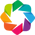

Diagram saved to: D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams\sankey-circular\circular_sankey.html


In [153]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

from bokeh.plotting import output_file, save

# Filter the dataset
filtered_df = df[(df['quartile'] == 'Q3') & (df['zone_name'] == 'Lambrate_FS')].dropna(subset=['node', 'place'])

# Process `node` dimension to split combined responses into individual options
node_expanded = filtered_df['node'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
node_expanded.name = 'node_option'  # Rename for clarity

# Process `place` dimension to split combined responses into individual options
place_expanded = filtered_df['place'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
place_expanded.name = 'place_option'  # Rename for clarity

# Expand the filtered dataframe for both node and place
sankey_data_expanded = filtered_df.drop(columns=['node', 'place']).join(node_expanded).join(place_expanded)

# Define categories and map them to colors
categories = ['impression', 'node_option', 'place_option']
unique_labels = pd.concat([sankey_data_expanded[col] for col in categories]).unique()
label_dict = {label: idx for idx, label in enumerate(unique_labels)}

color_map = {
    'impression': 'red',  # Color for impressions
    'node': 'blue',       # Color for nodes
    'place': 'green'      # Color for places
}

# Add the category and color information to the nodes dataframe
nodes_df = pd.DataFrame({'index': range(len(unique_labels)), 'name': unique_labels})
nodes_df['category'] = nodes_df['name'].apply(
    lambda x: 'impression' if x in sankey_data_expanded['impression'].unique()
    else 'node' if x in sankey_data_expanded['node_option'].unique()
    else 'place'
)
nodes_df['color'] = nodes_df['category'].map(color_map)

# Create links between `impression` and expanded `node`, and `impression` and `place`
links = []
for _, row in sankey_data_expanded.iterrows():
    # Link impression to node_option
    links.append((label_dict[row['impression']], label_dict[row['node_option']], 1))
    # Link impression to place_option
    links.append((label_dict[row['impression']], label_dict[row['place_option']], 1))
    # Link node_option to place_option
    links.append((label_dict[row['node_option']], label_dict[row['place_option']], 1))

# Convert links to DataFrame
links_df = pd.DataFrame(links, columns=['source', 'target', 'value'])

# Convert nodes to Dataset
nodes_ds = hv.Dataset(nodes_df, ['index'], ['name', 'category', 'color'])

# Create circular Sankey diagram using Holoviews
chord = hv.Chord((links_df, nodes_ds)).opts(
    opts.Chord(
        labels='name',
        node_color='color',  # Use the color column
        edge_color='source',
        label_text_font_size='8pt',
        node_size=10,
        height=800,
        width=800,
        title="Circular Sankey Diagram",
    )
)

# Save the diagram as an HTML file
output_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams\sankey-circular\circular_sankey.html"
output_file(output_path)
save(hv.render(chord, backend='bokeh'))

print(f"Diagram saved to: {output_path}")


In [154]:
x= df['zone_name'].unique()
print(x)

[nan 'Lambrate_FS' 'Piola M2' 'P.zza Leonardo' 'Lambrate M2'
 'Via Eduardo Bonardi' 'Back of Lambrate FS']


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
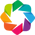

Diagram saved to: D:\\15_Polimi\\Polimi_onedrive\\OneDrive - Politecnico di Milano\\PhD\\people\\py_out\\sankey_diagrams\\sankey-circular\\sankey_circular_Q1_P.zza_Leonardo.html


In [155]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

from bokeh.plotting import output_file, save
import pandas as pd

# Define the filtering criteria
quartile = 'Q1'
zone_name = 'P.zza Leonardo'

# Filter the dataset based on the inputs
filtered_df = df[(df['quartile'] == quartile) & (df['zone_name'] == zone_name)].dropna(subset=['node', 'place'])

# Process `node` dimension to split combined responses into individual options
node_expanded = filtered_df['node'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
node_expanded.name = 'node_option'  # Rename for clarity

# Process `place` dimension to split combined responses into individual options
place_expanded = filtered_df['place'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
place_expanded.name = 'place_option'  # Rename for clarity

# Expand the filtered dataframe for both node and place
sankey_data_expanded = filtered_df.drop(columns=['node', 'place']).join(node_expanded).join(place_expanded)

# Define categories and map them to colors
categories = ['impression', 'node_option', 'place_option']
unique_labels = pd.concat([sankey_data_expanded[col] for col in categories]).unique()
label_dict = {label: idx for idx, label in enumerate(unique_labels)}

color_map = {
    'impression': 'red',  # Color for impressions
    'node': 'blue',       # Color for nodes
    'place': 'green'      # Color for places
}

# Add the category and color information to the nodes dataframe
nodes_df = pd.DataFrame({'index': range(len(unique_labels)), 'name': unique_labels})
nodes_df['category'] = nodes_df['name'].apply(
    lambda x: 'impression' if x in sankey_data_expanded['impression'].unique()
    else 'node' if x in sankey_data_expanded['node_option'].unique()
    else 'place'
)
nodes_df['color'] = nodes_df['category'].map(color_map)

# Create links between `impression` and expanded `node`, and `impression` and `place`
links = []
for _, row in sankey_data_expanded.iterrows():
    # Link impression to node_option
    links.append((label_dict[row['impression']], label_dict[row['node_option']], 1))
    # Link impression to place_option
    links.append((label_dict[row['impression']], label_dict[row['place_option']], 1))
    # Link node_option to place_option
    links.append((label_dict[row['node_option']], label_dict[row['place_option']], 1))

# Convert links to DataFrame
links_df = pd.DataFrame(links, columns=['source', 'target', 'value'])

# Convert nodes to Dataset
nodes_ds = hv.Dataset(nodes_df, ['index'], ['name', 'category', 'color'])

# Generate a dynamic title and file name based on the filtered dataset
title = f"Circular Sankey Diagram: {quartile} - {zone_name}"
file_name = f"sankey_circular_{quartile}_{zone_name}".replace(" ", "_").replace("/", "_")
output_path = rf"D:\\15_Polimi\\Polimi_onedrive\\OneDrive - Politecnico di Milano\\PhD\\people\\py_out\\sankey_diagrams\\sankey-circular\\{file_name}.html"

# Create circular Sankey diagram using Holoviews with the dynamic title
chord = hv.Chord((links_df, nodes_ds)).opts(
    opts.Chord(
        labels='name',
        node_color='color',  # Use the color column
        edge_color='source',
        label_text_font_size='8pt',
        node_size=10,
        height=800,
        width=800,
        title=title,  # Use the dynamic title
    )
)

# Save the diagram as an HTML file
output_file(output_path)
save(hv.render(chord, backend='bokeh'))

print(f"Diagram saved to: {output_path}")


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
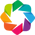

Diagram saved to: D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams\sankey-circular\circular_sankey_shades.html


In [156]:
import holoviews as hv
from holoviews import opts
from matplotlib.colors import to_rgb
import colorsys
import random

hv.extension('bokeh')

from bokeh.plotting import output_file, save

# Filter the dataset
filtered_df = df[(df['quartile'] == 'Q3') & (df['zone_name'] == 'Lambrate_FS')].dropna(subset=['node', 'place'])

# Process `node` dimension to split combined responses into individual options
node_expanded = filtered_df['node'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
node_expanded.name = 'node_option'  # Rename for clarity

# Process `place` dimension to split combined responses into individual options
place_expanded = filtered_df['place'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
place_expanded.name = 'place_option'  # Rename for clarity

# Expand the filtered dataframe for both node and place
sankey_data_expanded = filtered_df.drop(columns=['node', 'place']).join(node_expanded).join(place_expanded)

# Define categories
categories = ['impression', 'node_option', 'place_option']
unique_labels = pd.concat([sankey_data_expanded[col] for col in categories]).unique()
label_dict = {label: idx for idx, label in enumerate(unique_labels)}

# Generate 10 shades for each base color
def generate_shades(base_color, n=10):
    """Generate `n` shades of a base color."""
    base_rgb = to_rgb(base_color)
    shades = []
    for i in range(n):
        factor = 1 - (i / (n * 1.5))  # Decrease brightness gradually
        r, g, b = [factor * c for c in base_rgb]
        shades.append(f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}")
    return shades

# Generate 10 shades for each category
impression_shades = generate_shades("red", 10)
node_shades = generate_shades("blue", 10)
place_shades = generate_shades("green", 10)

# Assign random shades to each category
color_map = {}
for label in unique_labels:
    if label in sankey_data_expanded['impression'].unique():
        color_map[label] = random.choice(impression_shades)
    elif label in sankey_data_expanded['node_option'].unique():
        color_map[label] = random.choice(node_shades)
    elif label in sankey_data_expanded['place_option'].unique():
        color_map[label] = random.choice(place_shades)

# Add the category and color information to the nodes dataframe
nodes_df = pd.DataFrame({'index': range(len(unique_labels)), 'name': unique_labels})
nodes_df['category'] = nodes_df['name'].apply(
    lambda x: 'impression' if x in sankey_data_expanded['impression'].unique()
    else 'node' if x in sankey_data_expanded['node_option'].unique()
    else 'place'
)
nodes_df['color'] = nodes_df['name'].map(color_map)  # Ensure colors are assigned

# Create links between `impression` and expanded `node`, and `impression` and `place`
links = []
for _, row in sankey_data_expanded.iterrows():
    # Link impression to node_option
    links.append((label_dict[row['impression']], label_dict[row['node_option']], 1))
    # Link impression to place_option
    links.append((label_dict[row['impression']], label_dict[row['place_option']], 1))
    # Link node_option to place_option
    links.append((label_dict[row['node_option']], label_dict[row['place_option']], 1))

# Convert links to DataFrame
links_df = pd.DataFrame(links, columns=['source', 'target', 'value'])

# Convert nodes to Dataset
nodes_ds = hv.Dataset(nodes_df, ['index'], ['name', 'category', 'color'])

# Create circular Sankey diagram using Holoviews
chord = hv.Chord((links_df, nodes_ds)).opts(
    opts.Chord(
        labels='name',
        node_color='color',               # Use the color column
        edge_color='source',              # Style edges by source
        label_text_font_size='8pt',       # Font size for labels
        node_size=10,                     # Size of the nodes
        height=800,                       # Height of the diagram
        width=800,                        # Width of the diagram
        title="Circular Sankey Diagram with Random Shades",
    )
)

# Save the diagram as an HTML file
output_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams\sankey-circular\circular_sankey_shades.html"
output_file(output_path)
save(hv.render(chord, backend='bokeh'))

print(f"Diagram saved to: {output_path}")


# 5.6 Correlations

In [158]:
#merged_dataset = merged_dataset.rename(columns={
#    "What do you suggest to add to the transport stop you use to enhance its quality? - Selected Choice": "node_enhance",
 #   "Nearby the transport stop you selected, what mobility services could be added to the station to enhance its quality? - Selected Choice": "last_mile_enhance"
#})


In [159]:
# Display the updated DataFrame (Optional: print a preview)
merged_dataset



Response ID  Multimodality_zScore  Multimotility_zScore Color  \
0    R_6JmlJEGCOWo9rTX              0.017263             -1.732001  blue   
1    R_61z5R1KEmMv8GGz             -0.170327             -2.018535  blue   
2    R_2QS9J3nCE9mYu8B              0.017263             -0.769720  blue   
3    R_2JlKjQUhcT7unUa             -0.374319             -2.078315  blue   
4    R_6IoBWPSrHaPVS7I              0.017263             -0.835328  blue   
..                 ...                   ...                   ...   ...   
303  R_2sogfeczO00yYvM             -1.340959             -1.028991   red   
304  R_81Af79F72aaAUsT              1.064749              0.267545  blue   
305  R_82S6xK8Q8m0Ceye              0.017263              2.018871   red   
306  R_27pz8nRKYyJZW8h              1.064749             -0.392679  blue   
307  R_2q41Zzco1HRd92q              1.190272             -0.376574  blue   

              Category  Type    distance                   CAP_Location  \
0    Below Equilibrium  Blue   15.044886            In Lombardia Region   
1    Below Equilibrium  Blue   20.372493            In Lombardia Region   
2    Below Equilibrium  Blue    2.424350                       In Milan   
3    Below Equilibrium  Blue  117.914526    Outside of Lombardia Region   
4    Below Equilibrium  Blue    2.424350                       In Milan   
..                 ...   ...         ...                            ...   
303  Above Equilibrium   Red    1.169644                       In Milan   
304  Below Equilibrium  Blue   33.513502            In Lombardia Region   
305  Above Equilibrium   Red    2.452124                       In Milan   
306  Below Equilibrium  Blue   34.655301  In Metropolitan area of Milan   
307  Below Equilibrium  Blue    9.237931                       In Milan   

     distance_class  CAP_Rank  Gender  transfer   Age  \
0                 2         3  Female       0.0   NaN   
1                 2         3  Female       0.0   NaN   
2                 1         1    Male       0.0   NaN   
3                 4         4    Male       0.0   NaN   
4                 1         1    Male       0.0   NaN   
..              ...       ...     ...       ...   ...   
303               1         1  Female      25.0  22.0   
304               3         3    Male      20.0  23.0   
305               1         1  Female      20.0  24.0   
306               3         2    Male      15.0  24.0   
307               1         1    Male       7.0  24.0   

                                  last_mile_impression  travel_time  \
0                                                  NaN          NaN   
1                                                  NaN          NaN   
2                                                  NaN          NaN   
3                                                  NaN          NaN   
4                                                  NaN          NaN   
..                                                 ...          ...   
303                                          Piacevole         20.0   
304  Tedious but obligatory to reach a pleasant des...         70.0   
305                                              dirty         30.0   
306                                              Lungo         90.0   
307                                              Lungo         52.0   

                Education_Group language_label impression quartile  \
0                       Unknown        Unknown        NaN       Q3   
1                       Unknown        Unknown        NaN       Q4   
2                       Unknown        Unknown        NaN       Q3   
3                       Unknown        Unknown        NaN       Q4   
4                       Unknown        Unknown        NaN       Q3   
..                          ...            ...        ...      ...   
303        Triennale (Bachelor)        Italian   Pleasant       Q4   
304  Laurea Magistrale (Master)        English     Boring       Q2   
305  Laurea Magistrale (Maste

In [160]:
## Circular Sankey Diagram

In [161]:
import pandas as pd
import plotly.graph_objects as go
import os

# Create a folder to save the diagrams
output_folder = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams"
os.makedirs(output_folder, exist_ok=True)

# Define the attributes for the flow
attributes = ['impression', 'node', 'place']

# Function to explode multi-choice columns into separate rows
def explode_multi_choice_columns(data, columns):
    for col in columns:
        if col in data.columns:
            # Split values by comma and explode
            data = data.assign(**{col: data[col].str.split(',')}).explode(col)
    return data

# Prepare the Sankey data
def prepare_circular_sankey_data(data, attributes):
    nodes = []
    links = {'source': [], 'target': [], 'value': []}
    node_colors = []  # Store colors for each node

    for i, attr in enumerate(attributes):
        color = ['#1f77b4', '#ff7f0e', '#2ca02c'][i]  # Assign distinct colors to groups
        grouped = data.groupby([attr]).size().reset_index(name='count')

        for _, row in grouped.iterrows():
            node = row[attr]
            if node not in nodes:
                nodes.append(node)
                node_colors.append(color)

    # Add links between adjacent attributes
    for i in range(len(attributes) - 1):
        source_attr = attributes[i]
        target_attr = attributes[i + 1]

        grouped = data.groupby([source_attr, target_attr]).size().reset_index(name='count')
        for _, row in grouped.iterrows():
            source = row[source_attr]
            target = row[target_attr]
            value = row['count']

            if source not in nodes:
                nodes.append(source)
                node_colors.append(color)
            if target not in nodes:
                nodes.append(target)
                node_colors.append(color)

            links['source'].append(nodes.index(source))
            links['target'].append(nodes.index(target))
            links['value'].append(value)

    # Loop back for the circular connection
    grouped = data.groupby([attributes[-1], attributes[0]]).size().reset_index(name='count')
    for _, row in grouped.iterrows():
        source = row[attributes[-1]]
        target = row[attributes[0]]
        value = row['count']

        if source not in nodes:
            nodes.append(source)
            node_colors.append(color)
        if target not in nodes:
            nodes.append(target)
            node_colors.append(color)

        links['source'].append(nodes.index(source))
        links['target'].append(nodes.index(target))
        links['value'].append(value)

    return nodes, links, node_colors

# Generate the Sankey diagram
def generate_circular_sankey_diagram(data, output_path, title):
    # Explode multi-choice columns
    data = explode_multi_choice_columns(data, ['node', 'place'])

    # Prepare Sankey data
    nodes, links, node_colors = prepare_circular_sankey_data(data, attributes)

    # Create the Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=nodes,
            color=node_colors
        ),
        link=dict(
            source=links['source'],
            target=links['target'],
            value=links['value']
        )
    ))

    # Update layout
    fig.update_layout(
        title_text=title,
        font_size=10
    )
    
    # Save the diagram as an HTML file
    fig.write_html(output_path)
    print(f"Circular Sankey diagram saved to '{output_path}'.")

# Process the dataset
output_path = os.path.join(output_folder, "circular_sankey_diagram.html")
title = "Circular Sankey Diagram with Distinct Segments"
generate_circular_sankey_diagram(df, output_path, title)

print("Circular Sankey diagram with distinct segments generated and saved.")


Circular Sankey diagram saved to 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams\circular_sankey_diagram.html'.
Circular Sankey diagram with distinct segments generated and saved.


In [162]:
import pandas as pd
import plotly.graph_objects as go
import os

# Create a folder to save the diagrams
output_folder = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams"
os.makedirs(output_folder, exist_ok=True)

# Define the attributes for the flow
attributes = ['impression', 'node', 'place']

# Function to explode multi-choice columns into separate rows
def explode_multi_choice_columns(data, columns):
    for col in columns:
        if col in data.columns:
            # Split values by comma and explode
            data = data.assign(**{col: data[col].str.split(',')}).explode(col)
    return data

# Prepare the Sankey data
def prepare_circular_sankey_data(data, attributes):
    nodes = []
    links = {'source': [], 'target': [], 'value': []}
    node_colors = []  # Store colors for each node

    # Define unique colors for each segment
    segment_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

    # Create nodes and assign colors
    for i, attr in enumerate(attributes):
        color = segment_colors[i]  # Assign distinct colors to groups
        grouped = data.groupby([attr]).size().reset_index(name='count')

        for _, row in grouped.iterrows():
            node = row[attr]
            if node not in nodes:
                nodes.append(node)
                node_colors.append(color)

    # Add links between adjacent attributes
    for i in range(len(attributes) - 1):
        source_attr = attributes[i]
        target_attr = attributes[i + 1]

        grouped = data.groupby([source_attr, target_attr]).size().reset_index(name='count')
        for _, row in grouped.iterrows():
            source = row[source_attr]
            target = row[target_attr]
            value = row['count']

            if source not in nodes:
                nodes.append(source)
                node_colors.append(segment_colors[i])  # Use color of the source segment
            if target not in nodes:
                nodes.append(target)
                node_colors.append(segment_colors[i + 1])  # Use color of the target segment

            links['source'].append(nodes.index(source))
            links['target'].append(nodes.index(target))
            links['value'].append(value)

    # Loop back for the circular connection
    grouped = data.groupby([attributes[-1], attributes[0]]).size().reset_index(name='count')
    for _, row in grouped.iterrows():
        source = row[attributes[-1]]
        target = row[attributes[0]]
        value = row['count']

        if source not in nodes:
            nodes.append(source)
            node_colors.append(segment_colors[-1])  # Use color of the last segment
        if target not in nodes:
            nodes.append(target)
            node_colors.append(segment_colors[0])  # Use color of the first segment

        links['source'].append(nodes.index(source))
        links['target'].append(nodes.index(target))
        links['value'].append(value)

    return nodes, links, node_colors

# Generate the Sankey diagram
def generate_circular_sankey_diagram(data, output_path, title):
    # Explode multi-choice columns
    data = explode_multi_choice_columns(data, ['node', 'place'])

    # Prepare Sankey data
    nodes, links, node_colors = prepare_circular_sankey_data(data, attributes)

    # Create the Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=nodes,
            color=node_colors
        ),
        link=dict(
            source=links['source'],
            target=links['target'],
            value=links['value']
        )
    ))

    # Update layout
    fig.update_layout(
        title_text=title,
        font_size=10
    )
    
    # Save the diagram as an HTML file
    fig.write_html(output_path)
    print(f"Circular Sankey diagram saved to '{output_path}'.")

# Process the dataset
output_path = os.path.join(output_folder, "circular_sankey_diagram.html")
title = "Circular Sankey Diagram with Unique Segment Colors"
generate_circular_sankey_diagram(df, output_path, title)

print("Circular Sankey diagram with unique segment colors generated and saved.")



Circular Sankey diagram saved to 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams\circular_sankey_diagram.html'.
Circular Sankey diagram with unique segment colors generated and saved.


In [163]:
import pandas as pd
import plotly.graph_objects as go
import os

# Create a folder to save the diagrams
output_folder = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams"
os.makedirs(output_folder, exist_ok=True)

# Define the attributes for the flow
attributes = ['zone_name', 'impression', 'node', 'place']

# Function to explode multi-choice columns into separate rows
def explode_multi_choice_columns(data, columns):
    for col in columns:
        if col in data.columns:
            # Split values by comma and explode
            data = data.assign(**{col: data[col].str.split(',')}).explode(col)
    return data

# Prepare the Sankey data
def prepare_sankey_data_with_branches(data, zone_attr, impression_attr, node_attr, last_mile_attr):
    nodes = []
    links = {'source': [], 'target': [], 'value': []}

    # Create branches for each category
    for target_attr in [impression_attr, node_attr, last_mile_attr]:
        # Group by zone_name and target attribute
        grouped = data.groupby([zone_attr, target_attr]).size().reset_index(name='count')
        
        for _, row in grouped.iterrows():
            source = row[zone_attr]
            target = row[target_attr]
            value = row['count']
            
            # Add nodes
            if source not in nodes:
                nodes.append(source)
            if target not in nodes:
                nodes.append(target)
            
            # Add links
            links['source'].append(nodes.index(source))
            links['target'].append(nodes.index(target))
            links['value'].append(value)
    
    return nodes, links

# Generate the Sankey diagram
def generate_sankey_diagram(data, output_path, title):
    # Explode multi-choice columns
    data = explode_multi_choice_columns(data, ['node', 'place'])

    # Prepare Sankey data
    nodes, links = prepare_sankey_data_with_branches(
        data, zone_attr='zone_name', impression_attr='impression',
        node_attr='node', last_mile_attr='place'
    )
    
    # Create the Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=nodes
        ),
        link=dict(
            source=links['source'],
            target=links['target'],
            value=links['value']
        )
    ))

    # Update layout
    fig.update_layout(
        title_text=title,
        font_size=10
    )
    
    # Save the diagram as an HTML file
    fig.write_html(output_path)
    print(f"Sankey diagram saved to '{output_path}'.")

# Process data for each quartile
for quartile in ['Q1', 'Q2', 'Q3', 'Q4']:
    quartile_data = df[df['quartile'] == quartile]
    
    # Filter impressions that appear at least twice
    impression_counts = quartile_data['impression'].value_counts()
    valid_impressions = impression_counts[impression_counts > 1].index
    quartile_data = quartile_data[quartile_data['impression'].isin(valid_impressions)]
    
    # Generate Sankey diagram
    output_path = os.path.join(output_folder, f"{quartile}_branching_sankey_diagram.html")
    title = f"Sankey Diagram with Branches for {quartile}"
    generate_sankey_diagram(quartile_data, output_path, title)

print("All Sankey diagrams with branching data generated and saved.")


Sankey diagram saved to 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams\Q1_branching_sankey_diagram.html'.
Sankey diagram saved to 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams\Q2_branching_sankey_diagram.html'.
Sankey diagram saved to 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams\Q3_branching_sankey_diagram.html'.
Sankey diagram saved to 'D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\sankey_diagrams\Q4_branching_sankey_diagram.html'.
All Sankey diagrams with branching data generated and saved.


     Dependent Variable Independent Variable  Pearson Correlation  \
0  Multimodality_zScore             distance             0.162605   
1  Multimodality_zScore             transfer             0.174383   
2  Multimodality_zScore                  Age            -0.243977   
3  Multimodality_zScore          travel_time             0.454493   
4  Multimotility_zScore             distance             0.219284   
5  Multimotility_zScore             transfer             0.112369   
6  Multimotility_zScore                  Age            -0.225603   
7  Multimotility_zScore          travel_time             0.335938   

   Spearman Correlation  
0              0.433959  
1              0.251288  
2             -0.309237  
3              0.516270  
4              0.324188  
5              0.143445  
6             -0.217349  
7              0.317614  


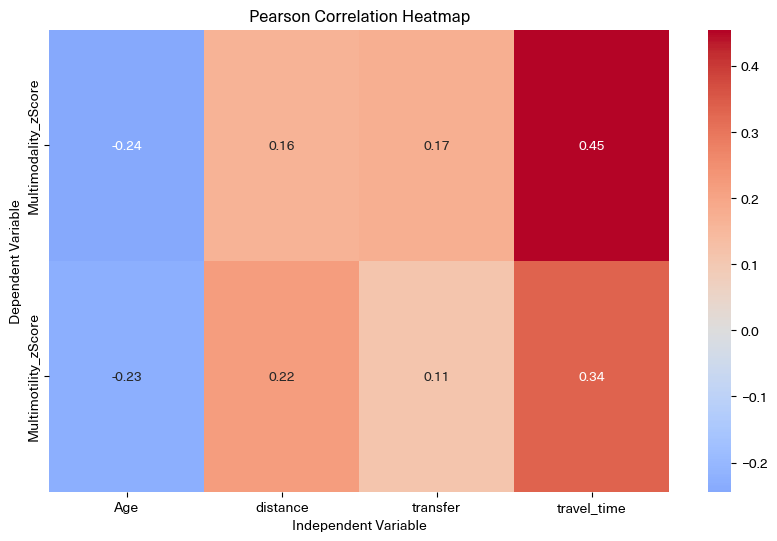

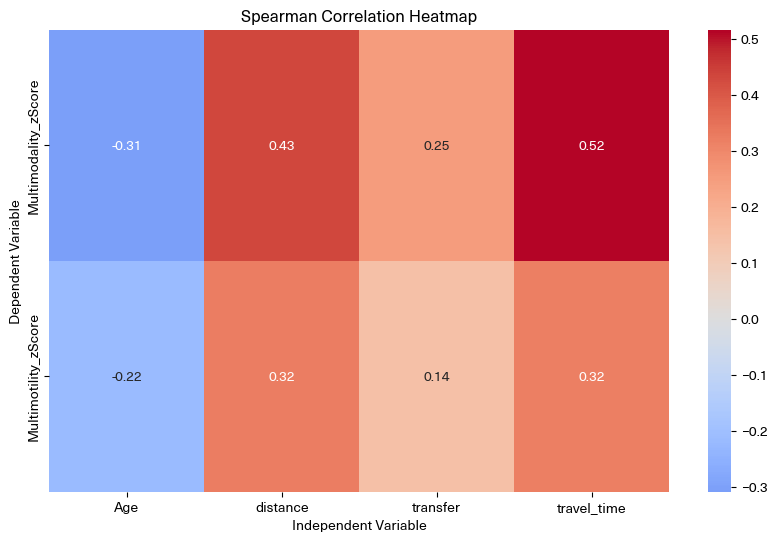

In [164]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# List of independent variables
independent_vars = ['distance', 'transfer', 'Age', 'travel_time']

# List of dependent variables
dependent_vars = ['Multimodality_zScore', 'Multimotility_zScore']

# Filter out rows where dependent variables are null
merged_dataset_clean = merged_dataset.dropna(subset=dependent_vars)

# Store results in a list of dictionaries
results = []

# Perform correlation tests
for dep in dependent_vars:
    for indep in independent_vars:
        # Drop rows with NaNs in the independent variable
        data_subset = merged_dataset_clean.dropna(subset=[indep])
        
        # Pearson Correlation
        pearson_corr, pearson_p = pearsonr(data_subset[indep], data_subset[dep])
        
        # Spearman Correlation
        spearman_corr, spearman_p = spearmanr(data_subset[indep], data_subset[dep])
        
        # Append results to the list
        results.append({
            'Dependent Variable': dep,
            'Independent Variable': indep,
            'Pearson Correlation': pearson_corr,
            'Spearman Correlation': spearman_corr
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Create pivot tables for heatmaps
pearson_pivot = results_df.pivot(index='Dependent Variable', columns='Independent Variable', values='Pearson Correlation')
spearman_pivot = results_df.pivot(index='Dependent Variable', columns='Independent Variable', values='Spearman Correlation')

# Plot Pearson Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_pivot, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Heatmap')
plt.show()

# Plot Spearman Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_pivot, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Heatmap')

# Define the output path
output_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\spearman_correlation_heatmap.pdf"

# Save the plot as a PDF
plt.savefig(output_path, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [165]:
# Update results to include correlations and p-values
results_with_p = []

for dep in dependent_vars:
    for indep in independent_vars:
        # Drop rows with NaNs in the independent variable
        data_subset = merged_dataset_clean.dropna(subset=[indep])
        
        # Pearson Correlation
        pearson_corr, pearson_p = pearsonr(data_subset[indep], data_subset[dep])
        
        # Spearman Correlation
        spearman_corr, spearman_p = spearmanr(data_subset[indep], data_subset[dep])
        
        # Append results to the list
        results_with_p.append({
            'Dependent Variable': dep,
            'Independent Variable': indep,
            'Pearson Correlation': pearson_corr,
            'Pearson P-Value': pearson_p,
            'Spearman Correlation': spearman_corr,
            'Spearman P-Value': spearman_p
        })

# Convert the updated results to a DataFrame
results_with_p_df = pd.DataFrame(results_with_p)

# Display the DataFrame in Jupyter Notebook
from IPython.display import display
display(results_with_p_df)

# Alternatively, use print() for non-Jupyter environments
print(results_with_p_df)


Dependent Variable Independent Variable  Pearson Correlation  \
0  Multimodality_zScore             distance             0.162605   
1  Multimodality_zScore             transfer             0.174383   
2  Multimodality_zScore                  Age            -0.243977   
3  Multimodality_zScore          travel_time             0.454493   
4  Multimotility_zScore             distance             0.219284   
5  Multimotility_zScore             transfer             0.112369   
6  Multimotility_zScore                  Age            -0.225603   
7  Multimotility_zScore          travel_time             0.335938   

   Pearson P-Value  Spearman Correlation  Spearman P-Value  
0     4.220853e-03              0.433959      1.416684e-15  
1     2.129643e-03              0.251288      8.044629e-06  
2     1.929367e-05             -0.309237      4.541199e-08  
3     8.450625e-17              0.516270      5.665276e-22  
4     1.044148e-04              0.324188      5.732129e-09  
5     4.880466e-02              0.143445      1.172684e-02  
6     8.074317e-05             -0.217349      1.480425e-04  
7     2.115146e-09              0.317614      1.666807e-08

     Dependent Variable Independent Variable  Pearson Correlation  \
0  Multimodality_zScore             distance             0.162605   
1  Multimodality_zScore             transfer             0.174383   
2  Multimodality_zScore                  Age            -0.243977   
3  Multimodality_zScore          travel_time             0.454493   
4  Multimotility_zScore             distance             0.219284   
5  Multimotility_zScore             transfer             0.112369   
6  Multimotility_zScore                  Age            -0.225603   
7  Multimotility_zScore          travel_time             0.335938   

   Pearson P-Value  Spearman Correlation  Spearman P-Value  
0     4.220853e-03              0.433959      1.416684e-15  
1     2.129643e-03              0.251288      8.044629e-06  
2     1.929367e-05             -0.309237      4.541199e-08  
3     8.450625e-17              0.516270      5.665276e-22  
4     1.044148e-04              0.324188      5.732129e-09  
5     4.8804

In [166]:
pearson_pivot

Independent Variable       Age  distance  transfer  travel_time
Dependent Variable                                             
Multimodality_zScore -0.243977  0.162605  0.174383     0.454493
Multimotility_zScore -0.225603  0.219284  0.112369     0.335938

In [167]:
spearman_pivot # the best to use as data is not normalized 

Independent Variable       Age  distance  transfer  travel_time
Dependent Variable                                             
Multimodality_zScore -0.309237  0.433959  0.251288     0.516270
Multimotility_zScore -0.217349  0.324188  0.143445     0.317614

In [168]:
import pandas as pd
from scipy.stats import spearmanr

# List of independent variables
independent_vars = ['distance', 'transfer', 'Age', 'travel_time']

# List of dependent variables
dependent_vars = ['Multimodality_zScore', 'Multimotility_zScore']

# Filter out rows where dependent variables are null
merged_dataset_clean = merged_dataset.dropna(subset=dependent_vars)

# Store results in a list of dictionaries
spearman_results = []

# Perform Spearman correlation tests
for dep in dependent_vars:
    for indep in independent_vars:
        # Drop rows with NaNs in the independent variable
        data_subset = merged_dataset_clean.dropna(subset=[indep])
        
        # Spearman Correlation with p-value
        spearman_corr, spearman_p = spearmanr(data_subset[indep], data_subset[dep])
        
        # Append results to the list
        spearman_results.append({
            'Dependent Variable': dep,
            'Independent Variable': indep,
            'Spearman Correlation': spearman_corr,
            'Spearman p-value': spearman_p
        })

# Convert results to a DataFrame
spearman_results_df = pd.DataFrame(spearman_results)
spearman_results_df

Dependent Variable Independent Variable  Spearman Correlation  \
0  Multimodality_zScore             distance              0.433959   
1  Multimodality_zScore             transfer              0.251288   
2  Multimodality_zScore                  Age             -0.309237   
3  Multimodality_zScore          travel_time              0.516270   
4  Multimotility_zScore             distance              0.324188   
5  Multimotility_zScore             transfer              0.143445   
6  Multimotility_zScore                  Age             -0.217349   
7  Multimotility_zScore          travel_time              0.317614   

   Spearman p-value  
0      1.416684e-15  
1      8.044629e-06  
2      4.541199e-08  
3      5.665276e-22  
4      5.732129e-09  
5      1.172684e-02  
6      1.480425e-04  
7      1.666807e-08

In [169]:
import numpy as np
import pandas as pd

def calculate_weights(df, corr_col='Spearman Correlation', pval_col='Spearman p-value'):
    """
    Calculate weights based on Spearman correlation and p-values.

    Parameters:
        df (pd.DataFrame): DataFrame containing correlation and p-value columns.
        corr_col (str): Name of the column containing Spearman correlation values.
        pval_col (str): Name of the column containing p-values.

    Returns:
        pd.DataFrame: Original DataFrame with additional 'Weight' column.
    """
    # Ensure correlation is in absolute terms
    df['Normalized Correlation'] = df[corr_col].abs()
    
    # Transform p-values using -log10(p-value) to emphasize smaller p-values
    df['Transformed p-value'] = -np.log10(df[pval_col])
    
    # Calculate the weights
    df['Weight'] = df['Normalized Correlation'] * df['Transformed p-value']
    
    return df


In [170]:
# Assuming spearman_results_df is your DataFrame
spearman_results_df = calculate_weights(spearman_results_df)

# Display the updated DataFrame with weights
print(spearman_results_df)


     Dependent Variable Independent Variable  Spearman Correlation  \
0  Multimodality_zScore             distance              0.433959   
1  Multimodality_zScore             transfer              0.251288   
2  Multimodality_zScore                  Age             -0.309237   
3  Multimodality_zScore          travel_time              0.516270   
4  Multimotility_zScore             distance              0.324188   
5  Multimotility_zScore             transfer              0.143445   
6  Multimotility_zScore                  Age             -0.217349   
7  Multimotility_zScore          travel_time              0.317614   

   Spearman p-value  Normalized Correlation  Transformed p-value     Weight  
0      1.416684e-15                0.433959            14.848727   6.443733  
1      8.044629e-06                0.251288             5.094494   1.280186  
2      4.541199e-08                0.309237             7.342829   2.270675  
3      5.665276e-22                0.516270            21

In [171]:
spearman_results_df

Dependent Variable Independent Variable  Spearman Correlation  \
0  Multimodality_zScore             distance              0.433959   
1  Multimodality_zScore             transfer              0.251288   
2  Multimodality_zScore                  Age             -0.309237   
3  Multimodality_zScore          travel_time              0.516270   
4  Multimotility_zScore             distance              0.324188   
5  Multimotility_zScore             transfer              0.143445   
6  Multimotility_zScore                  Age             -0.217349   
7  Multimotility_zScore          travel_time              0.317614   

   Spearman p-value  Normalized Correlation  Transformed p-value     Weight  
0      1.416684e-15                0.433959            14.848727   6.443733  
1      8.044629e-06                0.251288             5.094494   1.280186  
2      4.541199e-08                0.309237             7.342829   2.270675  
3      5.665276e-22                0.516270            21.246779  10.969071  
4      5.732129e-09                0.324188             8.241684   2.671854  
5      1.172684e-02                0.143445             1.930819   0.276966  
6      1.480425e-04                0.217349             3.829614   0.832361  
7      1.666807e-08                0.317614             7.778115   2.470436

# 5.7 Multimodality with Age- Travel Time- Distance - Transfer time

### 5.7.1 Age 

#### 5.7.1.1 Age vs Multimodality

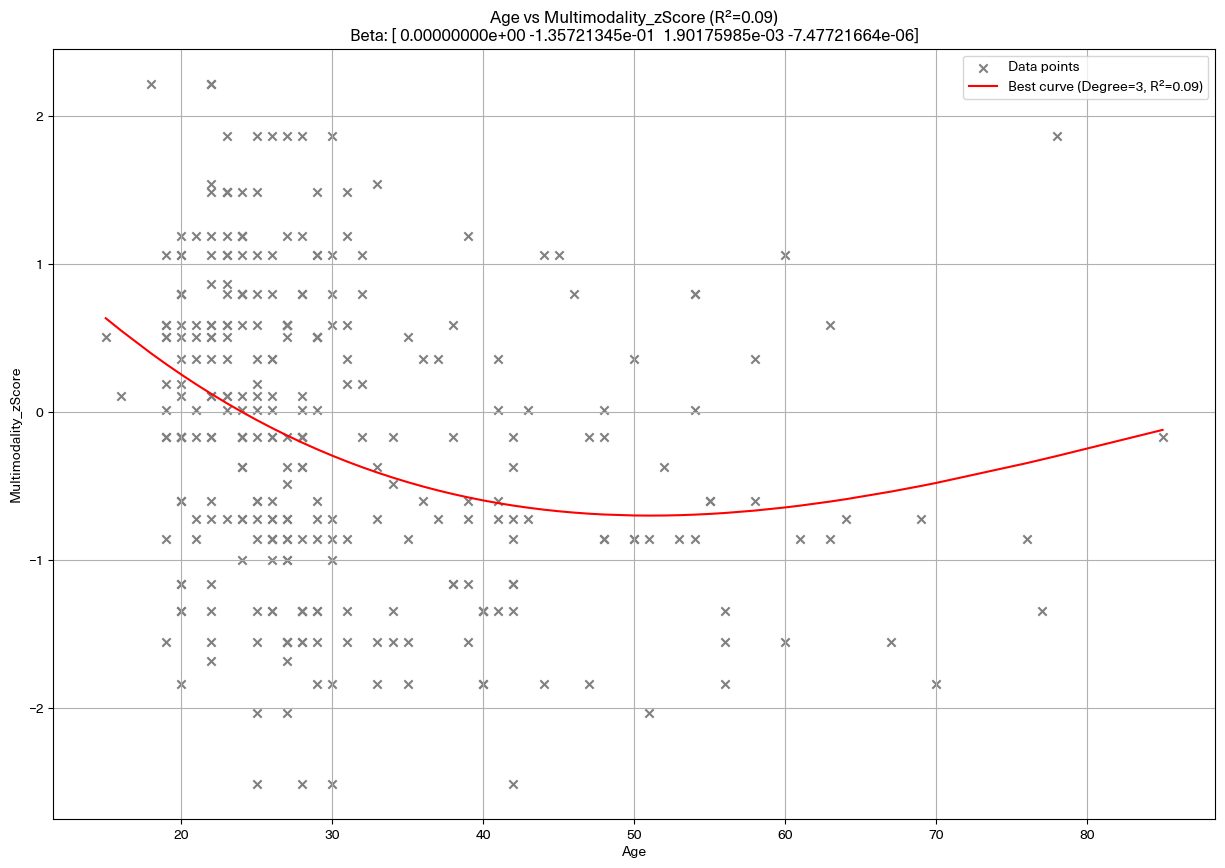

Plot saved to D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\Age_Multimodality_with_Beta.pdf
R²: 0.09
Beta coefficients: [ 0.00000000e+00 -1.35721345e-01  1.90175985e-03 -7.47721664e-06]


In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Function to find the best curve, calculate Beta, and save the plot
def plot_best_curve_and_save_with_beta(df, x_col, y_col, output_path):
    # Drop nulls and sort by the x-axis column
    df = df[[x_col, y_col]].dropna().sort_values(by=x_col)
    
    # Extract x and y values
    x = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values
    
    # Polynomial regression (degree 3)
    poly = PolynomialFeatures(degree=3)
    x_poly = poly.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    
    # Get Beta coefficients
    beta_coefficients = model.coef_
    
    # Plot the data and curve
    plt.figure(figsize=(15, 10))
    plt.scatter(x, y, color="gray", marker="x", label="Data points")  # Black 'x' markers for data points
    plt.plot(x, y_pred, color="red", label=f"Best curve (Degree=3, R²={r2:.2f})")
    plt.xlabel("Age")
    plt.ylabel("Multimodality_zScore")
    plt.title(f"Age vs Multimodality_zScore (R²={r2:.2f})\nBeta: {beta_coefficients}")
    plt.legend()
    plt.grid(True)
    
    # Save the plot as a PDF
    plt.savefig(output_path, format="pdf", bbox_inches="tight")
    plt.show()
    
    # Print results
    print(f"Plot saved to {output_path}")
    print(f"R²: {r2:.2f}")
    print(f"Beta coefficients: {beta_coefficients}")

# Define the output path
output_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\Age_Multimodality_with_Beta.pdf"

# Example usage
plot_best_curve_and_save_with_beta(merged_dataset, "Age", "Multimodality_zScore", output_path)


#### 5.7.1.2 Age vs Multimotility

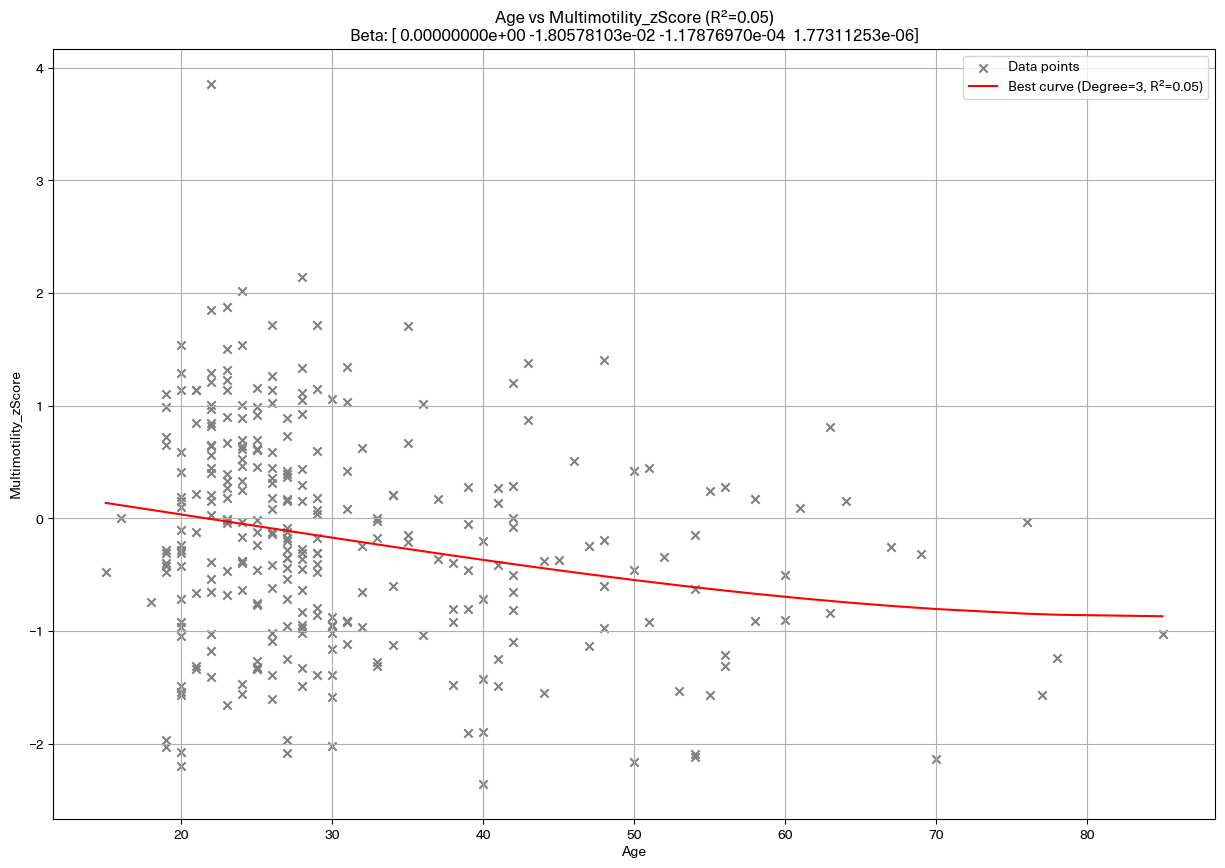

Plot saved to D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\Age_multimotility_with_Beta.pdf
R²: 0.05
Beta coefficients: [ 0.00000000e+00 -1.80578103e-02 -1.17876970e-04  1.77311253e-06]


In [177]:
# Function to find the best curve, calculate Beta, and save the plot
def plot_best_curve_and_save_with_beta(df, x_col, y_col, output_path):
    # Drop nulls and sort by the x-axis column
    df = df[[x_col, y_col]].dropna().sort_values(by=x_col)
    
    # Extract x and y values
    x = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values
    
    # Polynomial regression (degree 3)
    poly = PolynomialFeatures(degree=3)
    x_poly = poly.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    
    # Get Beta coefficients
    beta_coefficients = model.coef_
    
    # Plot the data and curve
    plt.figure(figsize=(15, 10))
    plt.scatter(x, y, color="gray", marker="x", label="Data points")  # Black 'x' markers for data points
    plt.plot(x, y_pred, color="red", label=f"Best curve (Degree=3, R²={r2:.2f})")
    plt.xlabel("Age")
    plt.ylabel("Multimotility_zScore")
    plt.title(f"Age vs Multimotility_zScore (R²={r2:.2f})\nBeta: {beta_coefficients}")
    plt.legend()
    plt.grid(True)
    
    # Save the plot as a PDF
    plt.savefig(output_path, format="pdf", bbox_inches="tight")
    plt.show()
    
    # Print results
    print(f"Plot saved to {output_path}")
    print(f"R²: {r2:.2f}")
    print(f"Beta coefficients: {beta_coefficients}")

# Define the output path
output_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\Age_multimotility_with_Beta.pdf"

# Example usage
plot_best_curve_and_save_with_beta(merged_dataset, "Age", "Multimotility_zScore", output_path)


### 5.7.2 Distance

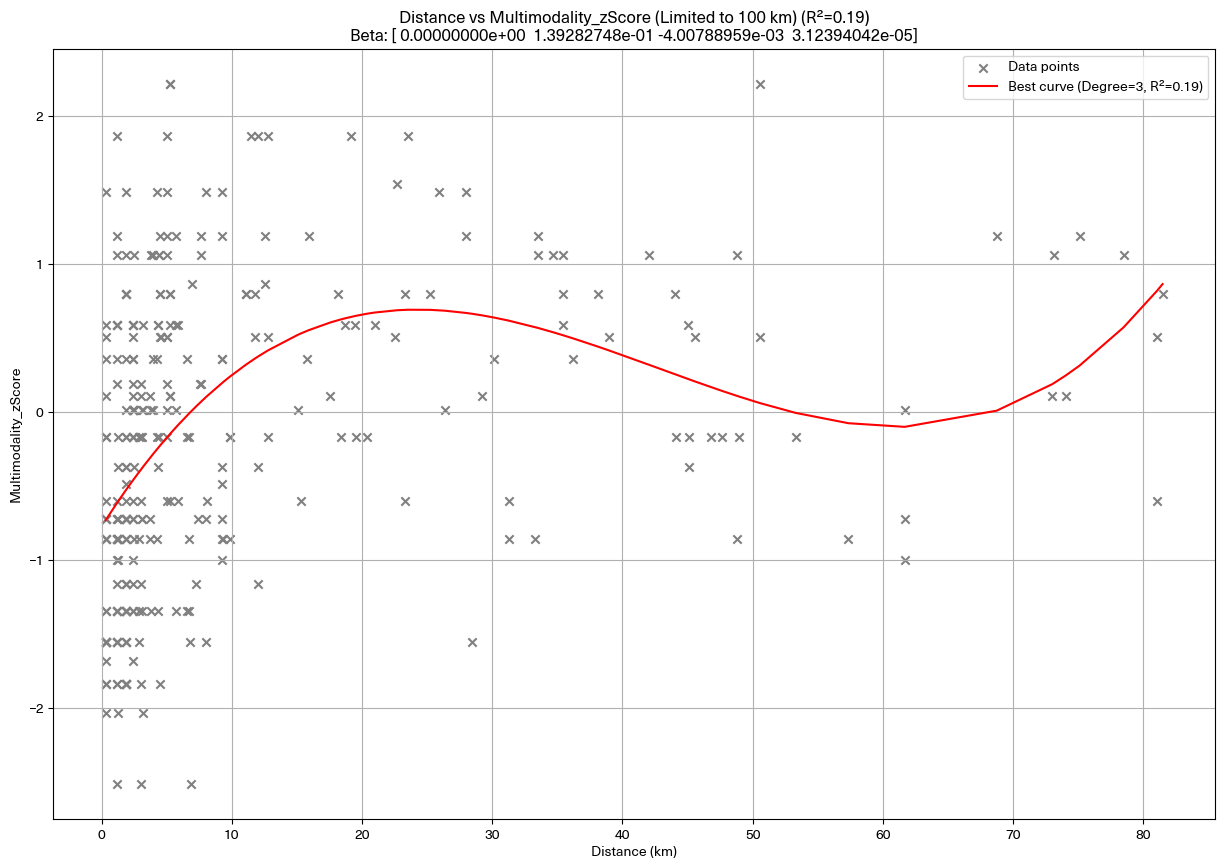

Plot saved to D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\Distance_Multimodality_with_Beta.pdf
R²: 0.19
Beta coefficients: [ 0.00000000e+00  1.39282748e-01 -4.00788959e-03  3.12394042e-05]


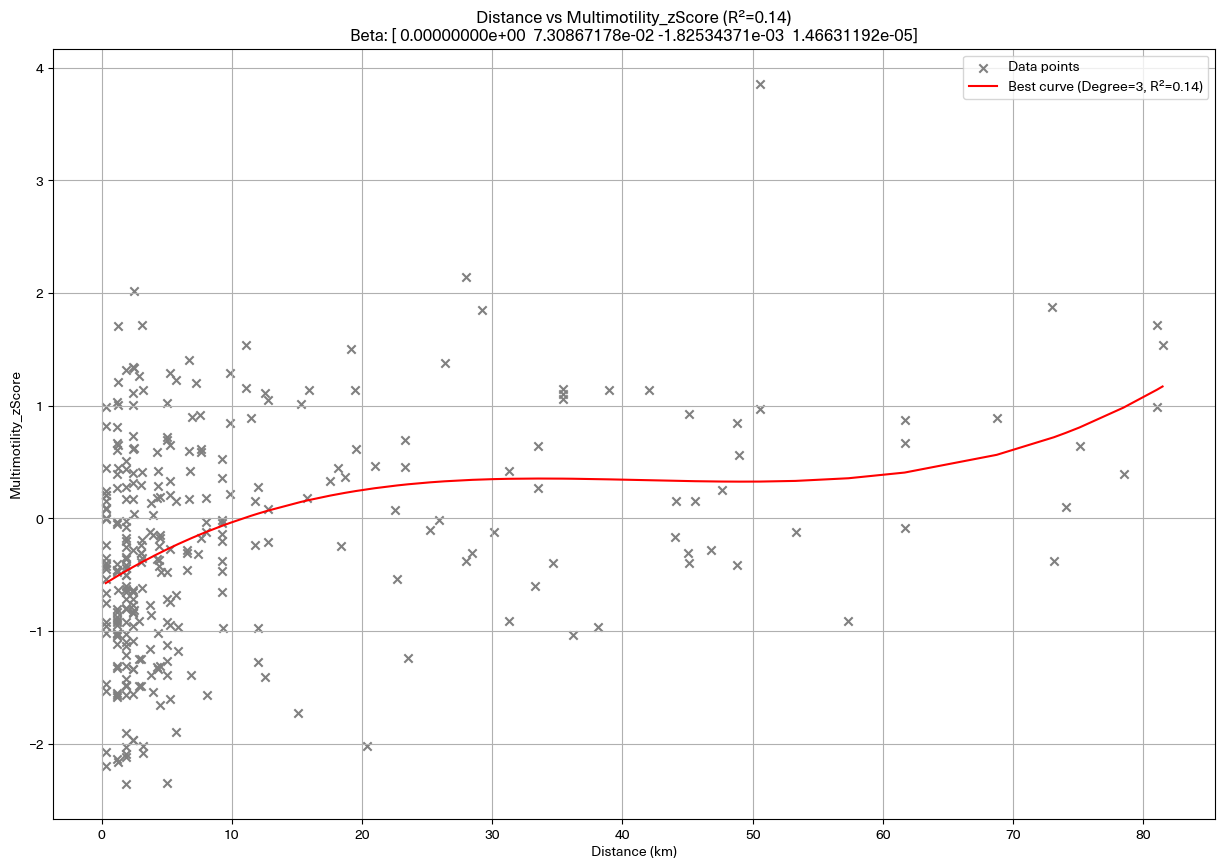

Plot saved to D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\Distance_Multimotility_with_Beta.pdf
R²: 0.14
Beta coefficients: [ 0.00000000e+00  7.30867178e-02 -1.82534371e-03  1.46631192e-05]


In [179]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Function to find the best curve, calculate Beta, and save the plot
def plot_best_curve_and_save_with_beta(df, x_col, y_col, xlabel, ylabel, title, output_path, distance_limit=None):
    # Filter the dataset if a distance limit is specified
    if distance_limit is not None:
        df = df[df[x_col] <= distance_limit]
    
    # Drop nulls and sort by the x-axis column
    df = df[[x_col, y_col]].dropna().sort_values(by=x_col)
    
    # Extract x and y values
    x = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values
    
    # Polynomial regression (degree 3)
    poly = PolynomialFeatures(degree=3)
    x_poly = poly.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    
    # Get Beta coefficients
    beta_coefficients = model.coef_
    
    # Plot the data and curve
    plt.figure(figsize=(15, 10))
    plt.scatter(x, y, color="gray", marker="x", label="Data points")  # Gray 'x' markers for data points
    plt.plot(x, y_pred, color="red", label=f"Best curve (Degree=3, R²={r2:.2f})")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{title} (R²={r2:.2f})\nBeta: {beta_coefficients}")
    plt.legend()
    plt.grid(True)
    
    # Save the plot as a PDF
    plt.savefig(output_path, format="pdf", bbox_inches="tight")
    plt.show()
    
    # Print results
    print(f"Plot saved to {output_path}")
    print(f"R²: {r2:.2f}")
    print(f"Beta coefficients: {beta_coefficients}")

# Define the output paths
output_path1 = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\Distance_Multimodality_with_Beta.pdf"
output_path2 = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\Distance_Multimotility_with_Beta.pdf"

# Create the first graph: Distance vs Multimodality_zScore (limiting distance to 100 km)
plot_best_curve_and_save_with_beta(
    df=merged_dataset,
    x_col="distance",
    y_col="Multimodality_zScore",
    xlabel="Distance (km)",
    ylabel="Multimodality_zScore",
    title="Distance vs Multimodality_zScore (Limited to 100 km)",
    output_path=output_path1,
    distance_limit=100  # Limit distance to 100 km
)

# Create the second graph: Distance vs Multimotility_zScore (limiting distance to 100 km)
plot_best_curve_and_save_with_beta(
    df=merged_dataset,
    x_col="distance",
    y_col="Multimotility_zScore",
    xlabel="Distance (km)",
    ylabel="Multimotility_zScore",
    title="Distance vs Multimotility_zScore",
    output_path=output_path2,
    distance_limit=100  # Limit distance to 100 km
)


### 5.7.3 Travel time 

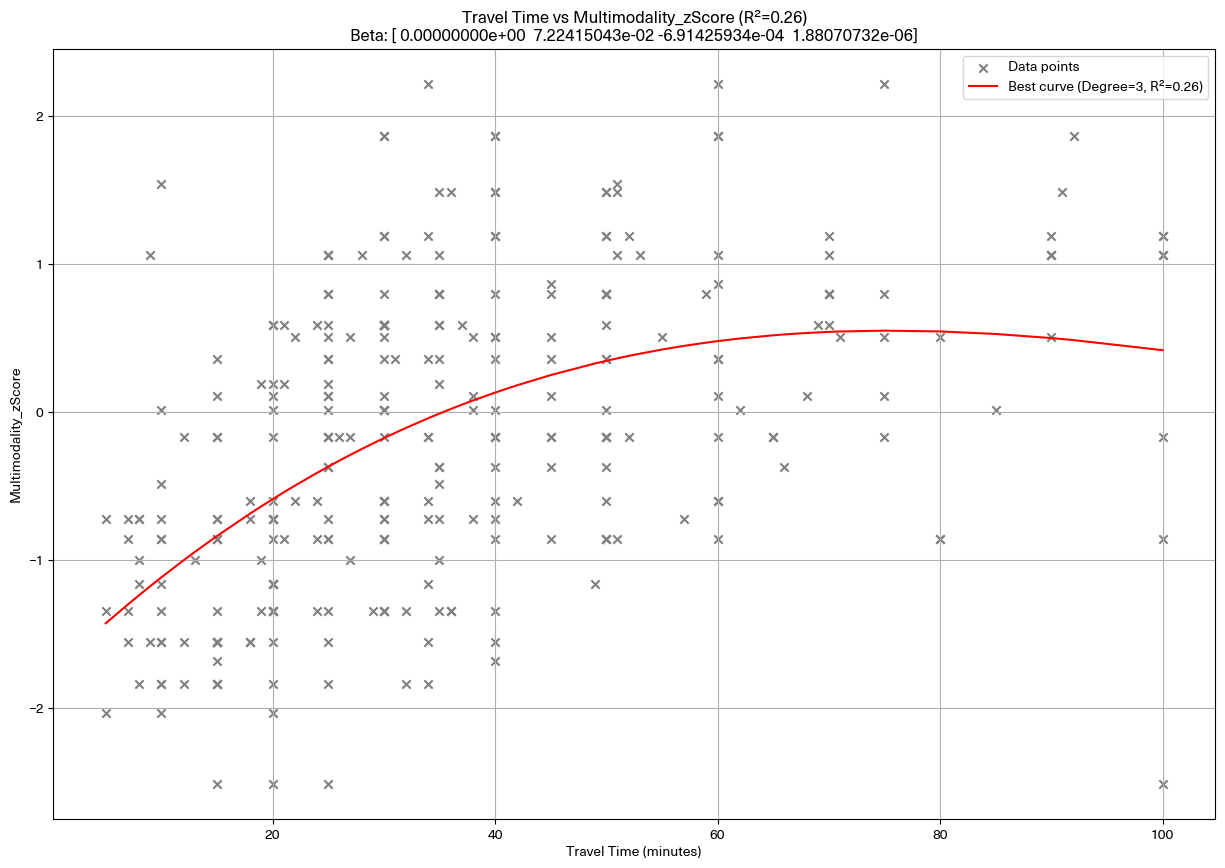

Plot saved to D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\TravelTime_Multimodality_with_Beta.pdf
R²: 0.26
Beta coefficients: [ 0.00000000e+00  7.22415043e-02 -6.91425934e-04  1.88070732e-06]


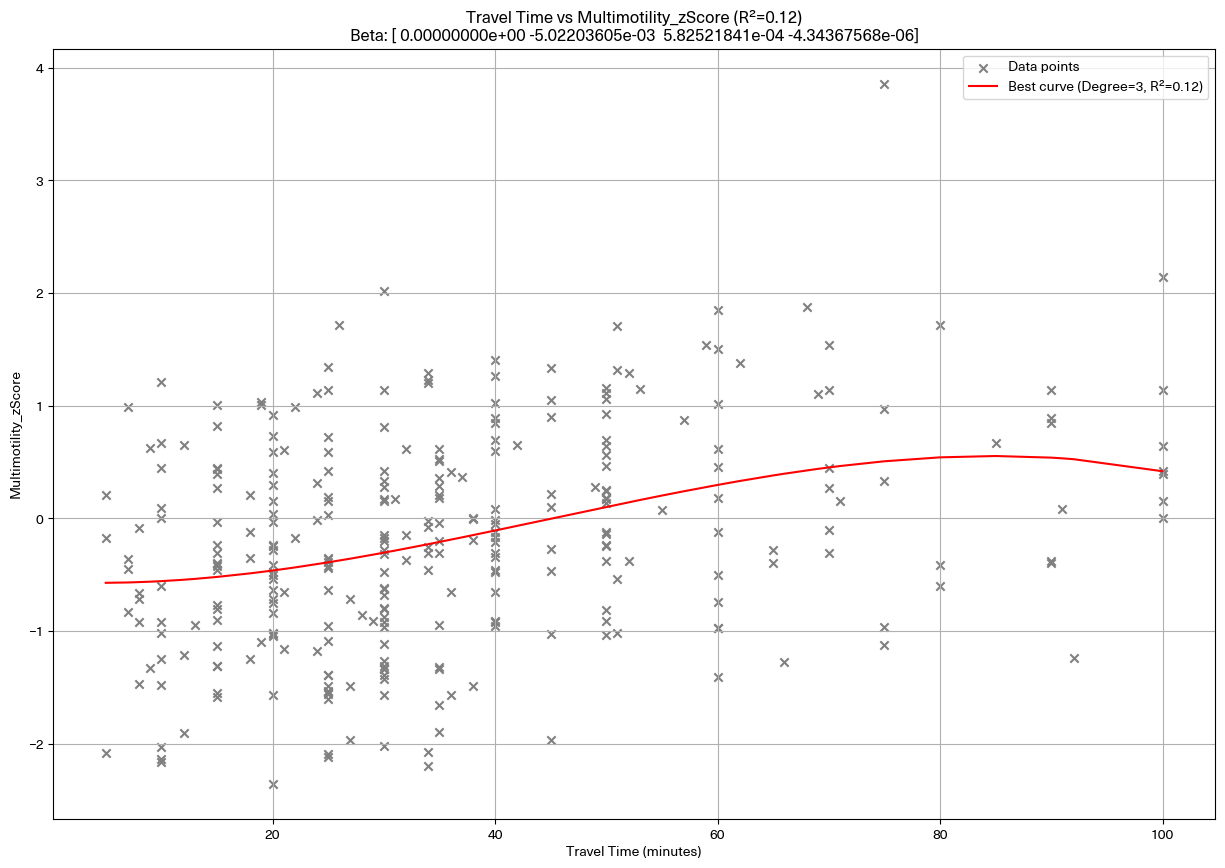

Plot saved to D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\TravelTime_Multimotility_with_Beta.pdf
R²: 0.12
Beta coefficients: [ 0.00000000e+00 -5.02203605e-03  5.82521841e-04 -4.34367568e-06]


In [181]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Function to find the best curve, calculate Beta, and save the plot
def plot_best_curve_and_save_with_beta(df, x_col, y_col, xlabel, ylabel, title, output_path):
    # Drop nulls and sort by the x-axis column
    df = df[[x_col, y_col]].dropna().sort_values(by=x_col)
    
    # Extract x and y values
    x = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values
    
    # Polynomial regression (degree 3)
    poly = PolynomialFeatures(degree=3)
    x_poly = poly.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    
    # Get Beta coefficients
    beta_coefficients = model.coef_
    
    # Plot the data and curve
    plt.figure(figsize=(15, 10))
    plt.scatter(x, y, color="gray", marker="x", label="Data points")  # Gray 'x' markers for data points
    plt.plot(x, y_pred, color="red", label=f"Best curve (Degree=3, R²={r2:.2f})")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{title} (R²={r2:.2f})\nBeta: {beta_coefficients}")
    plt.legend()
    plt.grid(True)
    
    # Save the plot as a PDF
    plt.savefig(output_path, format="pdf", bbox_inches="tight")
    plt.show()
    
    # Print results
    print(f"Plot saved to {output_path}")
    print(f"R²: {r2:.2f}")
    print(f"Beta coefficients: {beta_coefficients}")

# Define the output paths
output_path1 = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\TravelTime_Multimodality_with_Beta.pdf"
output_path2 = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\TravelTime_Multimotility_with_Beta.pdf"

# Create the first graph: TravelTime vs Multimodality_zScore
plot_best_curve_and_save_with_beta(
    df=merged_dataset,
    x_col="travel_time",
    y_col="Multimodality_zScore",
    xlabel="Travel Time (minutes)",
    ylabel="Multimodality_zScore",
    title="Travel Time vs Multimodality_zScore",
    output_path=output_path1
)

# Create the second graph: TravelTime vs Multimotility_zScore
plot_best_curve_and_save_with_beta(
    df=merged_dataset,
    x_col="travel_time",
    y_col="Multimotility_zScore",
    xlabel="Travel Time (minutes)",
    ylabel="Multimotility_zScore",
    title="Travel Time vs Multimotility_zScore",
    output_path=output_path2
)


### 5.7.4 Waiting time

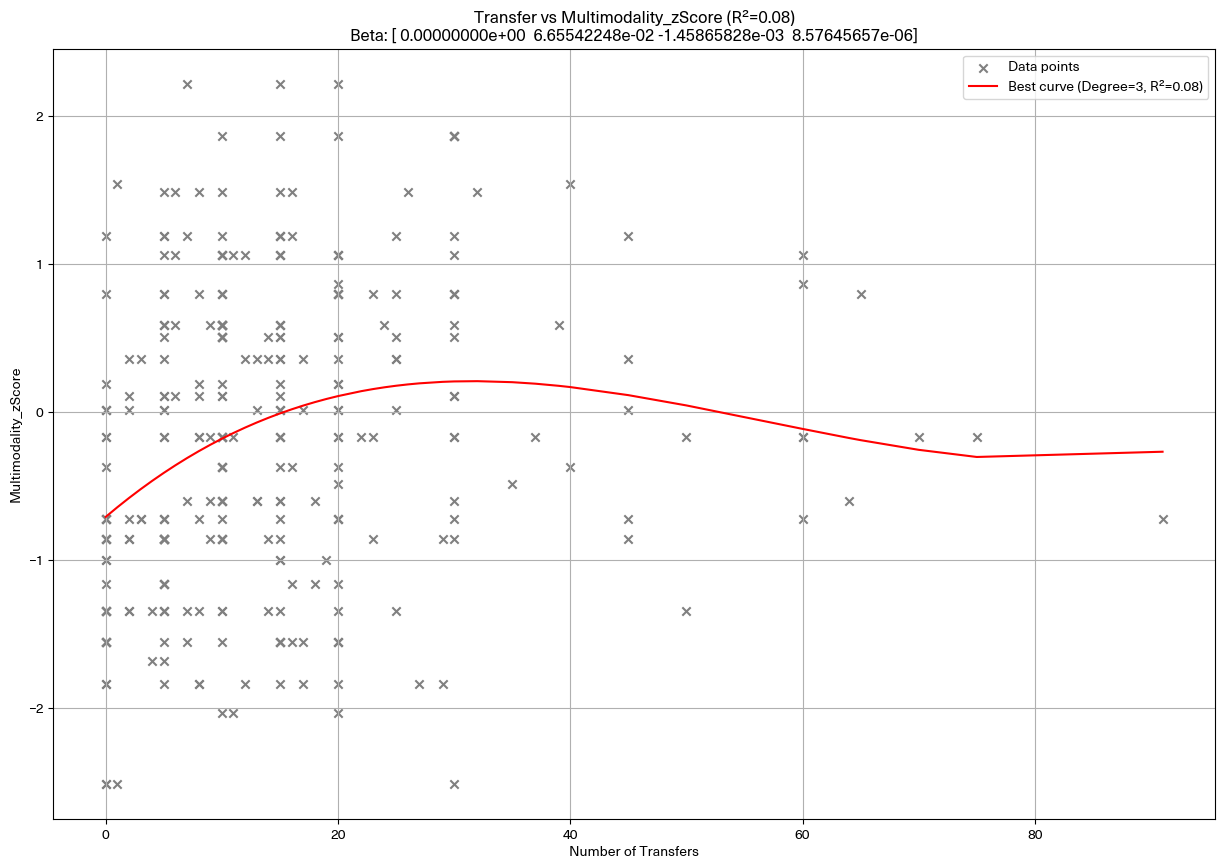

Plot saved to D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\Transfer_Multimodality_with_Beta.pdf
R²: 0.08
Beta coefficients: [ 0.00000000e+00  6.65542248e-02 -1.45865828e-03  8.57645657e-06]


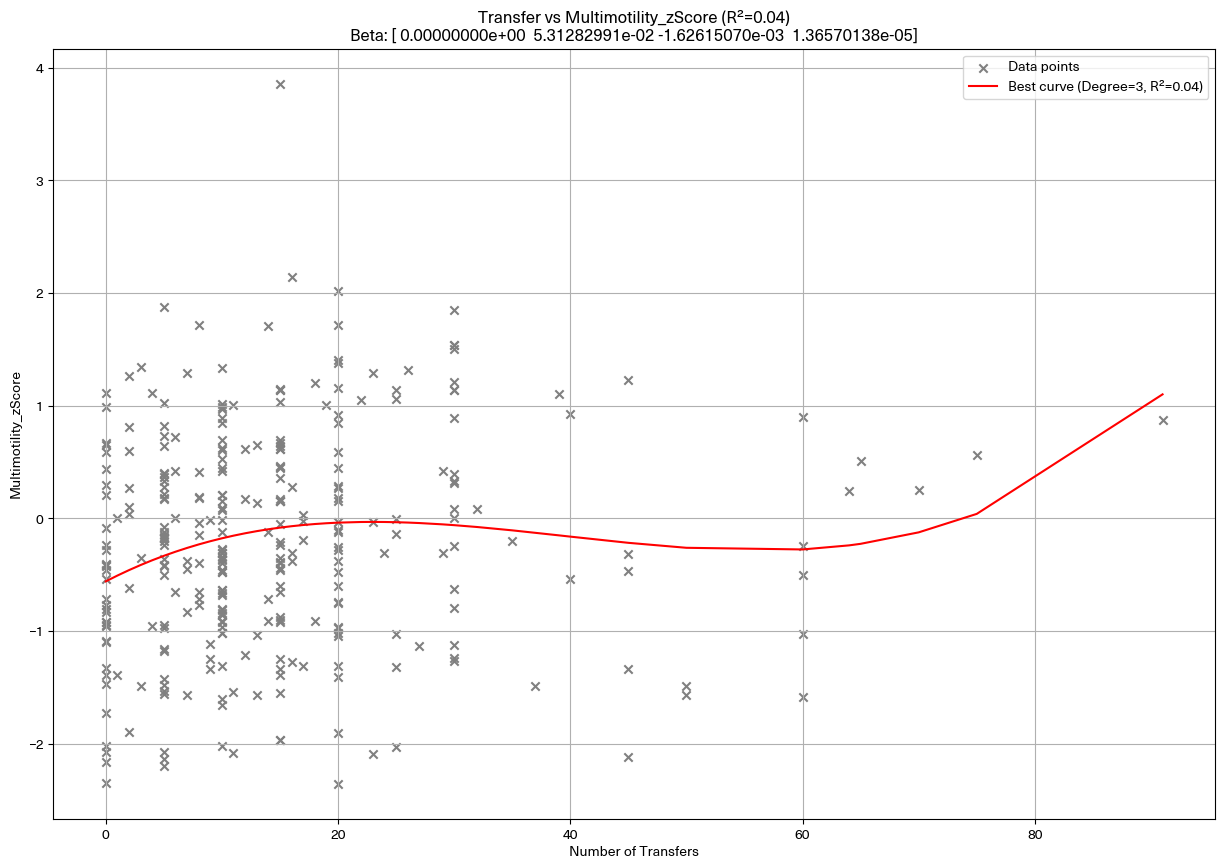

Plot saved to D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\Transfer_Multimotility_with_Beta.pdf
R²: 0.04
Beta coefficients: [ 0.00000000e+00  5.31282991e-02 -1.62615070e-03  1.36570138e-05]


In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Function to find the best curve, calculate Beta, and save the plot
def plot_best_curve_and_save_with_beta(df, x_col, y_col, xlabel, ylabel, title, output_path):
    # Drop nulls and sort by the x-axis column
    df = df[[x_col, y_col]].dropna().sort_values(by=x_col)
    
    # Extract x and y values
    x = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values
    
    # Polynomial regression (degree 3)
    poly = PolynomialFeatures(degree=3)
    x_poly = poly.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    
    # Get Beta coefficients
    beta_coefficients = model.coef_
    
    # Plot the data and curve
    plt.figure(figsize=(15, 10))
    plt.scatter(x, y, color="gray", marker="x", label="Data points")  # Gray 'x' markers for data points
    plt.plot(x, y_pred, color="red", label=f"Best curve (Degree=3, R²={r2:.2f})")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{title} (R²={r2:.2f})\nBeta: {beta_coefficients}")
    plt.legend()
    plt.grid(True)
    
    # Save the plot as a PDF
    plt.savefig(output_path, format="pdf", bbox_inches="tight")
    plt.show()
    
    # Print results
    print(f"Plot saved to {output_path}")
    print(f"R²: {r2:.2f}")
    print(f"Beta coefficients: {beta_coefficients}")

# Define the output paths
output_path1 = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\Transfer_Multimodality_with_Beta.pdf"
output_path2 = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\Transfer_Multimotility_with_Beta.pdf"

# Create the first graph: Transfer vs Multimodality_zScore
plot_best_curve_and_save_with_beta(
    df=merged_dataset,
    x_col="transfer",
    y_col="Multimodality_zScore",
    xlabel="Number of Transfers",
    ylabel="Multimodality_zScore",
    title="Transfer vs Multimodality_zScore",
    output_path=output_path1
)

# Create the second graph: Transfer vs Multimotility_zScore
plot_best_curve_and_save_with_beta(
    df=merged_dataset,
    x_col="transfer",
    y_col="Multimotility_zScore",
    xlabel="Number of Transfers",
    ylabel="Multimotility_zScore",
    title="Transfer vs Multimotility_zScore",
    output_path=output_path2
)


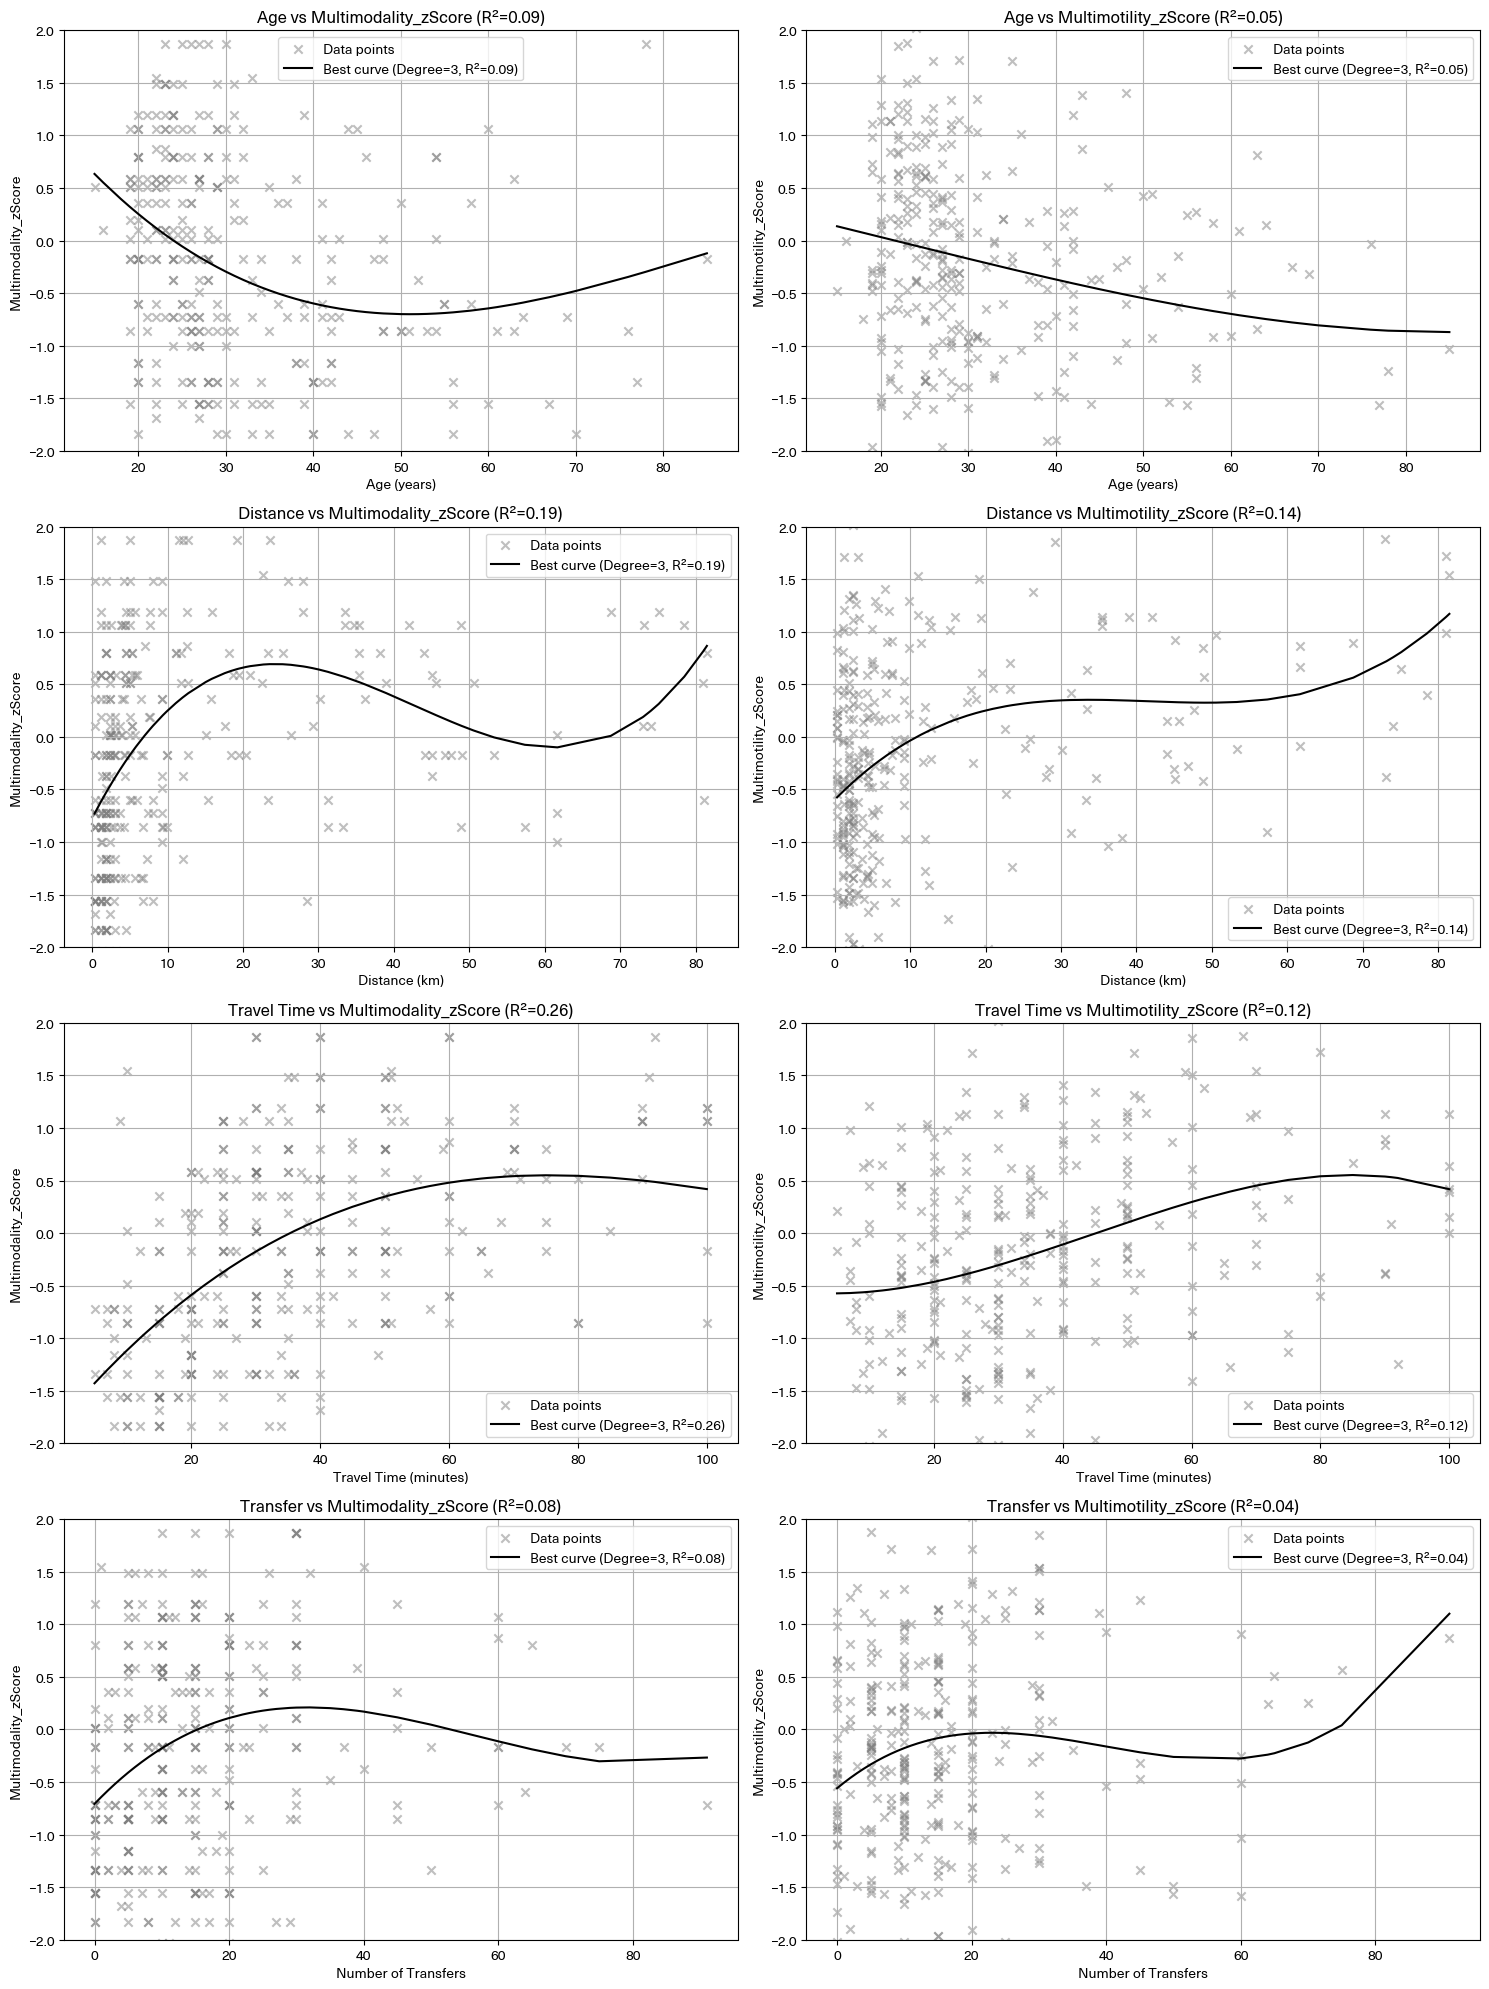

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Function to plot paired comparisons for multimodality and multimotility
def plot_comparisons(df, x_cols, y_cols, titles, xlabels, ylabels, output_path, distance_limit=None, y_limit=None):
    # Initialize the figure
    plt.figure(figsize=(15, 20))  # Adjust figure size for 4 rows x 2 columns
    
    for i, x_col in enumerate(x_cols):
        for j, y_col in enumerate(y_cols):
            # Apply distance filter if x_col is 'distance'
            if distance_limit is not None and x_col == "distance":
                data = df[df[x_col] <= distance_limit][[x_col, y_col]].dropna().sort_values(by=x_col)
            else:
                data = df[[x_col, y_col]].dropna().sort_values(by=x_col)
            
            # Extract x and y values
            x = data[x_col].values.reshape(-1, 1)
            y = data[y_col].values

            # Polynomial regression (degree 3)
            poly = PolynomialFeatures(degree=3)
            x_poly = poly.fit_transform(x)
            model = LinearRegression()
            model.fit(x_poly, y)
            y_pred = model.predict(x_poly)
            
            # Calculate R²
            r2 = r2_score(y, y_pred)
            
            # Create subplot
            plt.subplot(len(x_cols), 2, i * 2 + j + 1)
            plt.scatter(x, y, color="gray", marker="x", alpha=0.5, label="Data points")  # Add alpha for transparency
            plt.plot(x, y_pred, color="black", label=f"Best curve (Degree=3, R²={r2:.2f})")
            plt.xlabel(xlabels[i])
            plt.ylabel(ylabels[j])
            plt.title(f"{titles[i][j]} (R²={r2:.2f})")
            if y_limit is not None:
                plt.ylim(y_limit)  # Set fixed y-axis limits
            plt.legend()
            plt.grid(True)
    
    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig(output_path, format="pdf", bbox_inches="tight")
    plt.show()

# Input variables
x_cols = ["Age", "distance", "travel_time", "transfer"]
y_cols = ["Multimodality_zScore", "Multimotility_zScore"]
titles = [
    ["Age vs Multimodality_zScore", "Age vs Multimotility_zScore"],
    ["Distance vs Multimodality_zScore", "Distance vs Multimotility_zScore"],
    ["Travel Time vs Multimodality_zScore", "Travel Time vs Multimotility_zScore"],
    ["Transfer vs Multimodality_zScore", "Transfer vs Multimotility_zScore"]
]
xlabels = ["Age (years)", "Distance (km)", "Travel Time (minutes)", "Number of Transfers"]
ylabels = ["Multimodality_zScore", "Multimotility_zScore"]

# Output path
output_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\writings\Figures\Figure_5.pdf"

# Distance limit in kilometers
distance_limit = 100  # Limit distance to 100 km

# Y-axis limit for visualization
y_limit = (-2, 2)  # Set the same range for both z-scores for visual comparison

# Plot and save the figure
plot_comparisons(
    df=merged_dataset,
    x_cols=x_cols,
    y_cols=y_cols,
    titles=titles,
    xlabels=xlabels,
    ylabels=ylabels,
    output_path=output_path,
    distance_limit=distance_limit,
    y_limit=y_limit
)

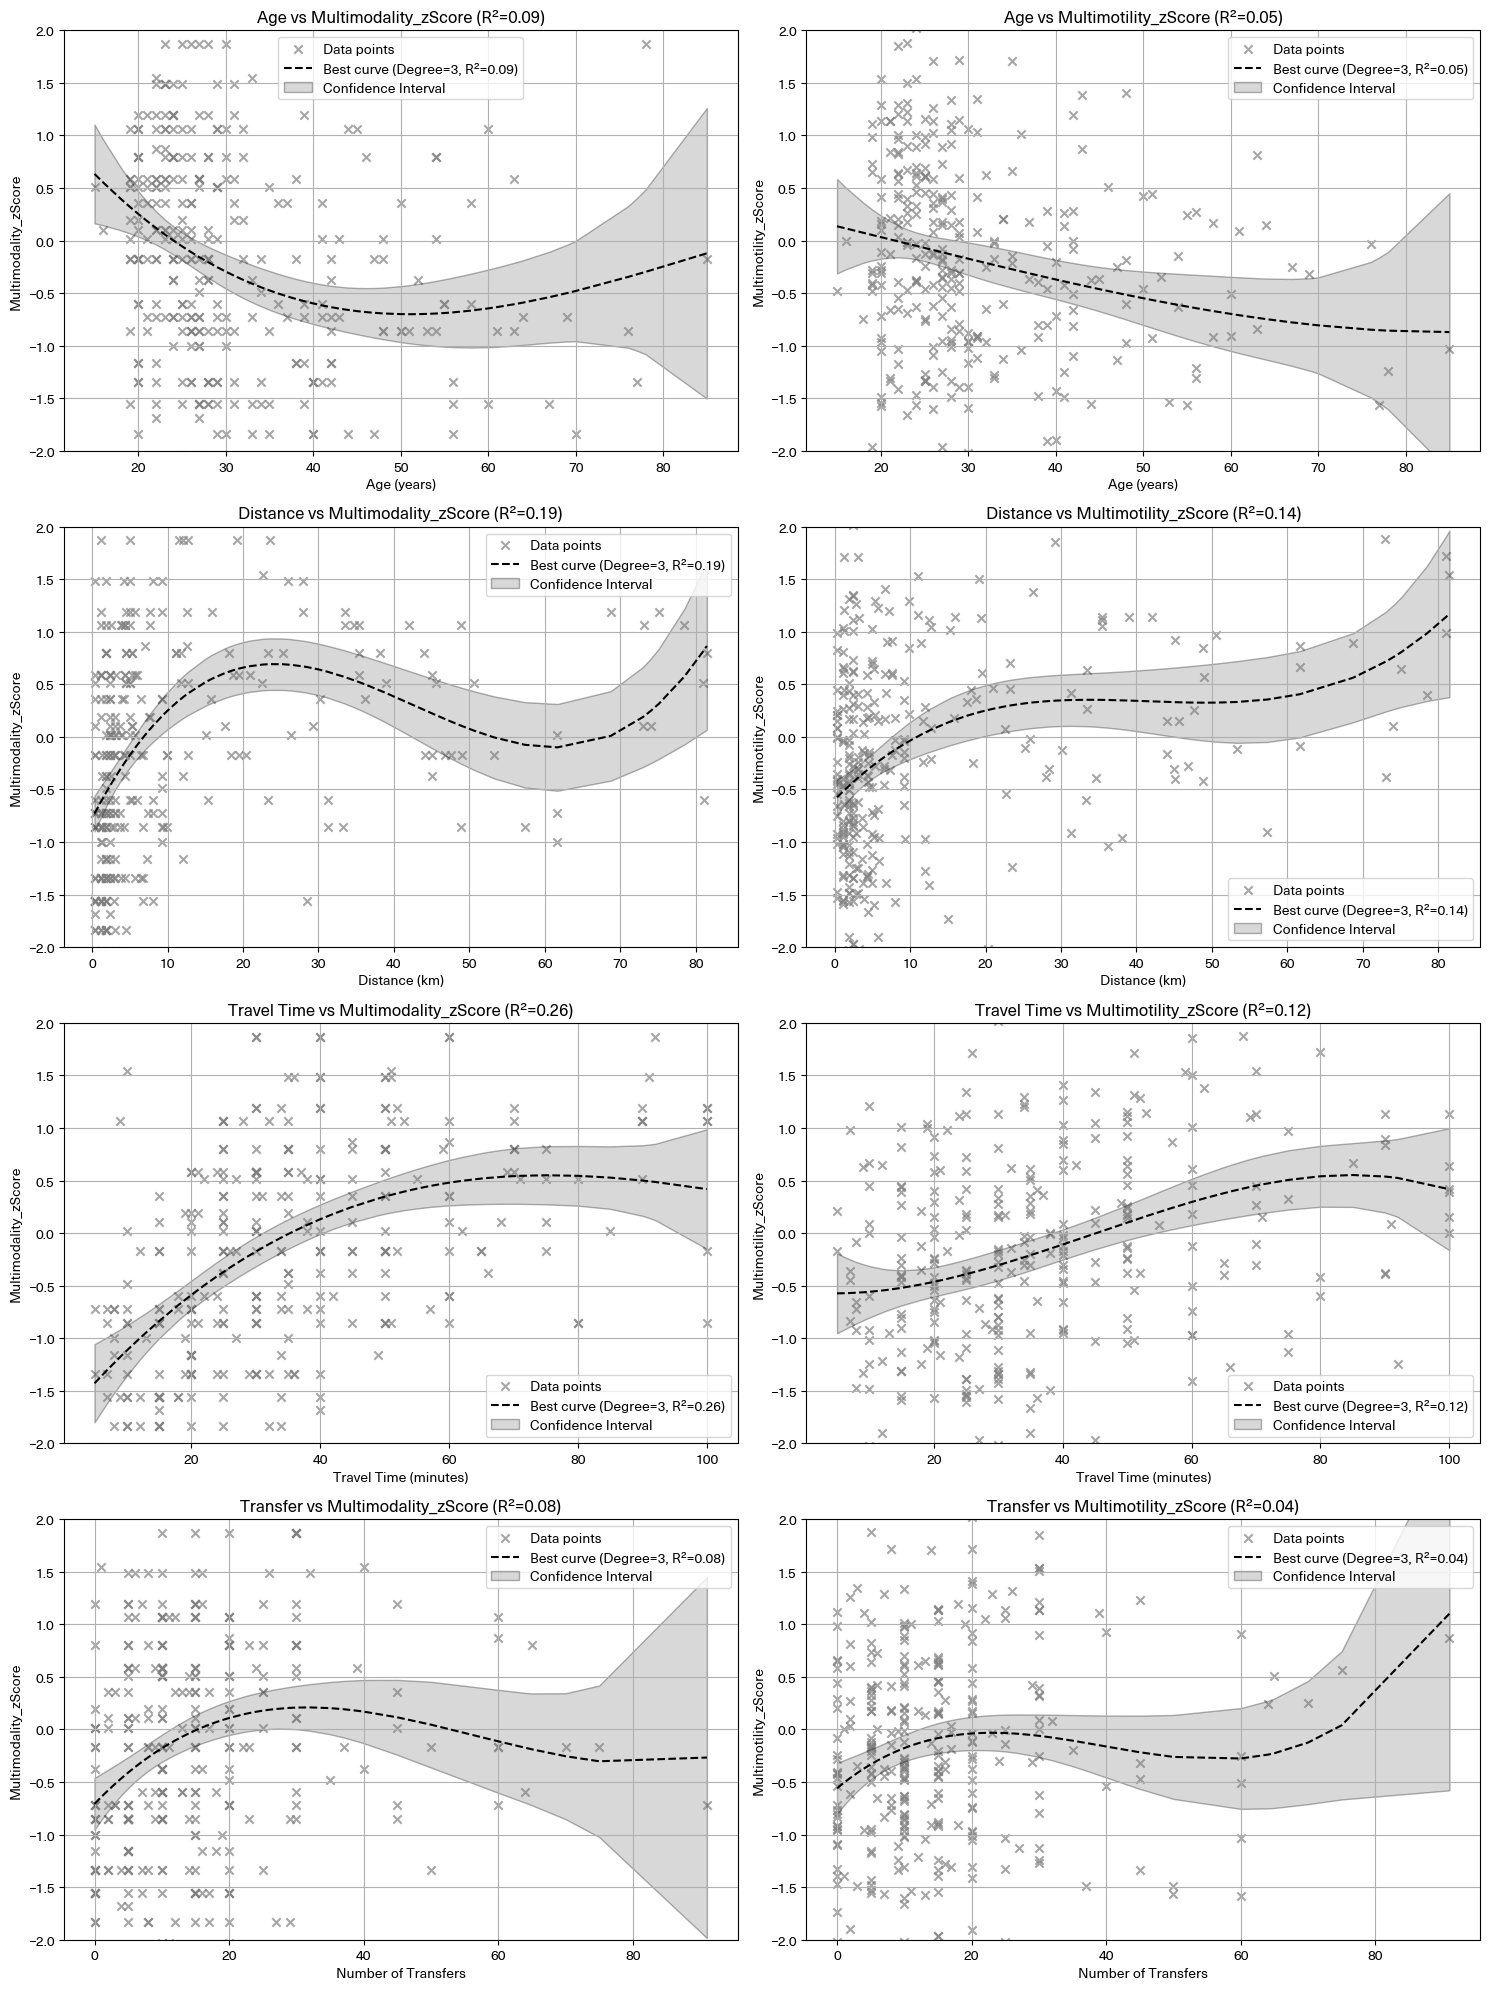

    X Variable            Y Variable        R²  Confidence Interval Alpha
0          Age  Multimodality_zScore  0.092860                       0.95
1          Age  Multimotility_zScore  0.051719                       0.95
2     distance  Multimodality_zScore  0.189420                       0.95
3     distance  Multimotility_zScore  0.136320                       0.95
4  travel_time  Multimodality_zScore  0.263984                       0.95
5  travel_time  Multimotility_zScore  0.119481                       0.95
6     transfer  Multimodality_zScore  0.076970                       0.95
7     transfer  Multimotility_zScore  0.035225                       0.95


<Figure size 640x480 with 0 Axes>

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t
import pandas as pd

# Function to calculate and plot with confidence intervals
def plot_with_confidence_intervals_and_table(
    df, x_cols, y_cols, titles, xlabels, ylabels, output_path, distance_limit=None, y_limit=None, alpha=0.95
):
    # Initialize the figure
    plt.figure(figsize=(15, 20))  # Adjust figure size for 4 rows x 2 columns
    results_table = []  # Table to store R² and model details for each plot

    for i, x_col in enumerate(x_cols):
        for j, y_col in enumerate(y_cols):
            # Apply distance filter if x_col is 'distance'
            if distance_limit is not None and x_col == "distance":
                data = df[df[x_col] <= distance_limit][[x_col, y_col]].dropna().sort_values(by=x_col)
            else:
                data = df[[x_col, y_col]].dropna().sort_values(by=x_col)

            # Extract x and y values
            x = data[x_col].values.reshape(-1, 1)
            y = data[y_col].values

            # Polynomial regression (degree 3)
            poly = PolynomialFeatures(degree=3)
            x_poly = poly.fit_transform(x)
            model = LinearRegression()
            model.fit(x_poly, y)
            y_pred = model.predict(x_poly)

            # Calculate confidence intervals
            residuals = y - y_pred
            dof = len(y) - len(model.coef_)
            residual_std_error = np.sqrt(np.sum(residuals**2) / dof)
            t_value = t.ppf(1 - (1 - alpha) / 2, df=dof)
            x_poly_inv = np.linalg.inv(x_poly.T @ x_poly)  # Inverse of design matrix
            se = np.sqrt(np.sum((x_poly @ x_poly_inv) * x_poly, axis=1)) * residual_std_error
            ci_upper = y_pred + t_value * se
            ci_lower = y_pred - t_value * se

            # Calculate R²
            r2 = r2_score(y, y_pred)

            # Add results to the table
            results_table.append({
                "X Variable": x_col,
                "Y Variable": y_col,
                "R²": r2,
                "Confidence Interval Alpha": alpha
            })

            # Create subplot
            plt.subplot(len(x_cols), 2, i * 2 + j + 1)
            plt.scatter(x, y, color="gray", marker="x", alpha=0.7, label="Data points")  # Add alpha for transparency
            plt.plot(x, y_pred, color="black", linestyle="--", label=f"Best curve (Degree=3, R²={r2:.2f})")
            plt.fill_between(
                x.flatten(), ci_lower, ci_upper, color="gray", alpha=0.3, edgecolor="black", label="Confidence Interval"
            )
            plt.xlabel(xlabels[i])
            plt.ylabel(ylabels[j])
            plt.title(f"{titles[i][j]} (R²={r2:.2f})")
            if y_limit is not None:
                plt.ylim(y_limit)  # Set fixed y-axis limits
            plt.legend()
            plt.grid(True)

    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig(output_path, format="pdf", bbox_inches="tight")
    plt.show()

    # Convert results table to a DataFrame and display
    results_df = pd.DataFrame(results_table)
    return results_df

# Input variables
x_cols = ["Age", "distance", "travel_time", "transfer"]
y_cols = ["Multimodality_zScore", "Multimotility_zScore"]
titles = [
    ["Age vs Multimodality_zScore", "Age vs Multimotility_zScore"],
    ["Distance vs Multimodality_zScore", "Distance vs Multimotility_zScore"],
    ["Travel Time vs Multimodality_zScore", "Travel Time vs Multimotility_zScore"],
    ["Transfer vs Multimodality_zScore", "Transfer vs Multimotility_zScore"]
]
xlabels = ["Age (years)", "Distance (km)", "Travel Time (minutes)", "Number of Transfers"]
ylabels = ["Multimodality_zScore", "Multimotility_zScore"]

# Output path
output_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\Presi\20-12-2024-Prof.Simone\Comparison_All_Variables_Confidence_Intervals.pdf"

# Distance limit in kilometers
distance_limit = 100  # Limit distance to 100 km

# Y-axis limit for visualization
y_limit = (-2, 2)  # Set the same range for both z-scores for visual comparison

# Run the function
# Replace `merged_dataset` with your actual DataFrame
results_df = plot_with_confidence_intervals_and_table(
    df=merged_dataset,
    x_cols=x_cols,
    y_cols=y_cols,
    titles=titles,
    xlabels=xlabels,
    ylabels=ylabels,
    output_path=output_path,
    distance_limit=distance_limit,
    y_limit=y_limit
)

# Display the table using standard Python methods
print(results_df)

# Optional: Save the table to a CSV file
results_df.to_csv("Confidence_Interval_Results_Table.csv", index=False)

plt.savefig(output_path, format="pdf", bbox_inches="tight")



# Blocked and Compulsorty Multimodality

In [187]:
merged_result.rename(columns={
    'What do you suggest to add to the transport stop you use to enhance its quality? - Selected Choice': 'suggested_node',
    'Nearby the transport stop you selected, what mobility services could be added to the station to enhance its quality? - Selected Choice': 'suggest_lastmile'
}, inplace=True)

In [188]:
merged_result = pd.merge(
    merged_result,
    filtered_data[['Response ID',
                   'What is the highest educational level you have achieved? - Selected Choice',
                   'What is your employee status? - Selected Choice',
                   'Considering the time you spend traveling in your working week, what activity do you spend the most time traveling for?  You can select multiple answers.']],
    on='Response ID',  
    how='inner'
)


In [189]:
print(merged_dataset.columns)

Index(['Response ID', 'Multimodality_zScore', 'Multimotility_zScore', 'Color',
       'Category', 'Type', 'distance', 'CAP_Location', 'distance_class',
       'CAP_Rank', 'Gender', 'transfer', 'Age', 'last_mile_impression',
       'travel_time', 'Education_Group', 'language_label', 'impression',
       'quartile', 'zone_name'],
      dtype='object')


In [190]:
merged_result.rename(columns={
    'What is the highest educational level you have achieved? - Selected Choice': 'education',
    'What is your employee status? - Selected Choice' : 'employment',
    'Considering the time you spend traveling in your working week, what activity do you spend the most time traveling for?  You can select multiple answers.':'travel_reason'}, inplace=True)

In [191]:
#merged_result = pd.merge(merged_result, merged_dataset[['Response ID','Color']],on = 'Response ID', how= 'inner')

In [192]:
print(merged_result.columns)

Index(['Response ID', 'suggested_node', 'suggest_lastmile',
       'Multimodality_zScore', 'Multimotility_zScore', 'Color', 'Category',
       'Type', 'distance', 'CAP_Location', 'distance_class', 'CAP_Rank',
       'Gender', 'transfer', 'Age', 'last_mile_impression', 'travel_time',
       'Education_Group', 'language_label', 'impression', 'quartile',
       'zone_name', 'education', 'employment', 'travel_reason'],
      dtype='object')


In [204]:
merged_result['Color'].unique

<bound method Series.unique of 0       NaN
1      blue
2      blue
3      blue
4      blue
       ... 
324     red
325    blue
326     red
327    blue
328    blue
Name: Color, Length: 329, dtype: object>

In [208]:
# Assign default value to the mm_profile column
merged_dataset['mm_profile'] = 'Other'

# Existing conditions for compulsory and blocked multimodality based on zScores

# Compulsory Multimodality: BOTH color and z-score conditions
merged_dataset.loc[
    (merged_dataset['Multimodality_zScore'] > 0) & 
    (merged_dataset['Multimotility_zScore'] < 0) & 
    (merged_dataset['Color'] == 'blue'), 
    'mm_profile'
] = 'Compulsory Multimodality'

# Blocked Multimodality: BOTH color and z-score conditions
merged_dataset.loc[
    (merged_dataset['Multimodality_zScore'] < 0) & 
    (merged_dataset['Multimotility_zScore'] > 0) & 
    (merged_dataset['Color'] == 'red'), 
    'mm_profile'
] = 'Blocked Multimodality'


# Save the updated dataset with profile labels
merged_dataset.to_csv(r'D:\15_Polimi\Polimi_onedrive\Merged_with_MM_Profile.csv', index=False)

# Print confirmation messages
print(f"Total Compulsory Multimodality: {(merged_dataset['mm_profile'] == 'Compulsory Multimodality').sum()} rows labeled.")
print(f"Total Blocked Multimodality: {(merged_dataset['mm_profile'] == 'Blocked Multimodality').sum()} rows labeled.")
print(f"Total records processed: {merged_dataset.shape[0]}")


Total Compulsory Multimodality: 63 rows labeled.
Total Blocked Multimodality: 53 rows labeled.
Total records processed: 308


In [218]:
merged_dataset.to_csv(r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\profiles.csv", index = False)

In [195]:
print(merged_result.columns)

Index(['Response ID', 'suggested_node', 'suggest_lastmile',
       'Multimodality_zScore', 'Multimotility_zScore', 'Color', 'Category',
       'Type', 'distance', 'CAP_Location', 'distance_class', 'CAP_Rank',
       'Gender', 'transfer', 'Age', 'last_mile_impression', 'travel_time',
       'Education_Group', 'language_label', 'impression', 'quartile',
       'zone_name', 'education', 'employment', 'travel_reason'],
      dtype='object')


In [196]:

# Load the dataset (assuming merged_result is already loaded, replace with the file path if needed)
# merged_result = pd.read_csv('path_to_your_dataset.csv')

# Filter the dataset based on quartile values
compulsory_multimodality = merged_result[merged_result['quartile'] == 'Q4']
blocked_multimodality = merged_result[merged_result['quartile'] == 'Q1']

# Define the output file paths
compulsory_multimodality_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\Compulsory_Multimodality.csv"

blocked_multimodality_path = r"D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\Blocked_Multimodality.csv"

# Save the filtered datasets to CSV files
compulsory_multimodality.to_csv(compulsory_multimodality_path, index=False)
blocked_multimodality.to_csv(blocked_multimodality_path, index=False)

# Print confirmation messages
print(f'Compulsory Multimodality: {compulsory_multimodality.shape[0]} rows saved to {compulsory_multimodality_path}')
print(f'Blocked Multimodality: {blocked_multimodality.shape[0]} rows saved to {blocked_multimodality_path}')


Compulsory Multimodality: 112 rows saved to D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\Compulsory_Multimodality.csv
Blocked Multimodality: 53 rows saved to D:\15_Polimi\Polimi_onedrive\OneDrive - Politecnico di Milano\PhD\people\py_out\Blocked_Multimodality.csv


In [216]:
merged_result.columns

Index(['Response ID', 'suggested_node', 'suggest_lastmile',
       'Multimodality_zScore', 'Multimotility_zScore', 'Color', 'Category',
       'Type', 'distance', 'CAP_Location', 'distance_class', 'CAP_Rank',
       'Gender', 'transfer', 'Age', 'last_mile_impression', 'travel_time',
       'Education_Group', 'language_label', 'impression', 'quartile',
       'zone_name', 'education', 'employment', 'travel_reason'],
      dtype='object')

In [222]:
import pandas as pd

# Use the existing loaded dataset
df = merged_dataset

# Drop unnecessary columns
df.drop(columns=['Travel_Time_Category', 'quartile'], inplace=True, errors='ignore')

# Remove rows with any NaN values
df.dropna(inplace=True)

# Adjust binning to the new age categories
df['Age_Category'] = pd.cut(df['Age'], 
                            bins=[18, 25, 35, float('inf')], 
                            labels=['18-25', '26-35', '36 onwards'])

df['Distance_Category'] = df['distance_class'].map({
    0: 'Short (0-5 KM)',
    1: 'Medium (5-15 KM)',
    2: 'Long (15-30 KM)',
    3: 'Very Long (30+ KM)',
    4: 'Very Long (30+ KM)'
}).astype(str)

# Define categories to analyze, ordered logically
categories = {
    'Gender': sorted(df['Gender'].unique().tolist()),
    'CAP_Location': sorted(df['CAP_Location'].unique().tolist()),
    'Age_Category': ['18-25', '26-35', '36 onwards'],
    'Distance_Category': ['Short (0-5 KM)', 'Medium (5-15 KM)', 'Long (15-30 KM)', 'Very Long (30+ KM)'],
    'Education_Group': sorted(df['Education_Group'].unique().tolist()),
    'language_label': sorted(df['language_label'].unique().tolist()),
    'zone_name': sorted(df['zone_name'].unique().tolist()),
}

# Filter profiles
compulsory_multimodality = df[df['mm_profile'] == 'Compulsory Multimodality']
blocked_multimodality = df[df['mm_profile'] == 'Blocked Multimodality']
total_count = df.shape[0]

# Build the final structured dataframe
summary_data = []
for category, subcategories in categories.items():
    category_comp_total = 0
    category_block_total = 0
    category_overall_total = 0
    for subcategory in subcategories:
        comp_count = compulsory_multimodality[compulsory_multimodality[category] == subcategory].shape[0]
        block_count = blocked_multimodality[blocked_multimodality[category] == subcategory].shape[0]
        overall_count = df[df[category] == subcategory].shape[0]

        category_comp_total += comp_count
        category_block_total += block_count
        category_overall_total += overall_count

        summary_data.append([
            category, subcategory, 
            f"{comp_count} ({int(round((comp_count / compulsory_multimodality.shape[0]) * 100))}%)", 
            f"{block_count} ({int(round((block_count / blocked_multimodality.shape[0]) * 100))}%)", 
            f"{overall_count} ({int(round((overall_count / df.shape[0]) * 100))}%)"
        ])
    
    # Add totals per category
    summary_data.append([
        category, 'Total',
        f"{category_comp_total} ({int(round((category_comp_total / compulsory_multimodality.shape[0]) * 100))}%)",
        f"{category_block_total} ({int(round((category_block_total / blocked_multimodality.shape[0]) * 100))}%)",
        f"{category_overall_total} ({int(round((category_overall_total / df.shape[0]) * 100))}%)"
    ])

# Convert to DataFrame
mm_profiles_df = pd.DataFrame(summary_data, columns=['Category', 'Subcategory', 'Compulsory', 'Blocked', 'Total'])

# Save results to CSV
mm_profiles_df.to_csv('mm_profiles_summary.csv', index=False)

# Display the final summary
print(mm_profiles_df)


             Category                    Subcategory Compulsory    Blocked  \
0              Gender                         Female   25 (45%)   31 (58%)   
1              Gender                           Male   27 (49%)   22 (42%)   
2              Gender              Prefer not to say     2 (4%)     0 (0%)   
3              Gender          Prefer to self-define     1 (2%)     0 (0%)   
4              Gender                          Total  55 (100%)  53 (100%)   
5        CAP_Location            In Lombardia Region    9 (16%)    8 (15%)   
6        CAP_Location  In Metropolitan area of Milan     5 (9%)    9 (17%)   
7        CAP_Location                       In Milan   41 (75%)   35 (66%)   
8        CAP_Location    Outside of Lombardia Region     0 (0%)     1 (2%)   
9        CAP_Location                          Total  55 (100%)  53 (100%)   
10       Age_Category                          18-25   28 (51%)   21 (40%)   
11       Age_Category                          26-35   17 (31%) 

In [ ]:
mm_profiles_df

In [ ]:
print(df['distance_class'].describe())
print(df['distance_class'].unique())
